# Figures from Fission Fragment 2

In [1]:
from cheftgp.eft import *
from cheftgp.gaussianprocess import *
from cheftgp.graphs import *
from cheftgp.scattering import *
from cheftgp.utils import *
from cheftgp.potentials import *
from scripts.generator_fns import *

import scipy
from scipy.stats import multivariate_normal
from scipy.optimize import curve_fit
from scipy.interpolate import interpn

import pandas as pd
import ray
import time

%matplotlib inline

In [2]:
mpl.rc(
        "savefig",
        transparent=False,
        bbox="tight",
        pad_inches=0.05,
        dpi=300,
        format="png",
    )

# Plots of values of $\Lambda_{b}$ and $m_{\rm eff}$ for potentials under test

#### Results generated with a fully stationary RBF kernel

In [3]:
# # creates a Pandas DataFrame object of information about Lambda_b and m_eff for different 
# # observables and all possible scheme/scale combinations, and outputs as a table
# stationarity_str = "unscaled"
# lambdab_meff_data = [
# ["SMS" , "550MeV" , "N4LO+" , "ALL2DOBS" , 560 , 10 , 127 , 2 ,], 
# ["SMS" , "550MeV" , "N4LO" , "ALL2DOBS" , 450 , 10 , 110 , 3 ,], 
# ["SMS" , "550MeV" , "N3LO" , "ALL2DOBS" , 380 , 10 , 41 , 2 ,], 
# ["SMS" , "550MeV" , "N2LO" , "ALL2DOBS" , 370 , 20 , 38 , 2 ,], 
# ["SMS" , "500MeV" , "N4LO+" , "ALL2DOBS" , 570 , 10 , 138 , 3 ,], 
# ["SMS" , "500MeV" , "N4LO" , "ALL2DOBS" , 530 , 10 , 120 , 3 ,], 
# ["SMS" , "500MeV" , "N3LO" , "ALL2DOBS" , 450 , 10 , 63 , 2 ,], 
# ["SMS" , "500MeV" , "N2LO" , "ALL2DOBS" , 420 , 20 , 35 , 2 ,], 
# ["SMS" , "450MeV" , "N4LO+" , "ALL2DOBS" , 580 , 10 , 154 , 3 ,], 
# ["SMS" , "450MeV" , "N4LO" , "ALL2DOBS" , 570 , 20 , 130 , 3 ,], 
# ["SMS" , "450MeV" , "N3LO" , "ALL2DOBS" , 460 , 20 , 95 , 4 ,], 
# ["SMS" , "450MeV" , "N2LO" , "ALL2DOBS" , 510 , 30 , 32 , 2 ,], 
# ["SMS" , "400MeV" , "N4LO+" , "ALL2DOBS" , 610 , 10 , 163 , 3 ,], 
# ["SMS" , "400MeV" , "N4LO" , "ALL2DOBS" , 540 , 20 , 123 , 4 ,], 
# ["SMS" , "400MeV" , "N3LO" , "ALL2DOBS" , 400 , 10 , 104 , 4 ,], 
# ["SMS" , "400MeV" , "N2LO" , "ALL2DOBS" , 630 , 30 , 35 , 3 ,], 
# ["SCS" , "0.8fm" , "N4LO" , "ALL2DOBS" , 590 , 20 , 105 , 3 ,], 
# ["SCS" , "0.8fm" , "N3LO" , "ALL2DOBS" , 440 , 10 , 48 , 2 ,], 
# ["SCS" , "0.8fm" , "N2LO" , "ALL2DOBS" , 400 , 20 , 36 , 2 ,], 
# ["SCS" , "0.9fm" , "N4LO" , "ALL2DOBS" , 720 , 20 , 120. , 3 ,], 
# ["SCS" , "0.9fm" , "N3LO" , "ALL2DOBS" , 610 , 20 , 69 , 3 ,], 
# ["SCS" , "0.9fm" , "N2LO" , "ALL2DOBS" , 490 , 30 , 40 , 3 ,], 
# ["SCS" , "1.0fm" , "N4LO" , "ALL2DOBS" , 680 , 20 , 122 , 3 ,], 
# ["SCS" , "1.0fm" , "N3LO" , "ALL2DOBS" , 520 , 20 , 80 , 3 ,], 
# ["SCS" , "1.0fm" , "N2LO" , "ALL2DOBS" , 640 , 40 , 47 , 3 ,], 
# ["SCS" , "1.1fm" , "N4LO" , "ALL2DOBS" , 620 , 20 , 117 , 3 ,], 
# ["SCS" , "1.1fm" , "N3LO" , "ALL2DOBS" , 460 , 10 , 81 , 3 ,], 
# ["SCS" , "1.1fm" , "N2LO" , "ALL2DOBS" , 790 , 50 , 53 , 3 ,], 
# ["SCS" , "1.2fm" , "N4LO" , "ALL2DOBS" , 570 , 20 , 112 , 3 ,], 
# ["SCS" , "1.2fm" , "N3LO" , "ALL2DOBS" , 400 , 10 , 75 , 3 ,], 
# ["SCS" , "1.2fm" , "N2LO" , "ALL2DOBS" , 850 , 50 , 54 , 3 ,], 
# ["EMN" , "550MeV" , "N4LO" , "ALL2DOBS" , 530 , 20 , 75 , 2 ,], 
# ["EMN" , "550MeV" , "N3LO" , "ALL2DOBS" , 380 , 10 , 41 , 2 ,], 
# ["EMN" , "550MeV" , "N2LO" , "ALL2DOBS" , 420 , 20 , 5 , 1 ,], 
# ["EMN" , "500MeV" , "N4LO" , "ALL2DOBS" , 510 , 10 , 63 , 2 ,], 
# ["EMN" , "500MeV" , "N3LO" , "ALL2DOBS" , 380 , 10 , 30 , 2 ,], 
# ["EMN" , "500MeV" , "N2LO" , "ALL2DOBS" , 420 , 20 , 18 , 2 ,], 
# ["EMN" , "450MeV" , "N4LO" , "ALL2DOBS" , 480 , 10 , 62 , 2 ,], 
# ["EMN" , "450MeV" , "N3LO" , "ALL2DOBS" , 400 , 10 , 36 , 2 ,], 
# ["EMN" , "450MeV" , "N2LO" , "ALL2DOBS" , 410 , 20 , 15 , 2 ,], 
# ["GT+" , "0.9fm" , "N2LO" , "ALL2DOBS" , 560 , 30 , 21 , 2 ,], 
# ["GT+" , "1.0fm" , "N2LO" , "ALL2DOBS" , 720 , 40 , 22 , 1 ,], 
# ["GT+" , "1.1fm" , "N2LO" , "ALL2DOBS" , 890 , 50 , 24 , 2 ,], 
# ["GT+" , "1.2fm" , "N2LO" , "ALL2DOBS" , 1010 , 60 , 24 , 1 ,], 
# # ["Norfolk" , "(0.8,0.6)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.0,0.7)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.2,0.8)fm" , "N2LO" , , , , ,], 
# # ["GO" , "500MeV" , "N2LO" , , , , ,], 
# # ["GO" , "450MeV" , "N2LO" , , , , ,], 
    
# ["SMS" , "550MeV" , "N4LO+" , "SGT" , 900 , 100 , 320 , 50 ,], 
# ["SMS" , "550MeV" , "N4LO" , "SGT" , 700 , 100 , 340 , 80 ,], 
# ["SMS" , "550MeV" , "N3LO" , "SGT" , 700 , 100 , 300 , 100 ,], 
# ["SMS" , "550MeV" , "N2LO" , "SGT" , 1300 , 500 , 500 , 100 ,], 
# ["SMS" , "500MeV" , "N4LO+" , "SGT" , 1100 , 100 , 370 , 60 ,], 
# ["SMS" , "500MeV" , "N4LO" , "SGT" , 1000 , 200 , 390 , 90 ,], 
# ["SMS" , "500MeV" , "N3LO" , "SGT" , 1100 , 300 , 400 , 200 ,], 
# ["SMS" , "500MeV" , "N2LO" , "SGT" , 1700 , 500 , 500 , 100 ,], 
# ["SMS" , "450MeV" , "N4LO+" , "SGT" , 1100 , 200 , 440 , 70 ,], 
# ["SMS" , "450MeV" , "N4LO" , "SGT" , 1000 , 200 , 460 , 90 ,], 
# ["SMS" , "450MeV" , "N3LO" , "SGT" , 900 , 200 , 480 , 90 ,], 
# ["SMS" , "450MeV" , "N2LO" , "SGT" , 1900 , 500 , 400 , 100 ,], 
# ["SMS" , "400MeV" , "N4LO+" , "SGT" , 1000 , 200 , 430 , 60 ,], 
# ["SMS" , "400MeV" , "N4LO" , "SGT" , 800 , 200 , 400 , 70 ,], 
# ["SMS" , "400MeV" , "N3LO" , "SGT" , 700 , 100 , 400 , 90 ,], 
# ["SMS" , "400MeV" , "N2LO" , "SGT" , 1900 , 400 , 200 , 200 ,], 
# ["SCS" , "0.8fm" , "N4LO" , "SGT" , 700 , 100 , 250 , 60 ,], 
# ["SCS" , "0.8fm" , "N3LO" , "SGT" , 700 , 200 , 200 , 100 ,], 
# ["SCS" , "0.8fm" , "N2LO" , "SGT" , 1100 , 500 , 400 , 100 ,], 
# ["SCS" , "0.9fm" , "N4LO" , "SGT" , 900 , 100 , 300 , 60 ,], 
# ["SCS" , "0.9fm" , "N3LO" , "SGT" , 900 , 200 , 350 , 90 ,], 
# ["SCS" , "0.9fm" , "N2LO" , "SGT" , 1400 , 500 , 500 , 100 ,], 
# ["SCS" , "1.0fm" , "N4LO" , "SGT" , 700 , 100 , 290 , 80 ,], 
# ["SCS" , "1.0fm" , "N3LO" , "SGT" , 700 , 100 , 300 , 100 ,], 
# ["SCS" , "1.0fm" , "N2LO" , "SGT" , 1600 , 500 , 500 , 100 ,], 
# ["SCS" , "1.1fm" , "N4LO" , "SGT" , 600 , 100 , 240 , 60 ,], 
# ["SCS" , "1.1fm" , "N3LO" , "SGT" , 600 , 100 , 300 , 100 ,], 
# ["SCS" , "1.1fm" , "N2LO" , "SGT" , 1700 , 400 , 500 , 100 ,], 
# ["SCS" , "1.2fm" , "N4LO" , "SGT" , 570 , 90 , 200 , 40 ,], 
# ["SCS" , "1.2fm" , "N3LO" , "SGT" , 500 , 80 , 210 , 90 ,], 
# ["SCS" , "1.2fm" , "N2LO" , "SGT" , 1900 , 400 , 500 , 100 ,], 
# ["EMN" , "550MeV" , "N4LO" , "SGT" , 1000 , 200 , 160 , 40 ,], 
# ["EMN" , "550MeV" , "N3LO" , "SGT" , 800 , 200 , 130 , 50 ,], 
# ["EMN" , "550MeV" , "N2LO" , "SGT" , 900 , 400 , 150 , 90 ,], 
# ["EMN" , "500MeV" , "N4LO" , "SGT" , 1300 , 300 , 210 , 50 ,], 
# ["EMN" , "500MeV" , "N3LO" , "SGT" , 800 , 200 , 120 , 40 ,], 
# ["EMN" , "500MeV" , "N2LO" , "SGT" , 800 , 300 , 140 , 70 ,], 
# ["EMN" , "450MeV" , "N4LO" , "SGT" , 900 , 200 , 150 , 30 ,], 
# ["EMN" , "450MeV" , "N3LO" , "SGT" , 700 , 200 , 120 , 30 ,], 
# ["EMN" , "450MeV" , "N2LO" , "SGT" , 700 , 300 , 140 , 70 ,], 
# ["GT+" , "0.9fm" , "N2LO" , "SGT" , 1500 , 500 , 400 , 100 ,], 
# ["GT+" , "1.0fm" , "N2LO" , "SGT" , 1700 , 500 , 400 , 100 ,], 
# ["GT+" , "1.1fm" , "N2LO" , "SGT" , 1800, 400 , 400, 100 ,], 
# ["GT+" , "1.2fm" , "N2LO" , "SGT" , 1900, 500 , 400 , 100 ,], 
# # ["Norfolk" , "(0.8,0.6)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.0,0.7)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.2,0.8)fm" , "N2LO" , , , , ,], 
# # ["GO" , "500MeV" , "N2LO" , , , , ,], 
# # ["GO" , "450MeV" , "N2LO" , , , , ,], 
# ]

# lambda_meff_df = pd.DataFrame(lambdab_meff_data, 
#         columns = ["Potential", "Cutoff", "Max. order", "Observable(s)", 
#                    "Lambdab_mean", "Lambdab_stddev", "meff_mean", "meff_stddev"])

# pd.set_option('display.max_rows', len(lambda_meff_df))
# display(lambda_meff_df)
# pd.reset_option('display.max_rows')

#### Results generated with a partially nonstationary (only $\ell$) RBF kernel

In [4]:
# # creates a Pandas DataFrame object of information about Lambda_b and m_eff for different 
# # observables and all possible scheme/scale combinations, and outputs as a table
# stationarity_str = "scaledls"
# lambdab_meff_data = [
# ["SMS" , "550MeV" , "N4LO+" , "ALL2DOBS" , 630 , 20 , 204 , 5 ,], 
# ["SMS" , "550MeV" , "N4LO" , "ALL2DOBS" , 500 , 10 , 174 , 6 ,], 
# ["SMS" , "550MeV" , "N3LO" , "ALL2DOBS" , 420 , 10 , 82 , 3 ,], 
# ["SMS" , "550MeV" , "N2LO" , "ALL2DOBS" , 380 , 20 , 90 , 5 ,], 
# ["SMS" , "500MeV" , "N4LO+" , "ALL2DOBS" , 640 , 10 , 209 , 5 ,], 
# ["SMS" , "500MeV" , "N4LO" , "ALL2DOBS" , 580 , 20 , 187 , 6 ,], 
# ["SMS" , "500MeV" , "N3LO" , "ALL2DOBS" , 520 , 20 , 110 , 4 ,], 
# ["SMS" , "500MeV" , "N2LO" , "ALL2DOBS" , 450 , 20 , 87 , 5 ,], 
# ["SMS" , "450MeV" , "N4LO+" , "ALL2DOBS" , 610 , 10 , 196 , 5 ,], 
# ["SMS" , "450MeV" , "N4LO" , "ALL2DOBS" , 580 , 20 , 174 , 5 ,], 
# ["SMS" , "450MeV" , "N3LO" , "ALL2DOBS" , 480 , 20 , 119 , 5 ,], 
# ["SMS" , "450MeV" , "N2LO" , "ALL2DOBS" , 510 , 30 , 65 , 4 ,], 
# ["SMS" , "400MeV" , "N4LO+" , "ALL2DOBS" , 640 , 20 , 217 , 6 ,], 
# ["SMS" , "400MeV" , "N4LO" , "ALL2DOBS" , 530 , 20 , 172 , 5 ,], 
# ["SMS" , "400MeV" , "N3LO" , "ALL2DOBS" , 400 , 10 , 136 , 5 ,], 
# ["SMS" , "400MeV" , "N2LO" , "ALL2DOBS" , 700 , 40 , 98 , 7 ,], 
# ["SCS" , "0.8fm" , "N4LO" , "ALL2DOBS" , 650 , 20 , 141 , 5 ,], 
# ["SCS" , "0.8fm" , "N3LO" , "ALL2DOBS" , 480 , 20 , 77 , 3 ,], 
# ["SCS" , "0.8fm" , "N2LO" , "ALL2DOBS" , 420 , 20 , 72 , 5 ,], 
# ["SCS" , "0.9fm" , "N4LO" , "ALL2DOBS" , 840 , 30 , 184 , 6 ,], 
# ["SCS" , "0.9fm" , "N3LO" , "ALL2DOBS" , 650 , 30 , 117 , 5 ,], 
# ["SCS" , "0.9fm" , "N2LO" , "ALL2DOBS" , 520 , 30 , 85 , 6 ,], 
# ["SCS" , "1.0fm" , "N4LO" , "ALL2DOBS" , 690 , 20 , 165 , 5 ,], 
# ["SCS" , "1.0fm" , "N3LO" , "ALL2DOBS" , 500 , 20 , 117 , 5 ,], 
# ["SCS" , "1.0fm" , "N2LO" , "ALL2DOBS" , 620 , 40 , 88 , 6 ,], 
# ["SCS" , "1.1fm" , "N4LO" , "ALL2DOBS" , 610 , 20 , 162 , 5 ,], 
# ["SCS" , "1.1fm" , "N3LO" , "ALL2DOBS" , 440 , 10 , 125 , 5 ,], 
# ["SCS" , "1.1fm" , "N2LO" , "ALL2DOBS" , 810 , 50 , 108 , 7 ,], 
# ["SCS" , "1.2fm" , "N4LO" , "ALL2DOBS" , 570 , 20 , 173 , 6 ,], 
# ["SCS" , "1.2fm" , "N3LO" , "ALL2DOBS" , 400 , 10 , 138 , 6 ,], 
# ["SCS" , "1.2fm" , "N2LO" , "ALL2DOBS" , 1090 , 60 , 135 , 9 ,], 
# ["EMN" , "550MeV" , "N4LO" , "ALL2DOBS" , 640 , 20 , 100 , 3 ,], 
# ["EMN" , "550MeV" , "N3LO" , "ALL2DOBS" , 440 , 20 , 67 , 3 ,], 
# ["EMN" , "550MeV" , "N2LO" , "ALL2DOBS" , 470 , 30 , 28 , 3 ,], 
# ["EMN" , "500MeV" , "N4LO" , "ALL2DOBS" , 590 , 20 , 86 , 2 ,], 
# ["EMN" , "500MeV" , "N3LO" , "ALL2DOBS" , 470 , 10 , 55 , 2 ,], 
# ["EMN" , "500MeV" , "N2LO" , "ALL2DOBS" , 500 , 30 , 44 , 3 ,], 
# ["EMN" , "450MeV" , "N4LO" , "ALL2DOBS" , 580 , 20 , 88 , 3 ,], 
# ["EMN" , "450MeV" , "N3LO" , "ALL2DOBS" , 450 , 10 , 56 , 2 ,], 
# ["EMN" , "450MeV" , "N2LO" , "ALL2DOBS" , 480 , 30 , 43 , 3 ,], 
# ["GT+" , "0.9fm" , "N2LO" , "ALL2DOBS" , 610 , 30 , 76 , 4 ,], 
# ["GT+" , "1.0fm" , "N2LO" , "ALL2DOBS" , 790 , 50 , 88 , 5 ,], 
# ["GT+" , "1.1fm" , "N2LO" , "ALL2DOBS" , 930 , 60 , 90 , 5 ,], 
# ["GT+" , "1.2fm" , "N2LO" , "ALL2DOBS" , 1010 , 60 , 91 , 5 ,], 
# # ["Norfolk" , "(0.8,0.6)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.0,0.7)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.2,0.8)fm" , "N2LO" , , , , ,], 
# # ["GO" , "500MeV" , "N2LO" , , , , ,], 
# # ["GO" , "450MeV" , "N2LO" , , , , ,], 
    
# ["SMS" , "550MeV" , "N4LO+" , "SGT" , 900 , 100 , 320 , 50 ,], 
# ["SMS" , "550MeV" , "N4LO" , "SGT" , 700 , 100 , 340 , 80 ,], 
# ["SMS" , "550MeV" , "N3LO" , "SGT" , 700 , 100 , 300 , 100 ,], 
# ["SMS" , "550MeV" , "N2LO" , "SGT" , 1300 , 500 , 500 , 100 ,], 
# ["SMS" , "500MeV" , "N4LO+" , "SGT" , 1100 , 100 , 370 , 60 ,], 
# ["SMS" , "500MeV" , "N4LO" , "SGT" , 1000 , 200 , 390 , 90 ,], 
# ["SMS" , "500MeV" , "N3LO" , "SGT" , 1100 , 300 , 400 , 200 ,], 
# ["SMS" , "500MeV" , "N2LO" , "SGT" , 1700 , 500 , 500 , 100 ,], 
# ["SMS" , "450MeV" , "N4LO+" , "SGT" , 1100 , 200 , 440 , 70 ,], 
# ["SMS" , "450MeV" , "N4LO" , "SGT" , 1000 , 200 , 460 , 90 ,], 
# ["SMS" , "450MeV" , "N3LO" , "SGT" , 900 , 200 , 480 , 90 ,], 
# ["SMS" , "450MeV" , "N2LO" , "SGT" , 1900 , 500 , 400 , 100 ,], 
# ["SMS" , "400MeV" , "N4LO+" , "SGT" , 1000 , 200 , 430 , 60 ,], 
# ["SMS" , "400MeV" , "N4LO" , "SGT" , 800 , 200 , 400 , 70 ,], 
# ["SMS" , "400MeV" , "N3LO" , "SGT" , 700 , 100 , 400 , 90 ,], 
# ["SMS" , "400MeV" , "N2LO" , "SGT" , 1900 , 400 , 200 , 200 ,], 
# ["SCS" , "0.8fm" , "N4LO" , "SGT" , 700 , 100 , 250 , 60 ,], 
# ["SCS" , "0.8fm" , "N3LO" , "SGT" , 700 , 200 , 200 , 100 ,], 
# ["SCS" , "0.8fm" , "N2LO" , "SGT" , 1100 , 500 , 400 , 100 ,], 
# ["SCS" , "0.9fm" , "N4LO" , "SGT" , 900 , 100 , 300 , 60 ,], 
# ["SCS" , "0.9fm" , "N3LO" , "SGT" , 900 , 200 , 350 , 90 ,], 
# ["SCS" , "0.9fm" , "N2LO" , "SGT" , 1400 , 500 , 500 , 100 ,], 
# ["SCS" , "1.0fm" , "N4LO" , "SGT" , 700 , 100 , 290 , 80 ,], 
# ["SCS" , "1.0fm" , "N3LO" , "SGT" , 700 , 100 , 300 , 100 ,], 
# ["SCS" , "1.0fm" , "N2LO" , "SGT" , 1600 , 500 , 500 , 100 ,], 
# ["SCS" , "1.1fm" , "N4LO" , "SGT" , 600 , 100 , 240 , 60 ,], 
# ["SCS" , "1.1fm" , "N3LO" , "SGT" , 600 , 100 , 300 , 100 ,], 
# ["SCS" , "1.1fm" , "N2LO" , "SGT" , 1700 , 400 , 500 , 100 ,], 
# ["SCS" , "1.2fm" , "N4LO" , "SGT" , 570 , 90 , 200 , 40 ,], 
# ["SCS" , "1.2fm" , "N3LO" , "SGT" , 500 , 80 , 210 , 90 ,], 
# ["SCS" , "1.2fm" , "N2LO" , "SGT" , 1900 , 400 , 500 , 100 ,], 
# ["EMN" , "550MeV" , "N4LO" , "SGT" , 1000 , 200 , 160 , 40 ,], 
# ["EMN" , "550MeV" , "N3LO" , "SGT" , 800 , 200 , 130 , 50 ,], 
# ["EMN" , "550MeV" , "N2LO" , "SGT" , 900 , 400 , 150 , 90 ,], 
# ["EMN" , "500MeV" , "N4LO" , "SGT" , 1300 , 300 , 210 , 50 ,], 
# ["EMN" , "500MeV" , "N3LO" , "SGT" , 800 , 200 , 120 , 40 ,], 
# ["EMN" , "500MeV" , "N2LO" , "SGT" , 800 , 300 , 140 , 70 ,], 
# ["EMN" , "450MeV" , "N4LO" , "SGT" , 900 , 200 , 150 , 30 ,], 
# ["EMN" , "450MeV" , "N3LO" , "SGT" , 700 , 200 , 120 , 30 ,], 
# ["EMN" , "450MeV" , "N2LO" , "SGT" , 700 , 300 , 140 , 70 ,], 
# ["GT+" , "0.9fm" , "N2LO" , "SGT" , 1500 , 500 , 400 , 100 ,], 
# ["GT+" , "1.0fm" , "N2LO" , "SGT" , 1700 , 500 , 400 , 100 ,], 
# ["GT+" , "1.1fm" , "N2LO" , "SGT" , 1800, 400 , 400, 100 ,], 
# ["GT+" , "1.2fm" , "N2LO" , "SGT" , 1900, 500 , 400 , 100 ,], 
# # ["Norfolk" , "(0.8,0.6)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.0,0.7)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.2,0.8)fm" , "N2LO" , , , , ,], 
# # ["GO" , "500MeV" , "N2LO" , , , , ,], 
# # ["GO" , "450MeV" , "N2LO" , , , , ,], 
# ]

# lambda_meff_df = pd.DataFrame(lambdab_meff_data, 
#         columns = ["Potential", "Cutoff", "Max. order", "Observable(s)", 
#                    "Lambdab_mean", "Lambdab_stddev", "meff_mean", "meff_stddev"])

# pd.set_option('display.max_rows', len(lambda_meff_df))
# display(lambda_meff_df)
# pd.reset_option('display.max_rows')

#### Results generated with a fully nonstationary (both $\ell$ and $\bar{c}^{2}$) RBF kernel

In [5]:
# # creates a Pandas DataFrame object of information about Lambda_b and m_eff for different 
# # observables and all possible scheme/scale combinations, and outputs as a table
# stationarity_str = "scaledcbarls"
# lambdab_meff_data = [
# ["SMS" , "550MeV" , "N4LO+" , "ALL2DOBS" , 630 , 20 , 213 , 5 ,], 
# ["SMS" , "550MeV" , "N4LO" , "ALL2DOBS" , 510 , 20 , 187 , 6 ,], 
# ["SMS" , "550MeV" , "N3LO" , "ALL2DOBS" , 450 , 20 , 93 , 4 ,], 
# ["SMS" , "550MeV" , "N2LO" , "ALL2DOBS" , 390 , 20 , 104 , 6 ,], 
# ["SMS" , "500MeV" , "N4LO+" , "ALL2DOBS" , 640 , 10 , 208 , 5 ,], 
# ["SMS" , "500MeV" , "N4LO" , "ALL2DOBS" , 590 , 20 , 188 , 6 ,], 
# ["SMS" , "500MeV" , "N3LO" , "ALL2DOBS" , 530 , 20 , 112 , 4 ,], 
# ["SMS" , "500MeV" , "N2LO" , "ALL2DOBS" , 460 , 20 , 90 , 6 ,], 
# ["SMS" , "450MeV" , "N4LO+" , "ALL2DOBS" , 620 , 10 , 193 , 4 ,], 
# ["SMS" , "450MeV" , "N4LO" , "ALL2DOBS" , 600 , 20 , 170 , 5 ,], 
# ["SMS" , "450MeV" , "N3LO" , "ALL2DOBS" , 500 , 20 , 109 , 4 ,], 
# ["SMS" , "450MeV" , "N2LO" , "ALL2DOBS" , 530 , 30 , 61 , 4 ,], 
# ["SMS" , "400MeV" , "N4LO+" , "ALL2DOBS" , 650 , 20 , 213 , 6 ,], 
# ["SMS" , "400MeV" , "N4LO" , "ALL2DOBS" , 550 , 20 , 165 , 5 ,], 
# ["SMS" , "400MeV" , "N3LO" , "ALL2DOBS" , 410 , 10 , 124 , 5 ,], 
# ["SMS" , "400MeV" , "N2LO" , "ALL2DOBS" , 690 , 40 , 71 , 5 ,], 
# ["SCS" , "0.8fm" , "N4LO" , "ALL2DOBS" , 660 , 20 , 147 , 5 ,], 
# ["SCS" , "0.8fm" , "N3LO" , "ALL2DOBS" , 490 , 20 , 82 , 3 ,], 
# ["SCS" , "0.8fm" , "N2LO" , "ALL2DOBS" , 440 , 30 , 73 , 5 ,], 
# ["SCS" , "0.9fm" , "N4LO" , "ALL2DOBS" , 810 , 30 , 172 , 6 ,], 
# ["SCS" , "0.9fm" , "N3LO" , "ALL2DOBS" , 620 , 20 , 108 , 5 ,], 
# ["SCS" , "0.9fm" , "N2LO" , "ALL2DOBS" , 550 , 30 , 76 , 5 ,], 
# ["SCS" , "1.0fm" , "N4LO" , "ALL2DOBS" , 720 , 20 , 164 , 5 ,], 
# ["SCS" , "1.0fm" , "N3LO" , "ALL2DOBS" , 520 , 20 , 112 , 5 ,], 
# ["SCS" , "1.0fm" , "N2LO" , "ALL2DOBS" , 690 , 40 , 72 , 5 ,], 
# ["SCS" , "1.1fm" , "N4LO" , "ALL2DOBS" , 660 , 20 , 162 , 5 ,], 
# ["SCS" , "1.1fm" , "N3LO" , "ALL2DOBS" , 470 , 20 , 122 , 5 ,], 
# ["SCS" , "1.1fm" , "N2LO" , "ALL2DOBS" , 860 , 50 , 79 , 5 ,], 
# ["SCS" , "1.2fm" , "N4LO" , "ALL2DOBS" , 640 , 20 , 168 , 5 ,], 
# ["SCS" , "1.2fm" , "N3LO" , "ALL2DOBS" , 440 , 10 , 130 , 5 ,], 
# ["SCS" , "1.2fm" , "N2LO" , "ALL2DOBS" , 1130 , 80 , 91 , 6 ,], 
# ["EMN" , "550MeV" , "N4LO" , "ALL2DOBS" , 610 , 20 , 112 , 3 ,], 
# ["EMN" , "550MeV" , "N3LO" , "ALL2DOBS" , 450 , 20 , 79 , 3 ,], 
# ["EMN" , "550MeV" , "N2LO" , "ALL2DOBS" , 540 , 30 , 41 , 3 ,], 
# ["EMN" , "500MeV" , "N4LO" , "ALL2DOBS" , 570 , 20 , 93 , 5 ,], 
# ["EMN" , "500MeV" , "N3LO" , "ALL2DOBS" , 440 , 10 , 56 , 2 ,], 
# ["EMN" , "500MeV" , "N2LO" , "ALL2DOBS" , 510 , 30 , 50 , 3 ,], 
# ["EMN" , "450MeV" , "N4LO" , "ALL2DOBS" , 530 , 10 , 79 , 2 ,], 
# ["EMN" , "450MeV" , "N3LO" , "ALL2DOBS" , 440 , 10 , 58 , 2 ,], 
# ["EMN" , "450MeV" , "N2LO" , "ALL2DOBS" , 480 , 30 , 44 , 3 ,], 
# ["GT+" , "0.9fm" , "N2LO" , "ALL2DOBS" , 560 , 30 , 60 , 4 ,], 
# ["GT+" , "1.0fm" , "N2LO" , "ALL2DOBS" , 710 , 50 , 67 , 4 ,], 
# ["GT+" , "1.1fm" , "N2LO" , "ALL2DOBS" , 890 , 60 , 72 , 4 ,], 
# ["GT+" , "1.2fm" , "N2LO" , "ALL2DOBS" , 1010 , 60 , 91 , 5 ,], 
# # ["Norfolk" , "(0.8,0.6)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.0,0.7)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.2,0.8)fm" , "N2LO" , , , , ,], 
# # ["GO" , "500MeV" , "N2LO" , , , , ,], 
# # ["GO" , "450MeV" , "N2LO" , , , , ,], 
    
# ["SMS" , "550MeV" , "N4LO+" , "SGT" , 900 , 100 , 320 , 50 ,], 
# ["SMS" , "550MeV" , "N4LO" , "SGT" , 700 , 100 , 340 , 80 ,], 
# ["SMS" , "550MeV" , "N3LO" , "SGT" , 700 , 100 , 300 , 100 ,], 
# ["SMS" , "550MeV" , "N2LO" , "SGT" , 1300 , 500 , 500 , 100 ,], 
# ["SMS" , "500MeV" , "N4LO+" , "SGT" , 1100 , 100 , 370 , 60 ,], 
# ["SMS" , "500MeV" , "N4LO" , "SGT" , 1000 , 200 , 390 , 90 ,], 
# ["SMS" , "500MeV" , "N3LO" , "SGT" , 1100 , 300 , 400 , 200 ,], 
# ["SMS" , "500MeV" , "N2LO" , "SGT" , 1700 , 500 , 500 , 100 ,], 
# ["SMS" , "450MeV" , "N4LO+" , "SGT" , 1100 , 200 , 440 , 70 ,], 
# ["SMS" , "450MeV" , "N4LO" , "SGT" , 1000 , 200 , 460 , 90 ,], 
# ["SMS" , "450MeV" , "N3LO" , "SGT" , 900 , 200 , 480 , 90 ,], 
# ["SMS" , "450MeV" , "N2LO" , "SGT" , 1900 , 500 , 400 , 100 ,], 
# ["SMS" , "400MeV" , "N4LO+" , "SGT" , 1000 , 200 , 430 , 60 ,], 
# ["SMS" , "400MeV" , "N4LO" , "SGT" , 800 , 200 , 400 , 70 ,], 
# ["SMS" , "400MeV" , "N3LO" , "SGT" , 700 , 100 , 400 , 90 ,], 
# ["SMS" , "400MeV" , "N2LO" , "SGT" , 1900 , 400 , 200 , 200 ,], 
# ["SCS" , "0.8fm" , "N4LO" , "SGT" , 700 , 100 , 250 , 60 ,], 
# ["SCS" , "0.8fm" , "N3LO" , "SGT" , 700 , 200 , 200 , 100 ,], 
# ["SCS" , "0.8fm" , "N2LO" , "SGT" , 1100 , 500 , 400 , 100 ,], 
# ["SCS" , "0.9fm" , "N4LO" , "SGT" , 900 , 100 , 300 , 60 ,], 
# ["SCS" , "0.9fm" , "N3LO" , "SGT" , 900 , 200 , 350 , 90 ,], 
# ["SCS" , "0.9fm" , "N2LO" , "SGT" , 1400 , 500 , 500 , 100 ,], 
# ["SCS" , "1.0fm" , "N4LO" , "SGT" , 700 , 100 , 290 , 80 ,], 
# ["SCS" , "1.0fm" , "N3LO" , "SGT" , 700 , 100 , 300 , 100 ,], 
# ["SCS" , "1.0fm" , "N2LO" , "SGT" , 1600 , 500 , 500 , 100 ,], 
# ["SCS" , "1.1fm" , "N4LO" , "SGT" , 600 , 100 , 240 , 60 ,], 
# ["SCS" , "1.1fm" , "N3LO" , "SGT" , 600 , 100 , 300 , 100 ,], 
# ["SCS" , "1.1fm" , "N2LO" , "SGT" , 1700 , 400 , 500 , 100 ,], 
# ["SCS" , "1.2fm" , "N4LO" , "SGT" , 570 , 90 , 200 , 40 ,], 
# ["SCS" , "1.2fm" , "N3LO" , "SGT" , 500 , 80 , 210 , 90 ,], 
# ["SCS" , "1.2fm" , "N2LO" , "SGT" , 1900 , 400 , 500 , 100 ,], 
# ["EMN" , "550MeV" , "N4LO" , "SGT" , 1000 , 200 , 160 , 40 ,], 
# ["EMN" , "550MeV" , "N3LO" , "SGT" , 800 , 200 , 130 , 50 ,], 
# ["EMN" , "550MeV" , "N2LO" , "SGT" , 900 , 400 , 150 , 90 ,], 
# ["EMN" , "500MeV" , "N4LO" , "SGT" , 1300 , 300 , 210 , 50 ,], 
# ["EMN" , "500MeV" , "N3LO" , "SGT" , 800 , 200 , 120 , 40 ,], 
# ["EMN" , "500MeV" , "N2LO" , "SGT" , 800 , 300 , 140 , 70 ,], 
# ["EMN" , "450MeV" , "N4LO" , "SGT" , 900 , 200 , 150 , 30 ,], 
# ["EMN" , "450MeV" , "N3LO" , "SGT" , 700 , 200 , 120 , 30 ,], 
# ["EMN" , "450MeV" , "N2LO" , "SGT" , 700 , 300 , 140 , 70 ,], 
# ["GT+" , "0.9fm" , "N2LO" , "SGT" , 1500 , 500 , 400 , 100 ,], 
# ["GT+" , "1.0fm" , "N2LO" , "SGT" , 1700 , 500 , 400 , 100 ,], 
# ["GT+" , "1.1fm" , "N2LO" , "SGT" , 1800, 400 , 400, 100 ,], 
# ["GT+" , "1.2fm" , "N2LO" , "SGT" , 1900, 500 , 400 , 100 ,], 
# # ["Norfolk" , "(0.8,0.6)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.0,0.7)fm" , "N2LO" , , , , ,], 
# # ["Norfolk" , "(1.2,0.8)fm" , "N2LO" , , , , ,], 
# # ["GO" , "500MeV" , "N2LO" , , , , ,], 
# # ["GO" , "450MeV" , "N2LO" , , , , ,], 
# ]

# lambda_meff_df = pd.DataFrame(lambdab_meff_data, 
#         columns = ["Potential", "Cutoff", "Max. order", "Observable(s)", 
#                    "Lambdab_mean", "Lambdab_stddev", "meff_mean", "meff_stddev"])

# pd.set_option('display.max_rows', len(lambda_meff_df))
# display(lambda_meff_df)
# pd.reset_option('display.max_rows')

In [6]:
# creates a Pandas DataFrame object of information about Lambda_b and m_eff for different 
# observables and all possible scheme/scale combinations, and outputs as a table
stationarity_str = "scaledcbarls"
lambdab_meff_data = [
["SMS" , "550MeV" , "N4LO+" , "ALL2DOBS" , 660 , 20 , 236 , 6 ,], 
["SMS" , "550MeV" , "N4LO" , "ALL2DOBS" , 520 , 20 , 204 , 6 ,], 
["SMS" , "550MeV" , "N3LO" , "ALL2DOBS" , 440 , 20 , 103 , 4 ,], 
["SMS" , "550MeV" , "N2LO" , "ALL2DOBS" , 390 , 20 , 114 , 7 ,], 
    
["SMS" , "500MeV" , "N4LO+" , "ALL2DOBS" , 650 , 10 , 228 , 5 ,], 
["SMS" , "500MeV" , "N4LO" , "ALL2DOBS" , 590 , 20 , 205 , 6 ,], 
["SMS" , "500MeV" , "N3LO" , "ALL2DOBS" , 530 , 20 , 123 , 5 ,], 
["SMS" , "500MeV" , "N2LO" , "ALL2DOBS" , 450 , 20 , 101 , 6 ,], 
    
["SMS" , "450MeV" , "N4LO+" , "ALL2DOBS" , 610 , 10 , 206 , 4 ,], 
["SMS" , "450MeV" , "N4LO" , "ALL2DOBS" , 580 , 20 , 184 , 5 ,], 
["SMS" , "450MeV" , "N3LO" , "ALL2DOBS" , 470 , 20 , 129 , 5 ,], 
["SMS" , "450MeV" , "N2LO" , "ALL2DOBS" , 520 , 30 , 75 , 4 ,], 
    
["SMS" , "400MeV" , "N4LO+" , "ALL2DOBS" , 640 , 20 , 225 , 6 ,], 
["SMS" , "400MeV" , "N4LO" , "ALL2DOBS" , 530 , 20 , 182 , 5 ,], 
["SMS" , "400MeV" , "N3LO" , "ALL2DOBS" , 390 , 10 , 147 , 6 ,], 
["SMS" , "400MeV" , "N2LO" , "ALL2DOBS" , 720 , 50 , 118 , 8 ,], 
    
["SCS" , "0.8fm" , "N4LO" , "ALL2DOBS" , 690 , 20 , 170 , 5 ,], 
["SCS" , "0.8fm" , "N3LO" , "ALL2DOBS" , 520 , 20 , 99 , 4 ,], 
["SCS" , "0.8fm" , "N2LO" , "ALL2DOBS" , 440 , 30 , 97 , 6 ,], 
    
["SCS" , "0.9fm" , "N4LO" , "ALL2DOBS" , 860 , 20 , 206 , 6 ,], 
["SCS" , "0.9fm" , "N3LO" , "ALL2DOBS" , 690 , 30 , 139 , 6 ,], 
["SCS" , "0.9fm" , "N2LO" , "ALL2DOBS" , 550 , 30 , 107 , 7 ,], 
    
["SCS" , "1.0fm" , "N4LO" , "ALL2DOBS" , 710 , 20 , 179 , 5 ,], 
["SCS" , "1.0fm" , "N3LO" , "ALL2DOBS" , 520 , 20 , 132 , 5 ,], 
["SCS" , "1.0fm" , "N2LO" , "ALL2DOBS" , 680 , 40 , 109 , 7 ,], 
    
["SCS" , "1.1fm" , "N4LO" , "ALL2DOBS" , 630 , 20 , 174 , 5 ,], 
["SCS" , "1.1fm" , "N3LO" , "ALL2DOBS" , 450 , 20 , 137 , 5 ,], 
["SCS" , "1.1fm" , "N2LO" , "ALL2DOBS" , 860 , 50 , 124 , 7 ,], 
    
["SCS" , "1.2fm" , "N4LO" , "ALL2DOBS" , 600 , 20 , 183 , 5 ,], 
["SCS" , "1.2fm" , "N3LO" , "ALL2DOBS" , 410 , 10 , 150 , 6 ,], 
["SCS" , "1.2fm" , "N2LO" , "ALL2DOBS" , 1140 , 70 , 143 , 9 ,], 
    
["EMN" , "550MeV" , "N4LO" , "ALL2DOBS" , 680 , 20 , 128 , 3 ,], 
["EMN" , "550MeV" , "N3LO" , "ALL2DOBS" , 470 , 20 , 90 , 3 ,], 
["EMN" , "550MeV" , "N2LO" , "ALL2DOBS" , 560 , 30 , 51 , 4 ,], 
    
["EMN" , "500MeV" , "N4LO" , "ALL2DOBS" , 610 , 20 , 106 , 3 ,], 
["EMN" , "500MeV" , "N3LO" , "ALL2DOBS" , 460 , 20 , 65 , 3 ,], 
["EMN" , "500MeV" , "N2LO" , "ALL2DOBS" , 500 , 30 , 60 , 4 ,], 
    
["EMN" , "450MeV" , "N4LO" , "ALL2DOBS" , 550 , 10 , 87 , 2 ,], 
["EMN" , "450MeV" , "N3LO" , "ALL2DOBS" , 450 , 10 , 64 , 2 ,], 
["EMN" , "450MeV" , "N2LO" , "ALL2DOBS" , 470 , 30 , 54 , 4 ,], 
    
["GT+" , "0.9fm" , "N2LO" , "ALL2DOBS" , 570 , 30 , 67 , 3 ,], 
    
["GT+" , "1.0fm" , "N2LO" , "ALL2DOBS" , 720 , 50 , 78 , 4 ,], 
    
["GT+" , "1.1fm" , "N2LO" , "ALL2DOBS" , 880 , 60 , 79 , 5 ,], 
    
["GT+" , "1.2fm" , "N2LO" , "ALL2DOBS" , 1010 , 60 , 91 , 5 ,], 
    
# ["Norfolk" , "(0.8,0.6)fm" , "N2LO" , , , , ,], 
# ["Norfolk" , "(1.0,0.7)fm" , "N2LO" , , , , ,], 
# ["Norfolk" , "(1.2,0.8)fm" , "N2LO" , , , , ,], 
# ["GO" , "500MeV" , "N2LO" , , , , ,], 
# ["GO" , "450MeV" , "N2LO" , , , , ,], 
    
["SMS" , "550MeV" , "N4LO+" , "SGT" , 900 , 100 , 320 , 50 ,], 
["SMS" , "550MeV" , "N4LO" , "SGT" , 700 , 100 , 340 , 80 ,], 
["SMS" , "550MeV" , "N3LO" , "SGT" , 700 , 100 , 300 , 100 ,], 
["SMS" , "550MeV" , "N2LO" , "SGT" , 1300 , 500 , 500 , 100 ,], 
["SMS" , "500MeV" , "N4LO+" , "SGT" , 1100 , 100 , 370 , 60 ,], 
["SMS" , "500MeV" , "N4LO" , "SGT" , 1000 , 200 , 390 , 90 ,], 
["SMS" , "500MeV" , "N3LO" , "SGT" , 1100 , 300 , 400 , 200 ,], 
["SMS" , "500MeV" , "N2LO" , "SGT" , 1700 , 500 , 500 , 100 ,], 
["SMS" , "450MeV" , "N4LO+" , "SGT" , 1100 , 200 , 440 , 70 ,], 
["SMS" , "450MeV" , "N4LO" , "SGT" , 1000 , 200 , 460 , 90 ,], 
["SMS" , "450MeV" , "N3LO" , "SGT" , 900 , 200 , 480 , 90 ,], 
["SMS" , "450MeV" , "N2LO" , "SGT" , 1900 , 500 , 400 , 100 ,], 
["SMS" , "400MeV" , "N4LO+" , "SGT" , 1000 , 200 , 430 , 60 ,], 
["SMS" , "400MeV" , "N4LO" , "SGT" , 800 , 200 , 400 , 70 ,], 
["SMS" , "400MeV" , "N3LO" , "SGT" , 700 , 100 , 400 , 90 ,], 
["SMS" , "400MeV" , "N2LO" , "SGT" , 1900 , 400 , 200 , 200 ,], 
["SCS" , "0.8fm" , "N4LO" , "SGT" , 700 , 100 , 250 , 60 ,], 
["SCS" , "0.8fm" , "N3LO" , "SGT" , 700 , 200 , 200 , 100 ,], 
["SCS" , "0.8fm" , "N2LO" , "SGT" , 1100 , 500 , 400 , 100 ,], 
["SCS" , "0.9fm" , "N4LO" , "SGT" , 900 , 100 , 300 , 60 ,], 
["SCS" , "0.9fm" , "N3LO" , "SGT" , 900 , 200 , 350 , 90 ,], 
["SCS" , "0.9fm" , "N2LO" , "SGT" , 1400 , 500 , 500 , 100 ,], 
["SCS" , "1.0fm" , "N4LO" , "SGT" , 700 , 100 , 290 , 80 ,], 
["SCS" , "1.0fm" , "N3LO" , "SGT" , 700 , 100 , 300 , 100 ,], 
["SCS" , "1.0fm" , "N2LO" , "SGT" , 1600 , 500 , 500 , 100 ,], 
["SCS" , "1.1fm" , "N4LO" , "SGT" , 600 , 100 , 240 , 60 ,], 
["SCS" , "1.1fm" , "N3LO" , "SGT" , 600 , 100 , 300 , 100 ,], 
["SCS" , "1.1fm" , "N2LO" , "SGT" , 1700 , 400 , 500 , 100 ,], 
["SCS" , "1.2fm" , "N4LO" , "SGT" , 570 , 90 , 200 , 40 ,], 
["SCS" , "1.2fm" , "N3LO" , "SGT" , 500 , 80 , 210 , 90 ,], 
["SCS" , "1.2fm" , "N2LO" , "SGT" , 1900 , 400 , 500 , 100 ,], 
["EMN" , "550MeV" , "N4LO" , "SGT" , 1000 , 200 , 160 , 40 ,], 
["EMN" , "550MeV" , "N3LO" , "SGT" , 800 , 200 , 130 , 50 ,], 
["EMN" , "550MeV" , "N2LO" , "SGT" , 900 , 400 , 150 , 90 ,], 
["EMN" , "500MeV" , "N4LO" , "SGT" , 1300 , 300 , 210 , 50 ,], 
["EMN" , "500MeV" , "N3LO" , "SGT" , 800 , 200 , 120 , 40 ,], 
["EMN" , "500MeV" , "N2LO" , "SGT" , 800 , 300 , 140 , 70 ,], 
["EMN" , "450MeV" , "N4LO" , "SGT" , 900 , 200 , 150 , 30 ,], 
["EMN" , "450MeV" , "N3LO" , "SGT" , 700 , 200 , 120 , 30 ,], 
["EMN" , "450MeV" , "N2LO" , "SGT" , 700 , 300 , 140 , 70 ,], 
["GT+" , "0.9fm" , "N2LO" , "SGT" , 1500 , 500 , 400 , 100 ,], 
["GT+" , "1.0fm" , "N2LO" , "SGT" , 1700 , 500 , 400 , 100 ,], 
["GT+" , "1.1fm" , "N2LO" , "SGT" , 1800, 400 , 400, 100 ,], 
["GT+" , "1.2fm" , "N2LO" , "SGT" , 1900, 500 , 400 , 100 ,], 
# ["Norfolk" , "(0.8,0.6)fm" , "N2LO" , , , , ,], 
# ["Norfolk" , "(1.0,0.7)fm" , "N2LO" , , , , ,], 
# ["Norfolk" , "(1.2,0.8)fm" , "N2LO" , , , , ,], 
# ["GO" , "500MeV" , "N2LO" , , , , ,], 
# ["GO" , "450MeV" , "N2LO" , , , , ,], 
]

lambda_meff_df = pd.DataFrame(lambdab_meff_data, 
        columns = ["Potential", "Cutoff", "Max. order", "Observable(s)", 
                   "Lambdab_mean", "Lambdab_stddev", "meff_mean", "meff_stddev"])

pd.set_option('display.max_rows', len(lambda_meff_df))
display(lambda_meff_df)
pd.reset_option('display.max_rows')

,Potential,Cutoff,Max. order,Observable(s),Lambdab_mean,Lambdab_stddev,meff_mean,meff_stddev
0,SMS,550MeV,N4LO+,ALL2DOBS,660,20,236,6
1,SMS,550MeV,N4LO,ALL2DOBS,520,20,204,6
2,SMS,550MeV,N3LO,ALL2DOBS,440,20,103,4
3,SMS,550MeV,N2LO,ALL2DOBS,390,20,114,7
4,SMS,500MeV,N4LO+,ALL2DOBS,650,10,228,5
5,SMS,500MeV,N4LO,ALL2DOBS,590,20,205,6
6,SMS,500MeV,N3LO,ALL2DOBS,530,20,123,5
7,SMS,500MeV,N2LO,ALL2DOBS,450,20,101,6
8,SMS,450MeV,N4LO+,ALL2DOBS,610,10,206,4
9,SMS,450MeV,N4LO,ALL2DOBS,580,20,184,5


In [7]:
# dicts for plotting
potential_color_dict = {"SMS" : "dodgerblue", "SCS" : "deeppink", 
                       "GT+" : "darkorange", "EMN" : "forestgreen"}
order_marker_dict = {"N4LO+" : "d", "N4LO" : "s", "N3LO" : "^", "N2LO" : "o"}
order_name_order_label_dict = {"N4LO+" : "N$^{4}$LO+", "N4LO" : "N$^{4}$LO", 
                        "N3LO" : "N$^{3}$LO", "N2LO" : "N$^{2}$LO"}
order_name_coeff_name_dict = {"N4LO+" : "c6", "N4LO" : "c5", "N3LO" : "c4", "N2LO" : "c3"}
order_name_coeff_label_dict = {"N4LO+" : "$c_{6}$", "N4LO" : "$c_{5}$", 
                               "N3LO" : "$c_{4}$", "N2LO" : "$c_{3}$"}

In [8]:
# generic linear fit function, with Lambda_b = a * m_eff + b
def Lambdab_meff_linear(x, a, b):
    return a * x + b

In [9]:
# useful little function for eliminating duplicate labels in the legend
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

#### Plots of $\Lambda_{b}$ vs. $m_{\rm eff}$ (as generated by combining all two-dimensional observables) at all orders for all potentials, with lines of best fit

EMN (N2LO): Lambda_b = (-5.0 +/- 8.7) m_eff + (785 +/- 477) MeV
EMN (N3LO): Lambda_b = (0.6 +/- 0.3) m_eff + (416 +/-  24) MeV
EMN (N4LO): Lambda_b = (3.2 +/- 0.0) m_eff + (274 +/-   1) MeV
GT+ (N2LO): Lambda_b = (18.5 +/- 4.2) m_eff + (-665 +/- 336) MeV
SCS (N2LO): Lambda_b = (15.3 +/- 1.1) m_eff + (-1036 +/- 134) MeV
SCS (N3LO): Lambda_b = (-0.8 +/- 3.2) m_eff + (619 +/- 421) MeV
SCS (N4LO): Lambda_b = (5.5 +/- 2.6) m_eff + (-312 +/- 479) MeV
SMS (N2LO): Lambda_b = (1.5 +/- 5.1) m_eff + (366 +/- 529) MeV
SMS (N3LO): Lambda_b = (-1.2 +/- 2.1) m_eff + (609 +/- 267) MeV
SMS (N4LO): Lambda_b = (0.2 +/- 2.0) m_eff + (520 +/- 386) MeV
SMS (N4LO+): Lambda_b = (1.7 +/- 0.1) m_eff + (262 +/-  26) MeV


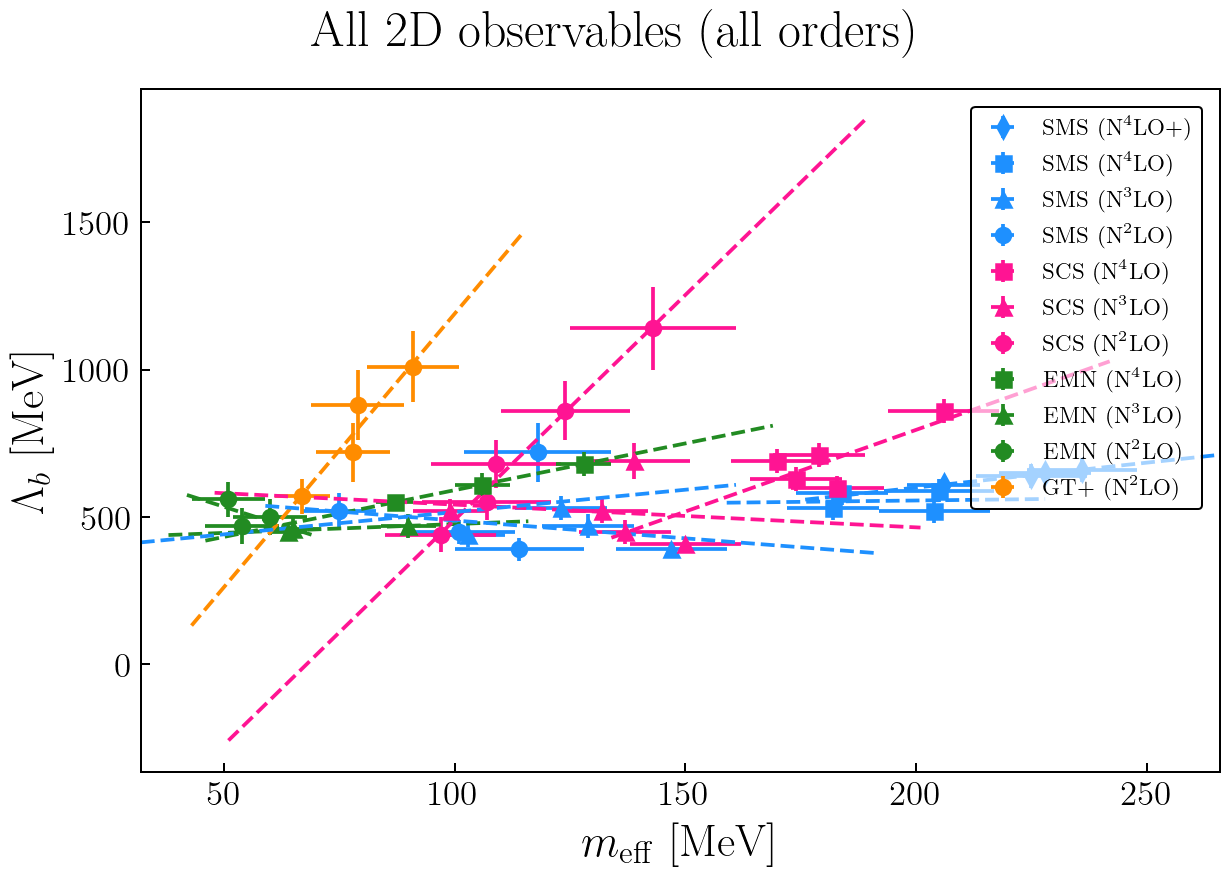

In [10]:
fig_fit_all2dobs_allo, ax_fit_all2dobs_allo = plt.subplots(figsize=(7,5))

for index, row in lambda_meff_df[lambda_meff_df["Observable(s)"] == "ALL2DOBS"].iterrows():
    # scatter-plots the means and 95% (2 sigma) confidence intervals for the scale values
    ax_fit_all2dobs_allo.errorbar(row["meff_mean"], row["Lambdab_mean"], 
                    xerr = 2 * row["meff_stddev"], yerr = 2 * row["Lambdab_stddev"],
                    color = potential_color_dict[row["Potential"]], 
                    label = r'' + row["Potential"] + ' (' + order_name_order_label_dict[row["Max. order"]] + ')', 
                    fmt = order_marker_dict[row["Max. order"]])

# selects only the 2D observables' data
pot_order_combo = lambda_meff_df[lambda_meff_df["Observable(s)"] == "ALL2DOBS"].groupby(['Potential', 'Max. order'])

for (pot, order), row in pot_order_combo:
    # fits the points to a line
    popt, pcov = scipy.optimize.curve_fit(Lambdab_meff_linear, 
                        row["meff_mean"], row["Lambdab_mean"])
    # plots the line of best fit
    ax_fit_all2dobs_allo.plot(
        np.linspace(2 * np.min(row["meff_mean"]) - np.max(row["meff_mean"]), 
                    2 * np.max(row["meff_mean"]) - np.min(row["meff_mean"]), 
                    100), 
                Lambdab_meff_linear(
                    np.linspace(2 * np.min(row["meff_mean"]) - np.max(row["meff_mean"]), 
                                2 * np.max(row["meff_mean"]) - np.min(row["meff_mean"]), 
                                100), 
                    popt[0], popt[1]), 
                color = potential_color_dict[pot], 
               linestyle = "--", 
               )
    # prints the best fit values
    print(pot + " (" + order + f"): Lambda_b = ({popt[0]:.1f} +/- {np.sqrt(pcov[0, 0]):.1f}) " + \
         f"m_eff + ({popt[1]:3.0f} +/- {np.sqrt(pcov[1, 1]):3.0f}) MeV")

fig_fit_all2dobs_allo.suptitle("All 2D observables (all orders)", fontsize = 20)
ax_fit_all2dobs_allo.set_xlabel("$m_{\mathrm{eff}}$ [MeV]", fontsize = 18)
ax_fit_all2dobs_allo.set_ylabel(r"$\Lambda_{b}$ [MeV]", fontsize = 18)
ax_fit_all2dobs_allo.legend(
            fontsize = 10,
          loc='center left',
          bbox_to_anchor=(1, 0.5),
          handletextpad=0.02,
          borderpad=0.2)

legend_without_duplicate_labels(ax_fit_all2dobs_allo)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig_fit_all2dobs_allo.tight_layout()
plt.show()
fig_fit_all2dobs_allo.savefig('figures2/' + 'Lambdab_vs_meff_all2dobs_allo' + \
                            '_' + stationarity_str)

#### Plots of $\Lambda_{b}$ vs. $m_{\rm eff}$ (as generated from total cross section ($\sigma_{\mathrm{tot}}$, or "SGT") data) at all orders for all potentials, with lines of best fit

In [11]:
# fig_fit_sgt_allo, ax_fit_sgt_allo = plt.subplots(figsize=(7,5))

# # for index, row in lambda_meff_df.iterrows():
# #     # scatter-plots the means and 95% (2 sigma) confidence intervals for the N4LO+ Q posterior pdfs
# #     ax_fit_all2dobs_allo.errorbar(row["meff_mean"], row["Lambdab_mean"], 
# #                     xerr = 2 * row["meff_stddev"], yerr = 2 * row["Lambdab_stddev"],
# #                     color = potential_color_dict[row["Potential"]], 
# #                     label = r'' + row["Potential"] + ' (' + order_name_order_label_dict[row["Max. order"]] + ')', 
# #                     fmt = order_marker_dict[row["Max. order"]])
    
# for index, row in lambda_meff_df[lambda_meff_df["Observable(s)"] == "ALL2DOBS"].iterrows():
#     # scatter-plots the means and 95% (2 sigma) confidence intervals for the N4LO+ Q posterior pdfs
#     ax_fit_all2dobs_allo.errorbar(row["meff_mean"], row["Lambdab_mean"], 
#                     xerr = 2 * row["meff_stddev"], yerr = 2 * row["Lambdab_stddev"],
#                     color = potential_color_dict[row["Potential"]], 
#                     label = r'' + row["Potential"] + ' (' + order_name_order_label_dict[row["Max. order"]] + ')', 
#                     fmt = order_marker_dict[row["Max. order"]])

# pot_order_combo = lambda_meff_df[lambda_meff_df["Observable(s)"] == "ALL2DOBS"].groupby(['Potential', 'Max. order'])

# for (pot, order), row in pot_order_combo:
# #     print(pot)
# #     print(order)
# #     print(row)
#     # fits the points to a line
#     popt, pcov = scipy.optimize.curve_fit(Lambdab_meff_linear, 
#                         row["meff_mean"], row["Lambdab_mean"])
#     # plots the line of best fit
#     ax_fit_all2dobs_allo.plot(
#         np.linspace(2 * np.min(row["meff_mean"]) - np.max(row["meff_mean"]), 
#                     2 * np.max(row["meff_mean"]) - np.min(row["meff_mean"]), 
#                     100), 
#                 Lambdab_meff_linear(
#                     np.linspace(2 * np.min(row["meff_mean"]) - np.max(row["meff_mean"]), 
#                                 2 * np.max(row["meff_mean"]) - np.min(row["meff_mean"]), 
#                                 100), 
#                     popt[0], popt[1]), 
#                 color = potential_color_dict[pot], 
#                linestyle = "--", 
# #                label = rf"${popt[0]:.1f} m_{{\mathrm{{eff}}}} + {popt[1]:3.0f}\,\mathrm{{MeV}}$"
#                )
#     # prints the best fit values
#     print(pot + " (" + order + f"): Lambda_b = ({popt[0]:.1f} +/- {np.sqrt(pcov[0, 0]):.1f}) " + \
#          f"m_eff + ({popt[1]:3.0f} +/- {np.sqrt(pcov[1, 1]):3.0f}) MeV")

# fig_fit_all2dobs_allo.suptitle("All 2D observables (all orders)", fontsize = 20)
# ax_fit_all2dobs_allo.set_xlabel("$m_{\mathrm{eff}}$ [MeV]", fontsize = 18)
# ax_fit_all2dobs_allo.set_ylabel(r"$\Lambda_{b}$ [MeV]", fontsize = 18)
# # ax_fit.legend(fontsize = 10, 
# #               loc = 'upper right', 
# #               ncols = 2)
# ax_fit_all2dobs_allo.legend(
#             fontsize = 10,
#           loc='center left',
#           bbox_to_anchor=(1, 0.5),
#           handletextpad=0.02,
#           borderpad=0.2)

# legend_without_duplicate_labels(ax_fit_all2dobs_allo)

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# fig_fit_all2dobs_allo.tight_layout()
# plt.show()
# fig_fit_all2dobs_allo.savefig('figures2/' + 'Lambdab_vs_meff_sgt_allo')

#### Plots of $\Lambda_{b}$ vs. $m_{\rm eff}$ (as generated by combining all two-dimensional observables) at highest order for all potentials

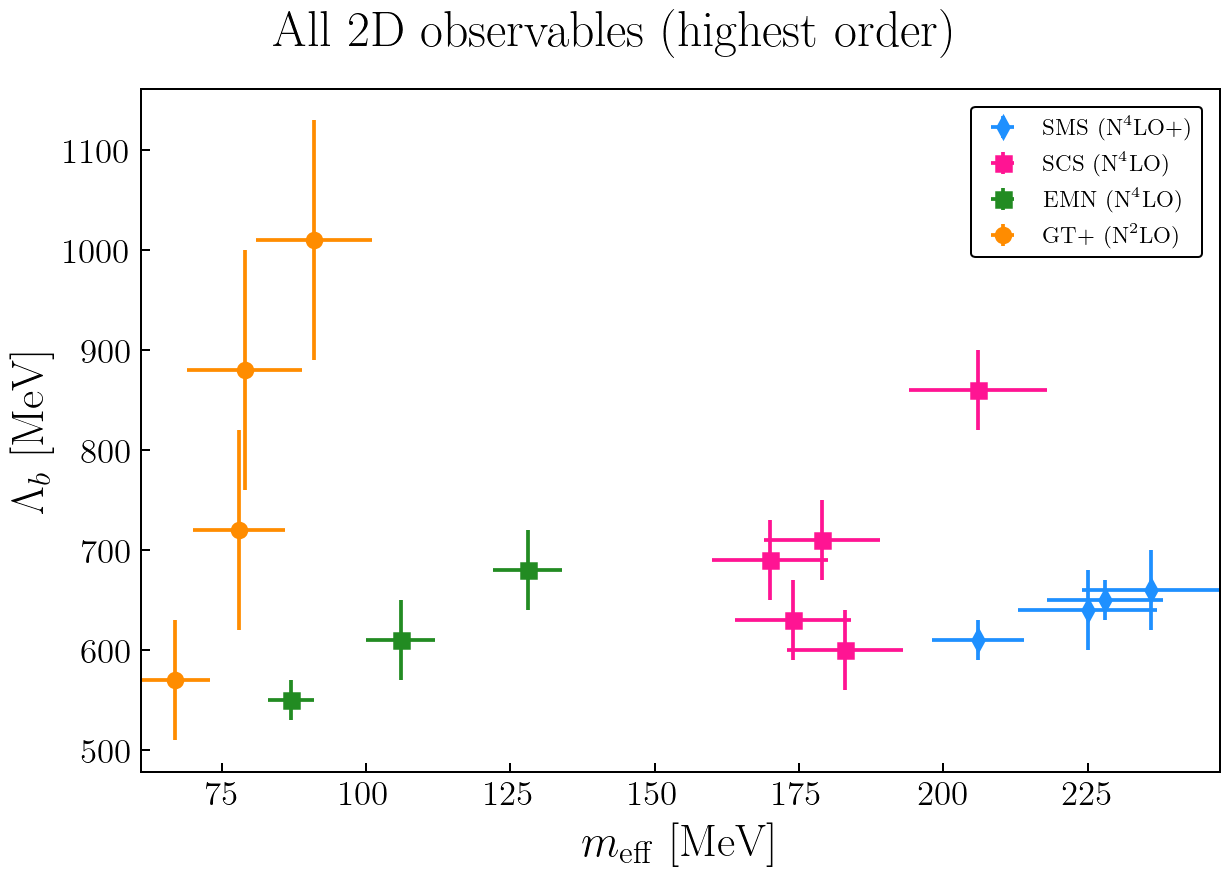

In [12]:
fig_fit_all2dobs_ho, ax_fit_all2dobs_ho = plt.subplots(figsize=(7,5))

# groups information by potential, cutoff, and observable
pot_cutoff_combo = lambda_meff_df[lambda_meff_df["Observable(s)"] == "ALL2DOBS"].groupby(['Potential', 'Cutoff']).head(1)
for index, row in pot_cutoff_combo.iterrows():
    # scatter-plots the means and 95% (2 sigma) confidence intervals for the scale values
    ax_fit_all2dobs_ho.errorbar(row["meff_mean"], row["Lambdab_mean"], 
                    xerr = 2 * row["meff_stddev"], yerr = 2 * row["Lambdab_stddev"],
                    color = potential_color_dict[row["Potential"]], 
                    label = r'' + row["Potential"] + ' (' + order_name_order_label_dict[row["Max. order"]] + ')', 
                    fmt = order_marker_dict[row["Max. order"]])

fig_fit_all2dobs_ho.suptitle("All 2D observables (highest order)", fontsize = 20)
ax_fit_all2dobs_ho.set_xlabel("$m_{\mathrm{eff}}$ [MeV]", fontsize = 18)
ax_fit_all2dobs_ho.set_ylabel(r"$\Lambda_{b}$ [MeV]", fontsize = 18)
ax_fit_all2dobs_ho.legend(
            fontsize = 10,
          loc='center left',
          bbox_to_anchor=(1, 0.5),
          handletextpad=0.02,
          borderpad=0.2)

legend_without_duplicate_labels(ax_fit_all2dobs_ho)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig_fit_all2dobs_ho.tight_layout()
plt.show()
fig_fit_all2dobs_ho.savefig('figures2/' + 'Lambdab_vs_meff_all2dobs_ho' + \
                            '_' + stationarity_str)

#### Plots of $\Lambda_{b}$ vs. $m_{\rm eff}$ (as generated from total cross section ($\sigma_{\mathrm{tot}}$, or "SGT") data) at highest order for all potentials

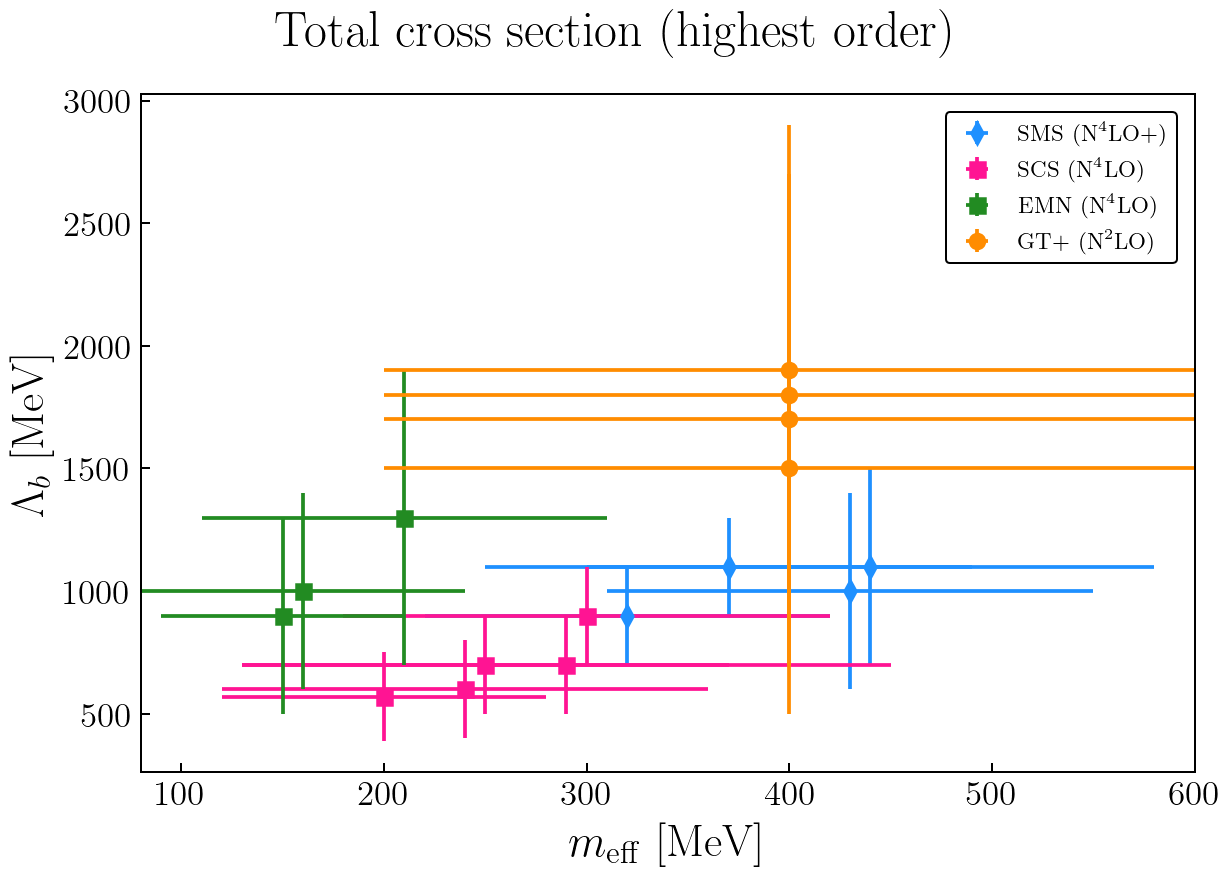

In [13]:
fig_fit_sgt_ho, ax_fit_sgt_ho = plt.subplots(figsize=(7,5))

# groups the data by potential, cutoff, and observable
pot_cutoff_combo = lambda_meff_df[lambda_meff_df["Observable(s)"] == "SGT"].groupby(['Potential', 'Cutoff']).head(1)
for index, row in pot_cutoff_combo.iterrows():
    # scatter-plots the means and 95% (2 sigma) confidence intervals for the scale values
    ax_fit_sgt_ho.errorbar(row["meff_mean"], row["Lambdab_mean"], 
                    xerr = 2 * row["meff_stddev"], yerr = 2 * row["Lambdab_stddev"],
                    color = potential_color_dict[row["Potential"]], 
                    label = r'' + row["Potential"] + ' (' + order_name_order_label_dict[row["Max. order"]] + ')', 
                    fmt = order_marker_dict[row["Max. order"]])

fig_fit_sgt_ho.suptitle("Total cross section (highest order)", fontsize = 20)
ax_fit_sgt_ho.set_xlabel("$m_{\mathrm{eff}}$ [MeV]", fontsize = 18)
ax_fit_sgt_ho.set_ylabel(r"$\Lambda_{b}$ [MeV]", fontsize = 18)
ax_fit_sgt_ho.legend(
            fontsize = 10,
          loc='center left',
          bbox_to_anchor=(1, 0.5),
          handletextpad=0.02,
          borderpad=0.2)

legend_without_duplicate_labels(ax_fit_sgt_ho)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig_fit_sgt_ho.tight_layout()
plt.show()
fig_fit_sgt_ho.savefig('figures2/' + 'Lambdab_vs_meff_sgt_ho')

# Plots of length scale and variance by order for different potentials

#### Sets meshes and extracts coefficients from the data for a particular observable and potential

In [13]:
# sets the potential of interest
ScaleScheme = GT1p2fm

In [14]:
# choose energy and angle meshes and training points
t_lab = ScaleScheme.get_data("t_lab")

t_lab_slice_pts = np.array([1, 5, 12, 21, 33, 48, 65, 85, 
                            108, 133, 161, 192, 225, 261, 300, 341])
t_lab_input = E_to_p(E_lab = t_lab, interaction = "np")
# X_train_tlab = E_to_p(E_lab = np.array([5, 21, 48, 85, 133, 192, 261]), 
#                      interaction = "np")[:, None]
# X_train_tlab = E_to_p(E_lab = np.array([1, 12, 33, 65, 108, 161, 225, 300]), 
#                      interaction = "np")[:, None]
X_train_tlab = E_to_p(E_lab = t_lab_slice_pts, 
                     interaction = "np")[:, None]
# t_lab_label = "Relative momentum (MeV)"
t_lab_label = r'$p_{\mathrm{rel}}$'
t_lab_name = "prel"
# t_lab_input = t_lab
# X_train_tlab = np.array([5, 21, 48, 85, 133, 192, 261])[:, None]
# t_lab_label = "Lab energy (MeV)"

X_tlab = t_lab_input[:, None]
# t_lab_subset = t_lab_input[0::10]
t_lab_subset = X_train_tlab[:, 0]

degrees = ScaleScheme.get_data("degrees")

degrees_slice_pts = np.array([41, 60, 76, 90, 104, 120, 139])
# degrees_input = degrees
# X_train_deg = np.array([1, 30, 60, 90, 120, 150, 179])[:, None]
# degrees_label = "Scattering angle (degrees)"
degrees_input = -np.cos(np.radians(degrees))
# X_train_deg = -np.cos(np.radians(np.array([1, 30, 60, 90, 120, 150, 179])))[:, None]
X_train_deg = -np.cos(np.radians(degrees_slice_pts))[:, None]
# degrees_label = "Negative cosine"
degrees_label = r'$-\cos(\theta)$'
degrees_name = "cos"

X_deg = degrees_input[:, None]
# degrees_subset = degrees_input[0::10]
degrees_subset = X_train_deg[:, 0]

# sets the observable of interest
obs_data_name = "DSG"

# extracts data
if obs_data_name == "AY":
    obs_data = ScaleScheme.get_data("PB")
else:
    obs_data = ScaleScheme.get_data(obs_data_name)

# sets the markdown math-mode label for the observable
obs_data_label_name_dict = {"DSG" : r"$d\sigma / d\Omega$", 
                           "D" : r"$D$", 
                           "AXX" : r"$A_{xx}$", 
                           "AYY" : r"$A_{yy}$", 
                           "A" : r"$A$", 
                           "AY" : r"$A_{y}$", }
obs_data_label = obs_data_label_name_dict[obs_data_name]

# sets values of the breakdown and soft scales
Lambda_b_coeffs = 1010
mpi_eff_coeffs = 24

# sets reference scale
if obs_data_name == "DSG":
    yref = obs_data[-1, :, :]
else:
    yref = np.ones(np.shape(obs_data)[1:])

# calculates ratio
p_type = "pprel"
p_grid = p_approx(p_name = p_type, 
                 prel = E_to_p(E_lab = t_lab, interaction = "np"), 
                 degrees = degrees).T
Q_type = "sum"
ratio = Q_approx(p = p_grid, 
                 Q_parametrization = Q_type, 
                 Lambda_b = Lambda_b_coeffs, 
                 m_pi = mpi_eff_coeffs,
                 single_expansion=False)

# extracts coefficients
coeffs_flattened = gm.coefficients(
            np.reshape(obs_data, (np.shape(obs_data)[0], np.shape(obs_data)[1] * np.shape(obs_data)[2])).T, 
            ratio=np.reshape(ratio, np.shape(ratio)[0] * np.shape(ratio)[1]),
            ref=np.reshape(yref, np.shape(yref)[0] * np.shape(yref)[1]), 
            orders=ScaleScheme.orders_full)
coeffs_surfaces = np.reshape(coeffs_flattened.T, np.shape(obs_data))

#### Plots of total cross section for given $\Lambda_{b}$ and $m_{\text{eff}}$

In [15]:
# colors_array = ['orange', 'green', 'blue', 'red', 'purple']

# fig_sgt, ax_sgt = plt.subplots()

# SGT_data = ScaleScheme.get_data("SGT")

# p_grid_sgt = p_approx(p_name = "pprel", 
#                  prel = E_to_p(E_lab = t_lab, interaction = "np"), 
#                  degrees = [0]).T
# ratio_sgt = Q_approx(p = p_grid_sgt, 
#                  Q_parametrization = 'sum', 
# #                  Lambda_b = 725, 
# #                  m_pi = 345,
#                  Lambda_b = 695, 
#                  m_pi = 250,
#                  single_expansion=False)

# yref_sgt = SGT_data[-1, :]

# SGT_coeffs = gm.coefficients(
#             SGT_data.T, 
#             ratio=np.reshape(ratio_sgt, np.shape(ratio_sgt)[0] * np.shape(ratio_sgt)[1]),
#             ref=np.reshape(yref_sgt, np.shape(yref_sgt)[0]), 
#             orders=ScaleScheme.orders_full)
# SGT_coeffs = SGT_coeffs.T

# # set a limit on x
# # print([t > 138 for t in t_lab_input])
# t_lab_input_limit = t_lab_input[t_lab_input > 0]

# for i, curve in enumerate(SGT_coeffs[1:, :]):
#     ax_sgt.plot(t_lab_input_limit, curve[np.isin(t_lab_input, t_lab_input_limit)], 
#                 color = colors_array[i], linewidth = 2)

### Plots ratios of variances for each 2D observable

[]

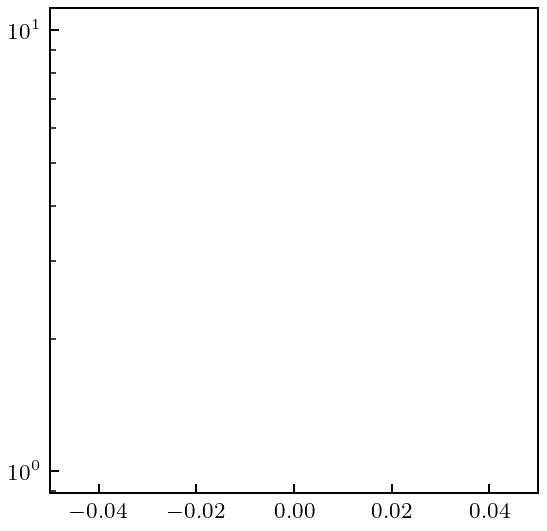

In [16]:
# create figure with n_orders subplots
fig_tlab_var_all_ratio, axs_tlab_var_all_ratio = plt.subplots(1, 1, 
                                                              figsize=(3.5,3.5))
axs_tlab_var_all_ratio.semilogy()

In [17]:
# this section uses all the same input spaces and training points as the rest of the notebook
Lambda_b_vars = Lambda_b_coeffs
mpi_eff_vars = Lambda_b_coeffs

# calculates ratio
p_type_vars = p_type
p_grid_vars = p_approx(p_name = p_type_vars, 
                 prel = E_to_p(E_lab = t_lab, interaction = "np"), 
                 degrees = degrees).T
Q_type_vars = Q_type
ratio_vars = Q_approx(p = p_grid_vars, 
                 Q_parametrization = Q_type_vars, 
                 Lambda_b = Lambda_b_vars, 
                 m_pi = mpi_eff_vars,
                 single_expansion=False)

In [18]:
axs_tlab_var_all_array = np.array([])

# names and labels observbales
obs_data_name_list = ["DSG", "D", "AXX", "AYY", "A", "PB"]
obs_data_label_list = [r"$\frac{d \sigma}{d \Omega}$", 
                       r"$D$", r"$A_{xx}$", r"$A_{yy}$", r"$A$", r"$A_{y}$"]

for idx, obs_data_name_vars in enumerate(obs_data_name_list):
    # extracts data
    obs_data_vars = ScaleScheme.get_data(obs_data_name_vars)
    
    # sets reference scale
    if obs_data_name_vars == "DSG":
        yref_vars = obs_data_vars[-1, :, :]
    else:
        yref_vars = np.ones(np.shape(obs_data_vars)[1:])

    # extracts coefficients
    coeffs_flattened_vars = gm.coefficients(
                np.reshape(obs_data_vars, (np.shape(obs_data_vars)[0], np.shape(obs_data_vars)[1] * np.shape(obs_data_vars)[2])).T, 
                ratio=np.reshape(ratio_vars, np.shape(ratio_vars)[0] * np.shape(ratio_vars)[1]),
                ref=np.reshape(yref_vars, np.shape(yref_vars)[0] * np.shape(yref_vars)[1]), 
                orders=ScaleScheme.orders_full)
    coeffs_surfaces_vars = np.reshape(coeffs_flattened_vars.T, np.shape(obs_data_vars))

    # fits a GP to the coefficients
    for t in t_lab_subset:
        gp = gm.ConjugateGaussianProcess(
            RBF(length_scale=0.25 * (np.max(degrees_input) - np.min(degrees_input)),
                          length_scale_bounds=(0.05 * (np.max(degrees_input) - np.min(degrees_input)), 
                                               2 * (np.max(degrees_input) - np.min(degrees_input)))
                   ) + WhiteKernel(1e-5, noise_level_bounds='fixed'), 
            center=0, 
            disp=0, 
            df=1,
            scale=1, 
            n_restarts_optimizer=100, 
            random_state=None,
            sd=None)

        gp.fit(X_train_deg, 
               np.reshape(coeffs_surfaces_vars[:, np.isin(t_lab_input, t), :].T, 
                          (len(degrees), 
                           np.shape(coeffs_surfaces_vars)[0]))[np.isin(degrees_input, X_train_deg), :])
        pred, std = gp.predict(X_deg, return_std=True)
        # extracts a value of the variance and adds it to an array
        underlying_std = gp.cov_factor_
        axs_tlab_var_all_array = np.append(axs_tlab_var_all_array, underlying_std)
        
axs_tlab_var_all_array = np.reshape(axs_tlab_var_all_array, 
                                    (len(obs_data_name_list), len(t_lab_subset)))

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:664: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optima = np.array(optima)
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2.39983347e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 35, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.18882812e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 39, 'nit': 4, 'warnflag

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-4.08372907e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 37, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.41456512e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 40, 'nit': 7, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2.42217175e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 41, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b te

In [19]:
# for each observable, plots the ratio of the largest variance extracted to the smallest, 
# with options for excluding data from the sample
axs_tlab_var_all_ratio.scatter(list(range(len(obs_data_name_list))), 
    [np.max(axs_tlab_var_all_array[l, :]) / np.min(axs_tlab_var_all_array[l, :]) for l in range(len(axs_tlab_var_all_array))], 
    marker = 'o', 
    edgecolors = 'green',
    label = r'$Q_{\mathrm{sum}}(p_{\mathrm{rel}} \geq 25\,\mathrm{MeV}, m_{\pi}^{\star}, \Lambda_{b}^{\star})$',
#     edgecolors = 'green', 
#     label = r'2D ALLOBS, all $p_{\mathrm{rel}} > 25\,\mathrm{MeV}$',
    linewidths = 2,
    s = 90, 
    facecolors = 'none')
axs_tlab_var_all_ratio.scatter(list(range(len(obs_data_name_list))), 
    [np.max(axs_tlab_var_all_array[l, 4:]) / np.min(axs_tlab_var_all_array[l, 4:]) for l in range(len(axs_tlab_var_all_array))], 
    marker = 's', 
#     c = 'red', 
#     label = r'OPAAT, $p_{\mathrm{rel}} > 125\,\mathrm{MeV}$', 
    c = 'green', 
    label = r'$Q_{\mathrm{sum}}(p_{\mathrm{rel}} \geq 125\,\mathrm{MeV}, m_{\pi}^{\prime}, \Lambda_{b}^{\prime})$',
    s = 90)
axs_tlab_var_all_ratio.legend(loc = 'upper right', 
                              fontsize = 10,
                              handletextpad=0.02,
                              borderpad=0.2)

axs_tlab_var_all_ratio.set_xticklabels([""] + obs_data_label_list + [""], fontsize = 10)
axs_tlab_var_all_ratio.tick_params(axis = 'y', labelsize = 10)
axs_tlab_var_all_ratio.set_xlim(-1, len(obs_data_name_list))
axs_tlab_var_all_ratio.set_ylim(0.9, 160)

# saves figures
fig_tlab_var_all_ratio.savefig('figures2/' + 'var_ratios' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string)

C:\Users\pjmil\AppData\Local\Temp\ipykernel_17812\2519844871.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs_tlab_var_all_ratio.set_xticklabels([""] + obs_data_label_list + [""], fontsize = 10)


## Plots of scattering-angle length scale and variance by order

In [20]:
# choose colormap and fix to different energies
cmap_tlab = mpl.cm.viridis
norm_tlab = mpl.colors.Normalize(vmin=np.min(t_lab_input), vmax=np.max(t_lab_input))

C:\Users\pjmil\AppData\Local\Temp\ipykernel_17812\1508353876.py:55: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  (axs_tlab_ls.flat)[o].scatter(t,
C:\Users\pjmil\AppData\Local\Temp\ipykernel_17812\1508353876.py:61: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  (axs_tlab_var.flat)[o].scatter(t,
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated

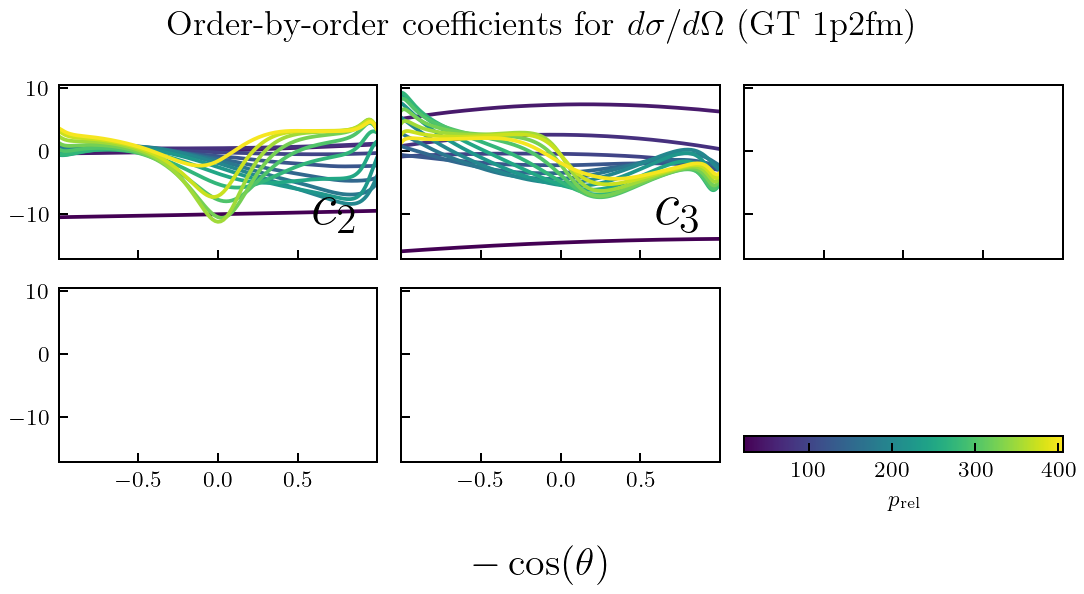

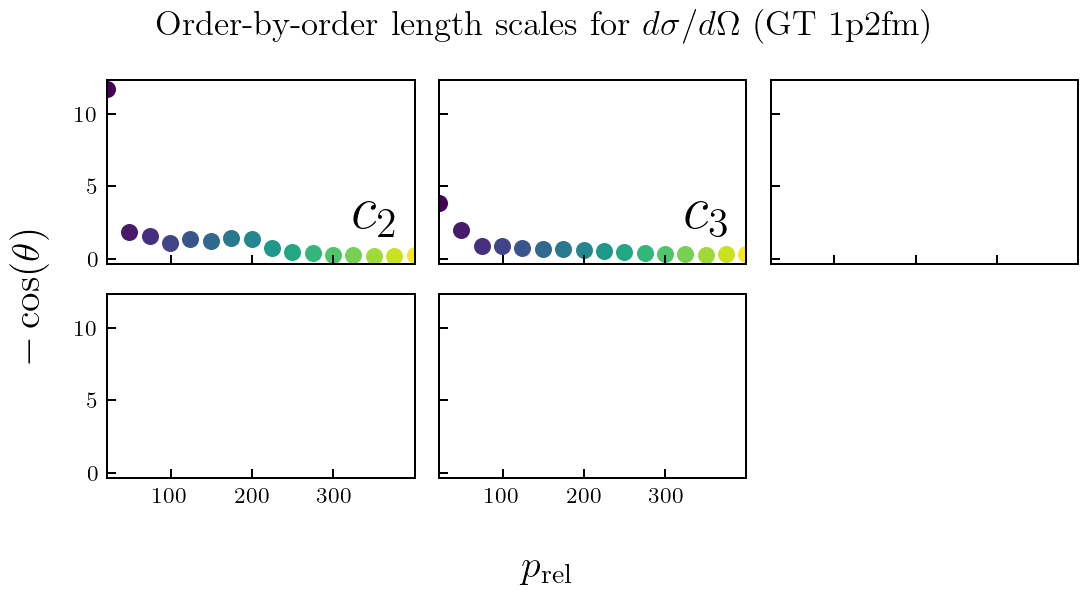

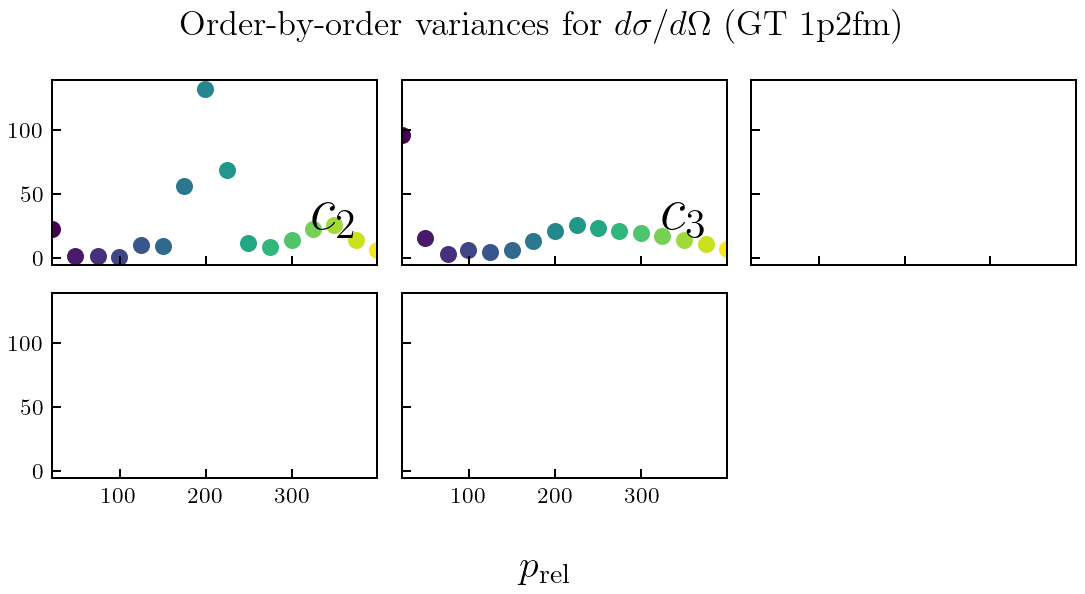

In [21]:
# create figure with n_orders subplots
fig_tlab_coeffs, axs_tlab_coeffs = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(6.2, 3.3))
fig_tlab_coeffs.supxlabel(degrees_label, size = 16)
fig_tlab_coeffs.suptitle('Order-by-order coefficients for ' + obs_data_label + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 14)

# create figure with n_orders subplots
fig_tlab_ls, axs_tlab_ls = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(6.2, 3.3))
fig_tlab_ls.supxlabel(t_lab_label, size = 16)
fig_tlab_ls.supylabel(degrees_label, size = 16)
fig_tlab_ls.suptitle('Order-by-order length scales for ' + obs_data_label + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 14)

# create figure with n_orders subplots
fig_tlab_var, axs_tlab_var = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(6.2, 3.3))
fig_tlab_var.supxlabel(t_lab_label, size = 16)
fig_tlab_var.suptitle('Order-by-order variances for ' + obs_data_label + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 14)

# plot at each energy in mesh
for o in range(np.shape(coeffs_surfaces)[0] - 1):
    (axs_tlab_coeffs.flat)[o].text(0.8, 0.2, 
                       rf'$c_{{{ScaleScheme.orders_full[o + 1]}}}$', 
                       transform=(axs_tlab_coeffs.flat)[o].transAxes, 
                       size = 24)
    (axs_tlab_ls.flat)[o].text(0.8, 0.2, 
                       rf'$c_{{{ScaleScheme.orders_full[o + 1]}}}$', 
                       transform=(axs_tlab_ls.flat)[o].transAxes, 
                       size = 24)
    (axs_tlab_var.flat)[o].text(0.8, 0.2, 
                       rf'$c_{{{ScaleScheme.orders_full[o + 1]}}}$', 
                       transform=(axs_tlab_var.flat)[o].transAxes, 
                       size = 24)
        
    for t in t_lab_subset:
        (axs_tlab_coeffs.flat)[o].plot(degrees_input, 
                    coeffs_surfaces[o + 1, np.isin(t_lab_input, t), :].T, 
                    c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))
        
        gp = gm.ConjugateGaussianProcess(
            RBF(length_scale=0.25 * (np.max(degrees_input) - np.min(degrees_input)),
                      length_scale_bounds=(0.05 * (np.max(degrees_input) - np.min(degrees_input)), 
                                           10 * (np.max(degrees_input) - np.min(degrees_input)))
               ) + WhiteKernel(1e-5, noise_level_bounds='fixed'),
            center=0, 
            disp=0, 
            df=1,
            scale=1, 
            n_restarts_optimizer=100, 
            random_state=None,
            sd=None)
        
        # fits the GP
        gp.fit(X_train_deg, 
               (coeffs_surfaces[o + 1, np.isin(t_lab_input, t), :].T)[np.isin(degrees_input, X_train_deg)])
        ls_fit = np.exp(gp.kernel_.theta)
        (axs_tlab_ls.flat)[o].scatter(t, 
                    ls_fit, 
                    c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))
        
        # extracts the variance
        pred, std = gp.predict(X_deg, return_std=True)
        underlying_std = gp.cov_factor_
        (axs_tlab_var.flat)[o].scatter(t, 
                    underlying_std, 
                    c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t))

# eliminates any extraneous Axes objects
fig_tlab_coeffs.delaxes(axs_tlab_coeffs[-1, -1])        
fig_tlab_coeffs.colorbar(mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab), 
            ax = axs_tlab_coeffs[-1, -1],
             orientation='horizontal', label=t_lab_label)

fig_tlab_ls.delaxes(axs_tlab_ls[-1, -1])
fig_tlab_var.delaxes(axs_tlab_var[-1, -1])

# saves figures
fig_tlab_coeffs.tight_layout()
fig_tlab_coeffs.savefig('figures2/' + 'coeffs' + '_' + 'tlab_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)
fig_tlab_ls.tight_layout()
fig_tlab_ls.savefig('figures2/' + 'ls' + '_' + 'tlab_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)
fig_tlab_var.tight_layout()
fig_tlab_var.savefig('figures2/' + 'var' + '_' + 'tlab_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)

## Plots of scattering-angle length scale and variance over all orders

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.67951512e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 36, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.74275192e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 42, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.35784682e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 38, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b te

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.00764446e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 37, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.26180821e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 40, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.73905171e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 38, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b ter

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.33183091e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 35, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.46933778e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 37, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.45932281e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 33, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b te

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-4.10813373e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 33, 'nit': 2, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([3.56180244e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 42, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.2773613e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 37, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b ter

[[3.90678754e+01 5.21834195e+00 1.41940597e+00 2.23855687e+00
  5.24964848e+00 1.23927694e+01 3.72705597e+01 2.33880451e+01
  2.00326390e+01 1.07510782e+01 9.00656783e+00 9.80151273e+00
  1.20955586e+01 1.23815656e+01 7.56281113e+00 3.99236238e+00]
 [4.87417986e-01 7.37880415e-01 5.98765763e-01 4.72207226e-01
  8.21409810e-01 2.50345402e+00 1.03673206e+00 1.85812465e+00
  2.99871934e+00 2.80651144e+00 2.02188277e+00 2.26857517e+00
  2.77333028e+00 2.82112424e+00 2.58924397e+00 2.29199380e+00]
 [1.87084183e+01 2.38712985e+01 7.65289706e+01 5.39413159e+01
  1.60171063e+01 1.69393727e+01 4.01716179e+01 2.14342422e+00
  2.02293853e+00 1.73041479e+00 1.42024455e+00 1.41531165e+00
  1.75181861e+00 2.25365064e+00 2.43723600e+00 2.39489725e+00]
 [4.32242833e+00 7.93069343e+00 6.56495897e+00 5.60154784e+00
  3.80838348e+00 3.16749304e+00 2.71087271e+01 1.20558688e+02
  5.15080799e+00 4.75854479e+00 3.52530655e+00 2.70829292e+00
  2.31478214e+00 2.06916967e+00 2.02624067e+00 2.04265101e+00]
 [1.

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


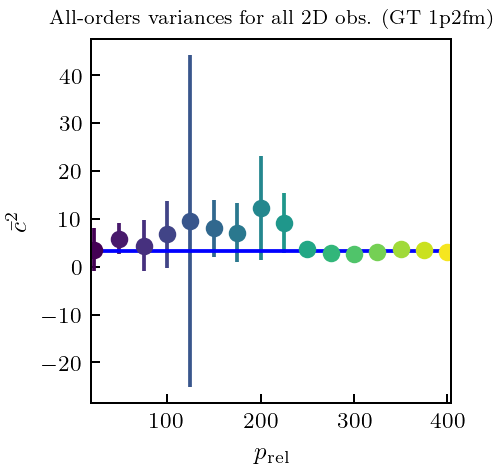

In [22]:
axs_tlab_var_all_array = np.array([])
axs_tlab_var_all_stddev_array = np.array([])

def lorentzian(x, k, delta, M):
    R = np.max(x) - np.min(x)
    return M * (1 + (k / R * (x - delta * R))**(2))**(-1)

# obs_var_name_array_name = obs_data_name
# obs_var_name_array = [obs_var_name_array_name]
# obs_var_label_array = [obs_data_label]
obs_var_name_array_name = "ALLOBS"
obs_var_name_array = ["DSG", "D", "AXX", "AYY", "A", "AY"]
obs_var_label_array = ["all 2D obs."]

# create figure with n_orders subplots
fig_tlab_var_all, axs_tlab_var_all = plt.subplots(1, 1, sharex = True, sharey=True, figsize=(2.8, 2.8))
axs_tlab_var_all.set_xlabel(t_lab_label, size = 10)
axs_tlab_var_all.set_ylabel(r"$\bar{c}^{2}$", size = 10)
axs_tlab_var_all.set_title('All-orders variances for ' + obs_var_label_array[0] + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 8)
# axs_tlab_var_all.semilogx()
# axs_tlab_var_all.semilogy()

for ovna_idx, ovna in enumerate(obs_var_name_array):
    # extracts data
    if ovna == "AY":
        ovna_data = ScaleScheme.get_data("PB")
    else:
        ovna_data = ScaleScheme.get_data(ovna)

    # sets reference scale
    if ovna == "DSG":
        ovna_yref = ovna_data[-1, :, :]
    else:
        ovna_yref = np.ones(np.shape(ovna_data)[1:])

    coeffs_flattened_ovna = gm.coefficients(
                np.reshape(ovna_data, (np.shape(ovna_data)[0], np.shape(ovna_data)[1] * np.shape(ovna_data)[2])).T, 
                ratio=np.reshape(ratio, np.shape(ratio)[0] * np.shape(ratio)[1]),
                ref=np.reshape(ovna_yref, np.shape(ovna_yref)[0] * np.shape(ovna_yref)[1]), 
                orders=ScaleScheme.orders_full)
    coeffs_surfaces_ovna = np.reshape(coeffs_flattened_ovna.T, np.shape(ovna_data))

    # plots at each energy in mesh
    for t in t_lab_subset:
        gp = gm.ConjugateGaussianProcess(
            RBF(length_scale=0.25 * (np.max(degrees_input) - np.min(degrees_input)),
                          length_scale_bounds=(0.05 * (np.max(degrees_input) - np.min(degrees_input)), 
                                               10 * (np.max(degrees_input) - np.min(degrees_input)))
                   ) + WhiteKernel(1e-5, noise_level_bounds='fixed'), 
            center=0, 
            disp=0, 
            df=1,
            scale=1, 
            n_restarts_optimizer=100, 
            random_state=None,
            sd=None)
        
        # fits the GP
        gp.fit(X_train_deg, 
               np.reshape(coeffs_surfaces_ovna[:, np.isin(t_lab_input, t), :].T, 
                          (len(degrees), 
                           np.shape(coeffs_surfaces_ovna)[0]))[np.isin(degrees_input, X_train_deg), :])
        
        # extracts the variance and assesses its error bars as scaled-inverse-chi-squared-distributed
        underlying_std = gp.cov_factor_
        stddev_underlying_std = underlying_std * np.sqrt(2 / (gp.df_ - 4))
    
        # appends variance values to an array
        axs_tlab_var_all_array = np.append(axs_tlab_var_all_array, underlying_std)
        axs_tlab_var_all_stddev_array = np.append(axs_tlab_var_all_stddev_array, stddev_underlying_std)

# reshapes arrays in preparation for plotting
axs_tlab_var_all_array = np.reshape(axs_tlab_var_all_array, 
                                    (len(obs_var_name_array), len(t_lab_subset)))
axs_tlab_var_all_stddev_array = np.reshape(axs_tlab_var_all_stddev_array, 
                                    (len(obs_var_name_array), len(t_lab_subset)))

# plots variances with error bars
for t in t_lab_subset:
    axs_tlab_var_all.errorbar(t, 
                    (np.prod(axs_tlab_var_all_array, axis = 0)**(1 / len(obs_var_name_array)))[np.isin(t_lab_subset, t)], 
                    yerr = (np.sum(axs_tlab_var_all_stddev_array, axis = 0) / len(obs_var_name_array))[np.isin(t_lab_subset, t)],
                    c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t), 
                    fmt = 'o')

# fits variances to Lorentzian
popt, pcov = curve_fit(lorentzian, t_lab_subset, 
                                    np.prod(axs_tlab_var_all_array, axis = 0)**(1 / len(obs_var_name_array)), 
                                    sigma = np.sum(axs_tlab_var_all_stddev_array, axis = 0) / len(obs_var_name_array)
                                     )
# plots the line of best fit
axs_tlab_var_all.plot(t_lab_input, 
            lorentzian(t_lab_input, *popt), 
            color = "blue", 
            )
# prints the best fit values
print("scaling = " + str(popt[0]) + " +/- " + str(np.sqrt(pcov[0, 0])))
print("fractional offset = " + str(popt[1]) + " +/- " + str(np.sqrt(pcov[1, 1])))
print("magnitude = " + str(popt[2]) + " +/- " + str(np.sqrt(pcov[2, 2])))

# sets x-axis limits
axs_tlab_var_all.set_xlim(left = np.min(t_lab_subset) - 0.01 * (np.max(t_lab_subset) - np.min(t_lab_subset)), 
                         right = np.max(t_lab_subset) + 0.01 * (np.max(t_lab_subset) - np.min(t_lab_subset)))

fig_tlab_var_all.tight_layout()
# saves figure
fig_tlab_var_all.savefig('figures2/' + 'var' + '_' + 'tlab_slices' + '_' + 'allorders' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_var_name_array_name + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)

In [24]:
# data on power-law best-fit magnitude and exponent from all 2D observables
# SMS 550 MeV
# N4LO+: magnitude = 136.31452457117496 +/- 35.44318778971489
# N4LO+: power = -1.0363265518407314 +/- 0.045699188906517016
# SMS 500 MeV
# N4LO+: magnitude = 110.38610891472231 +/- 25.6684777333181
# N4LO+: power = -0.9875970832439643 +/- 0.04053653784036533
# SMS 450 MeV
# N4LO+: magnitude = 38.19408072840246 +/- 17.659824238289897
# N4LO+: power = -0.8024283678441405 +/- 0.08028607622786836
# SMS 400 MeV
# N4LO+: magnitude = 63.79903072508313 +/- 25.699274619673744
# N4LO+: power = -0.8815931795132642 +/- 0.0705260404980459

# SCS 0.8 fm
# N4LO: magnitude = 122.07994455986669 +/- 22.55700350100443
# N4LO: power = -1.0097171264516989 +/- 0.03238951272768408
# SCS 0.9 fm
# N4LO: magnitude = 117.37031330064788 +/- 28.349683253030936
# N4LO: power = -0.9980675448601319 +/- 0.0433561331292563
# SCS 1.0 fm
# N4LO: magnitude = 72.5625319864772 +/- 23.095929926864656
# N4LO: power = -0.9019699010026988 +/- 0.05633523187690033
# SCS 1.1 fm
# N4LO: magnitude = 93.72055654413269 +/- 31.460124007080807
# N4LO: power = -0.9458189790189132 +/- 0.05800855746457256
# SCS 1.2 fm
# N4LO: magnitude = 131.8536016840254 +/- 30.3490502765213
# N4LO: power = -1.0176496056964328 +/- 0.04031905801825545

# EMN 550 MeV
# N4LO: magnitude = 24.75813341261366 +/- 14.14708979414239
# N4LO: power = -0.7040133993281966 +/- 0.10175694345244762
# EMN 500 MeV
# N4LO: magnitude = 19.8970976939396 +/- 9.758112975901614
# N4LO: power = -0.6551357914606488 +/- 0.08837973939490716
# EMN 450 MeV
# N4LO: magnitude = 22.428283429318775 +/- 7.15919926241424
# N4LO: power = -0.6567562053980777 +/- 0.056090587759907495

# GT+ 0.9 fm
# N2LO: magnitude = 68.08580544504628 +/- 28.65307613130318
# N2LO: power = -0.921116638924384 +/- 0.07875715148620108
# GT+ 1.0 fm
# N2LO: magnitude = 82.28518799192493 +/- 30.5099531215581
# N2LO: power = -0.9612841432438141 +/- 0.06823115359934773
# GT+ 1.1 fm
# N2LO: magnitude = 85.0644145272933 +/- 28.649511842932775
# N2LO: power = -0.9696125927430508 +/- 0.06205983125624193
# GT+ 1.2 fm
# N2LO: magnitude = 105.12180354039467 +/- 31.853677779886343
# N2LO: power = -1.0196564436996844 +/- 0.05558899204133019

In [25]:
# data on Lorentzian best-fit scaling and fractional offset from all 2D observables
# SMS 550 MeV
# scaling = 2.180578189879298 +/- 0.2776858311235583
# fractional offset = 0.7645130078000336 +/- 0.033328910121863
# SMS 500 MeV
# scaling = 1.7188719477574015 +/- 0.17382531092630896
# fractional offset = 0.7058988894681305 +/- 0.025911280593021942
# SMS 450 MeV
# scaling = 1.7114240008687003 +/- 0.19334460263780384
# fractional offset = 0.6441933002725452 +/- 0.027509474596582702
# SMS 400 MeV
# scaling = 2.1012008191566323 +/- 0.16444071680727737
# fractional offset = 0.617875384963154 +/- 0.017119690574439364

# SCS 0.8 fm
# scaling = 2.7310082094836936 +/- 0.26888461070562425
# fractional offset = 0.7109117440625596 +/- 0.018746800359119714
# SCS 0.9 fm
# scaling = 2.0456471816070128 +/- 0.14189796195096252
# fractional offset = 0.6986603106870393 +/- 0.015182978328935039
# SCS 1.0 fm
# scaling = 1.917235299495727 +/- 0.11527308537729314
# fractional offset = 0.6878097374589209 +/- 0.01597279371727367
# SCS 1.1 fm
# scaling = 2.0221812909445678 +/- 0.15009921263668127
# fractional offset = 0.6484363295581509 +/- 0.01800478888690344
# SCS 1.2 fm
# scaling = 2.16088536996295 +/- 0.20837506910316259
# fractional offset = 0.61114567410409 +/- 0.020753281281024445

# EMN 550 MeV
# scaling = -3.405343742669119 +/- 0.46267056106624604
# fractional offset = 0.7048958835581299 +/- 0.02733748287177218
# EMN 500 MeV
# scaling = -3.034641578872837 +/- 0.3976466604798504
# fractional offset = 0.6899524700622449 +/- 0.02434033339686811
# EMN 450 MeV
# scaling = -2.2881128336748495 +/- 0.2817921722984444
# fractional offset = 0.6109677260445364 +/- 0.023133290537437946

# GT+ 0.9 fm
# scaling = 1.5878840730236992 +/- 0.2812067540854969
# fractional offset = 0.3556758437877054 +/- 0.07079482598619423
# GT+ 1.0 fm
# scaling = 1.5907412954411626 +/- 0.2098830543834126
# fractional offset = 0.3182789212605225 +/- 0.06213722810786929
# GT+ 1.1 fm
# scaling = -1.1190360690584382 +/- 0.2254166167897737
# fractional offset = 0.18474017445107696 +/- 0.16320236123711213
# GT+ 1.2 fm
# scaling = -6.645978360681249e-07 +/- inf
# fractional offset = 0.7801262999327864 +/- inf

In [26]:
# list of potentials for consideration
ScaleSchemeQ_list = [ScaleScheme]

# sets random variables for Bayesian statistical calculations
ls_deg_vals = np.linspace(0.01 * (np.max(degrees_input) - np.min(degrees_input)), 
                          10 * (np.max(degrees_input) - np.min(degrees_input)), 
                          500, dtype=np.dtype('f4'))
# cbar_vals = np.linspace(0.01, 4, 100, dtype=np.dtype('f4'))
mesh_cart_tlabslice = gm.cartesian(np.log(ls_deg_vals))
# mesh_cart_tlabslice = gm.cartesian(np.log(cbar_vals), np.log(ls_deg_vals))

LsDegVariable = RandomVariable(var=ls_deg_vals,
                            user_val=None,
                            name='lsdeg',
                            label="\ell_{\Theta}",
                            units="",
                            ticks=[],
                            logprior=np.zeros(len(ls_deg_vals)),
                            logprior_name="noprior",
                            marg_bool=True)
# CbarVariable = RandomVariable(var=cbar_vals,
#                             user_val=1,
#                             name='cbar',
#                             label="\overline{c}^{2}",
#                             units="",
#                             ticks=[],
#                             logprior=np.zeros(len(cbar_vals)),
#                             logprior_name="noprior",
#                             marg_bool=False)
variables_array = np.array([LsDegVariable])
# variables_array = np.array([CbarVariable, LsDegVariable])

# ALLOBS for angle input spaces
# plot_obs_list = [[obs_data_name]]
# obs_name_grouped_list = [obs_data_name]
# obs_labels_grouped_list = [obs_data_label]
# mesh_cart_grouped_list = [[mesh_cart_tlabslice]]
plot_obs_list = [["DSG", "D", "AXX", "AYY", "A", "AY"]]
obs_name_grouped_list = ["ALLOBS"]
obs_labels_grouped_list = ["all 2D obs."]
mesh_cart_grouped_list = [[mesh_cart_tlabslice, mesh_cart_tlabslice, mesh_cart_tlabslice, 
                          mesh_cart_tlabslice, mesh_cart_tlabslice, mesh_cart_tlabslice, ]]

# creates a new ratio and log_likelihood function
def ratio_fn_new(X, p_grid_train, p_param, p_shape, Q_param, mpi_var, p, lambda_var, 
                 single_expansion = False):
    """
    Function for interpolating between the input space and the ratio across that input space.

    Parameters
    ----------
    X (array) : array of input-space values. These are never called but must be passed here anyway due to GSUM.
    p_grid_train : array of momenta for evaluating ratio
    p_param (str) : type of p parametrization.
        Can be "Qofprel", "Qofqcm", or "Qofpq"
    p_shape (tuple) : shape for momentum before calculating ratio.
    Q_param (str) : type of Q parametrization.
        Can be "smoothmax", "max", or "sum".
    mpi_var (float) : value of the (effective) pion mass (in MeV) for calculating the ratio.
    lambda_var (float) : value of the breakdown scale (in MeV) for calculating the ratio.
    single_expansion (bool) : if True, then mpi_var is set to 0 within Q_approx
        Default : False
    """
    return Q_approx(p = p, 
                    Q_parametrization=Q_param, Lambda_b = lambda_var, 
                    m_pi = mpi_var, single_expansion=single_expansion)

@ray.remote
def log_likelihood_new(gp_fitted,
                   mesh_points,
                   log_likelihood_fn_kwargs
                   ):
    """
    Calculates the log-likelihood for a set of inputs.

    Parameters
    ----------
    gp_fitted (TruncationGP) : fitted Gaussian process object.
    mesh_points (float array) : array of tuples of random variables at which to evaluate the log-likelihood.
        Must be in the order (lambda_var, all length scales, mpi_var).
    log_likelihood_fn_kwargs (dict) : keyword arguments for log_likelihood.
    """
    return [gp_fitted.log_marginal_likelihood([pt[n] for n in range(len(pt))],
                                              **{**log_likelihood_fn_kwargs}

                                              ) for pt in mesh_points]

# accounts for nonstationarity in the length scale
def scaling_fn(X,
               ls_array,
               ):
    X_shape = np.shape(X)
    X = np.reshape(X, (np.prod(X_shape[:-1]), ) + (X_shape[-1], ))
    ls = np.array([])
    try:
        for pt_idx, pt in enumerate(X):
            ls = np.append(ls, ls_array)
    except:
        pass

    ls = np.reshape(ls, X_shape)

    return ls

scaling_fn_kwargs={}

# accounts for nonstationarity in the variance
def cbar_fn(X,
               cbar_array = np.array([1]),
               ):
    X_shape = np.shape(X)
    X = np.reshape(X, (np.prod(X_shape[:-1]), ) + (X_shape[-1], ))
    cbar = np.array([])
    try:
        for pt_idx, pt in enumerate(X):
            cbar = np.append(cbar, cbar_array)
    except:
        pass

    cbar = np.reshape(cbar, X_shape[:-1])

    return cbar

cbar_fn_kwargs={}

2024-06-25 12:13:51,472	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 3.3027835
Observable all 2D obs., variable lsdeg: mean = 3.3596457355839897
Observable all 2D obs., variable lsdeg: std. dev. = 0.26664005581904765


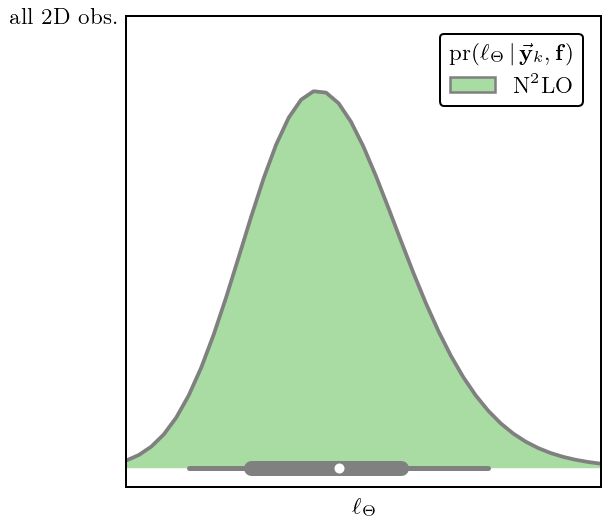

[3.30278349 3.35964574 0.26664006]


2024-06-25 12:14:02,986	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 2.5021038
Observable all 2D obs., variable lsdeg: mean = 2.4920980560456485
Observable all 2D obs., variable lsdeg: std. dev. = 0.1492110383141977


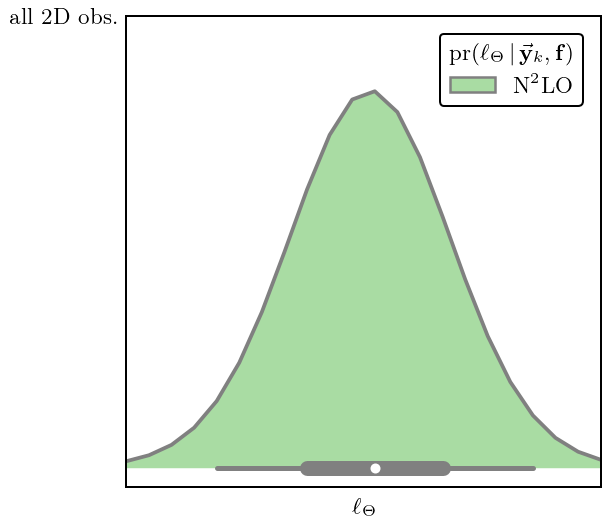

[2.50210381 2.49209806 0.14921104]


2024-06-25 12:14:14,259	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 1.3811524
Observable all 2D obs., variable lsdeg: mean = 1.40910311765331
Observable all 2D obs., variable lsdeg: std. dev. = 0.10828627388969748


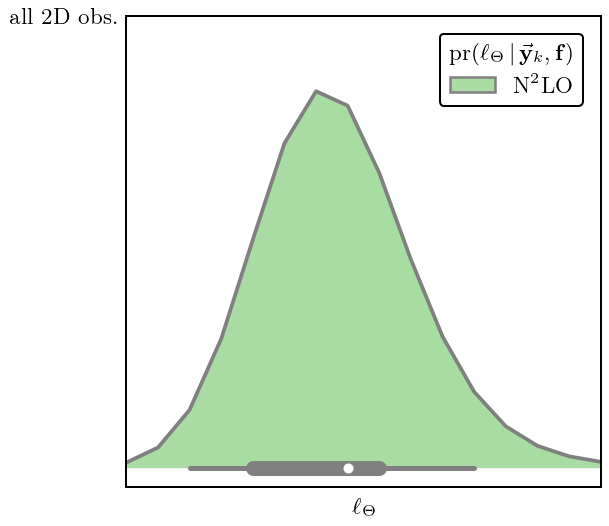

[1.38115239 1.40910312 0.10828627]


2024-06-25 12:14:26,478	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 1.3411183
Observable all 2D obs., variable lsdeg: mean = 1.3621566953942479
Observable all 2D obs., variable lsdeg: std. dev. = 0.08901949081985527


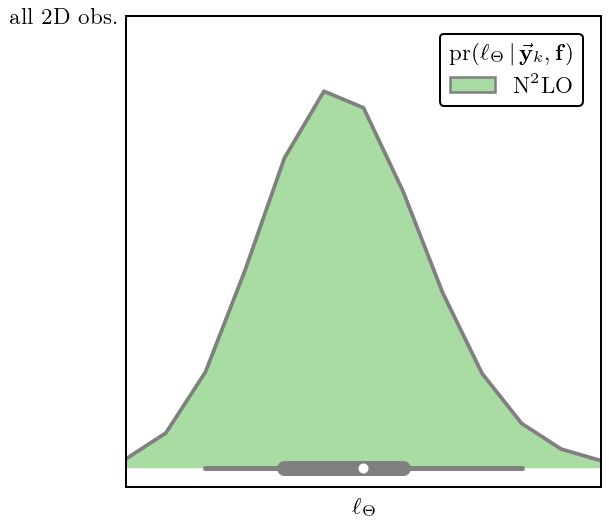

[1.34111834 1.3621567  0.08901949]


2024-06-25 12:14:37,916	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 1.3811524
Observable all 2D obs., variable lsdeg: mean = 1.3530052976585025
Observable all 2D obs., variable lsdeg: std. dev. = 0.11654023333862987


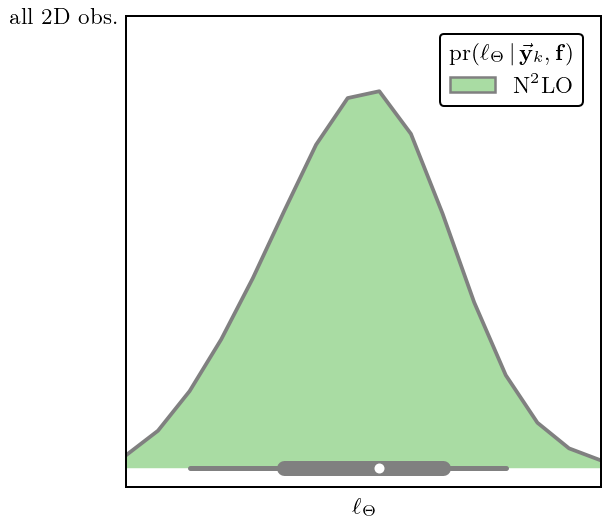

[1.38115239 1.3530053  0.11654023]


2024-06-25 12:14:49,801	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.6205067
Observable all 2D obs., variable lsdeg: mean = 0.7156654987449016
Observable all 2D obs., variable lsdeg: std. dev. = 0.18430166442259974


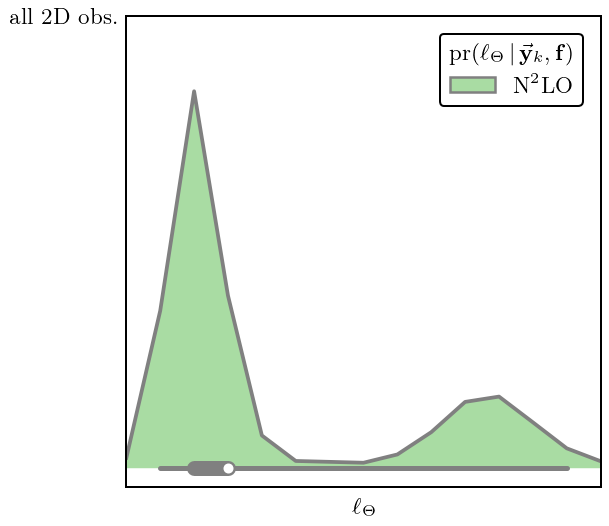

[0.6205067  0.7156655  0.18430166]


2024-06-25 12:15:01,279	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.5404387
Observable all 2D obs., variable lsdeg: mean = 0.5296239171580285
Observable all 2D obs., variable lsdeg: std. dev. = 0.026192990575755557


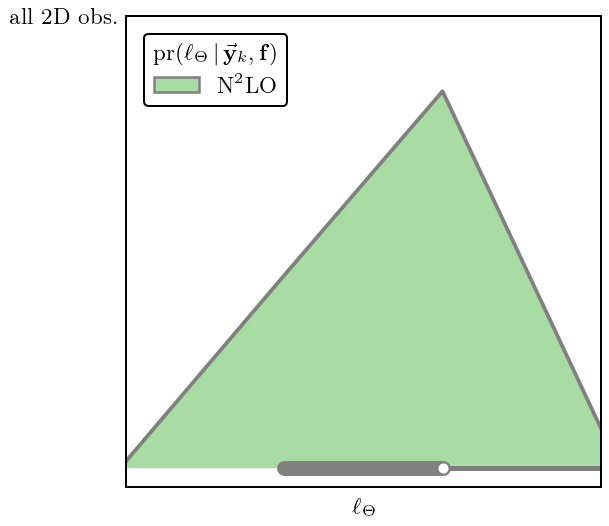

[0.54043871 0.52962392 0.02619299]


2024-06-25 12:15:13,405	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.5404387
Observable all 2D obs., variable lsdeg: mean = 0.523839706174326
Observable all 2D obs., variable lsdeg: std. dev. = 0.027626459728623688


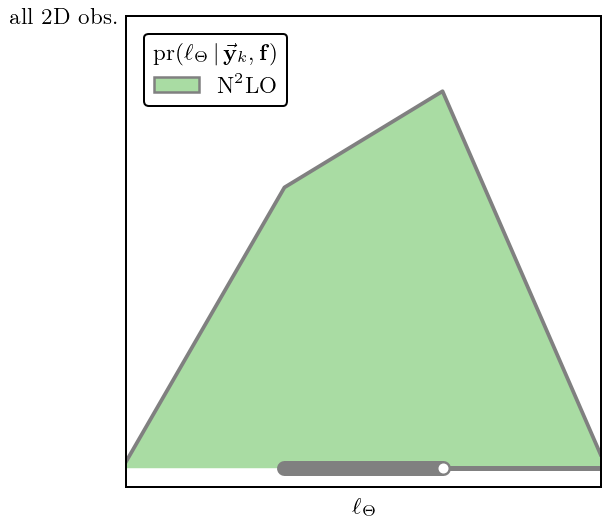

[0.54043871 0.52383971 0.02762646]


2024-06-25 12:15:25,642	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.46037075
Observable all 2D obs., variable lsdeg: mean = 0.4733310930445889
Observable all 2D obs., variable lsdeg: std. dev. = 0.025810746568943697


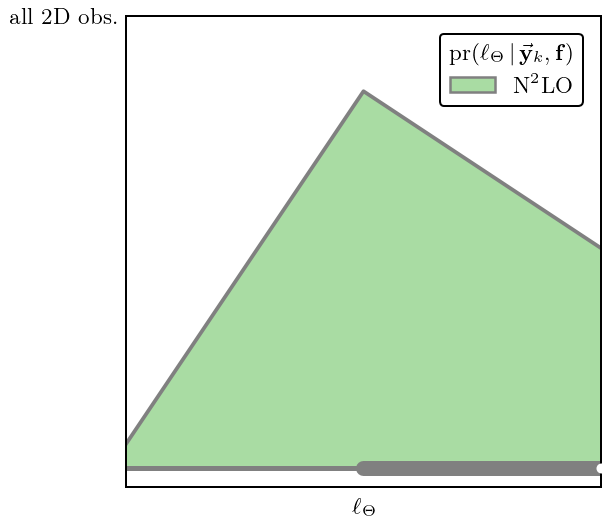

[0.46037075 0.47333109 0.02581075]


2024-06-25 12:15:37,358	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.42033678
Observable all 2D obs., variable lsdeg: mean = 0.4185106126934228
Observable all 2D obs., variable lsdeg: std. dev. = 0.01721997617039485


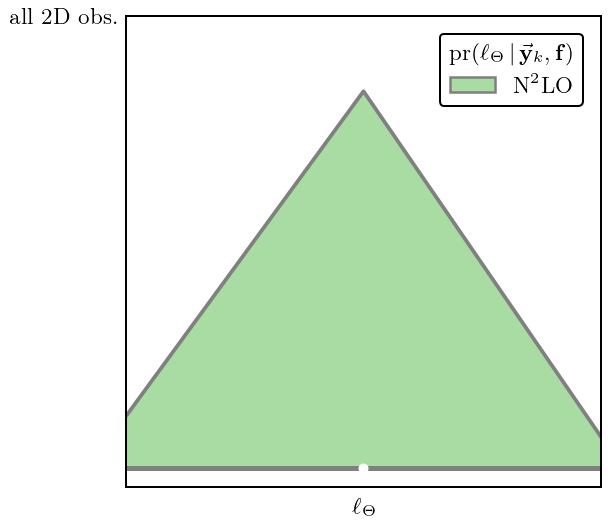

[0.42033678 0.41851061 0.01721998]


2024-06-25 12:15:48,936	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.34026882
Observable all 2D obs., variable lsdeg: mean = 0.3566985401661487
Observable all 2D obs., variable lsdeg: std. dev. = 0.025906042080898563


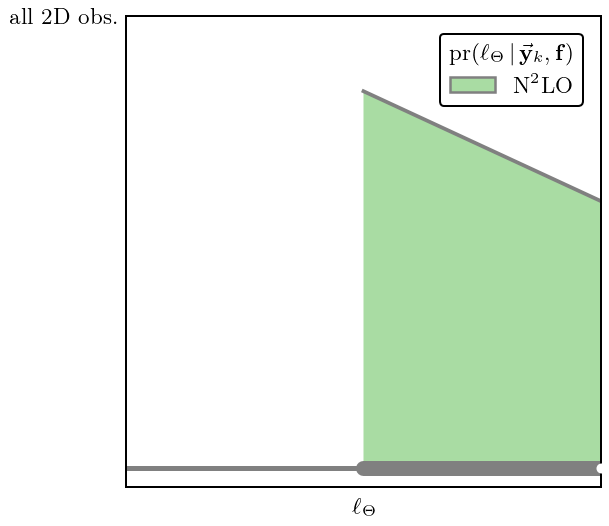

[0.34026882 0.35669854 0.02590604]


2024-06-25 12:16:00,349	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.30023482
Observable all 2D obs., variable lsdeg: mean = 0.3011663419883283
Observable all 2D obs., variable lsdeg: std. dev. = 0.009134117228515698


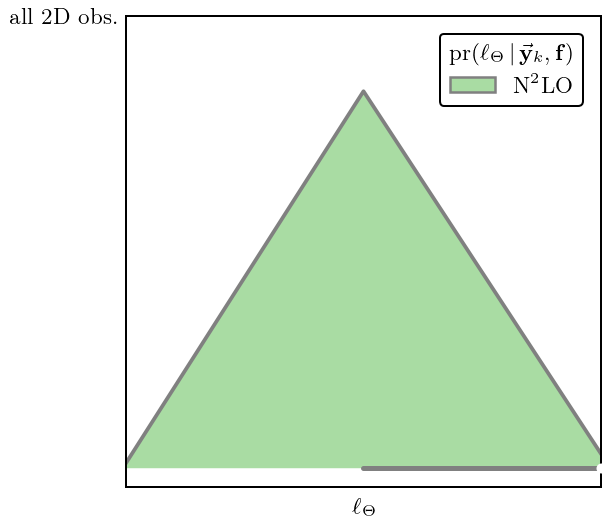

[0.30023482 0.30116634 0.00913412]


2024-06-25 12:16:11,742	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.26020086
Observable all 2D obs., variable lsdeg: mean = 0.2585735344164017
Observable all 2D obs., variable lsdeg: std. dev. = 0.008831387435775799


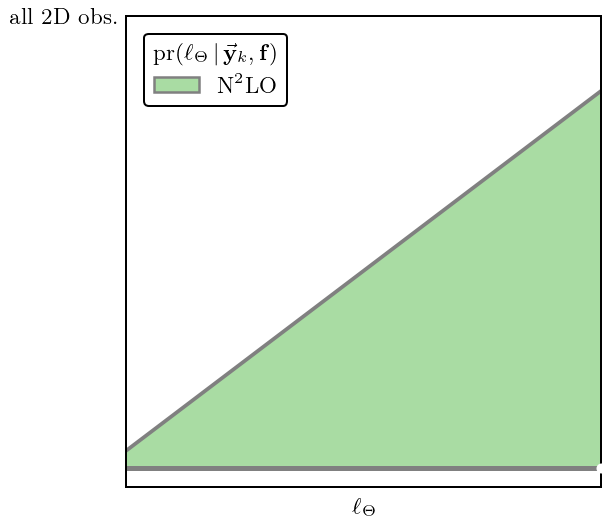

[0.26020086 0.25857353 0.00883139]


2024-06-25 12:16:23,105	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.22016686
Observable all 2D obs., variable lsdeg: mean = 0.22665874270272277
Observable all 2D obs., variable lsdeg: std. dev. = 0.016767542392422338


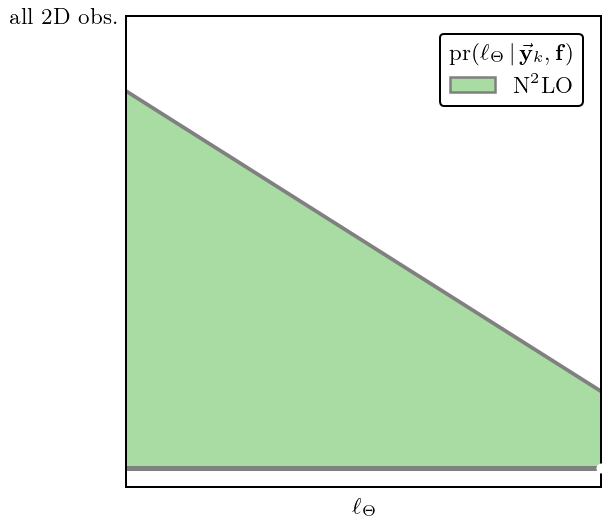

[0.22016686 0.22665874 0.01676754]


2024-06-25 12:16:34,709	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.22016686
Observable all 2D obs., variable lsdeg: mean = 0.2262547172787337
Observable all 2D obs., variable lsdeg: std. dev. = 0.016515964169319178


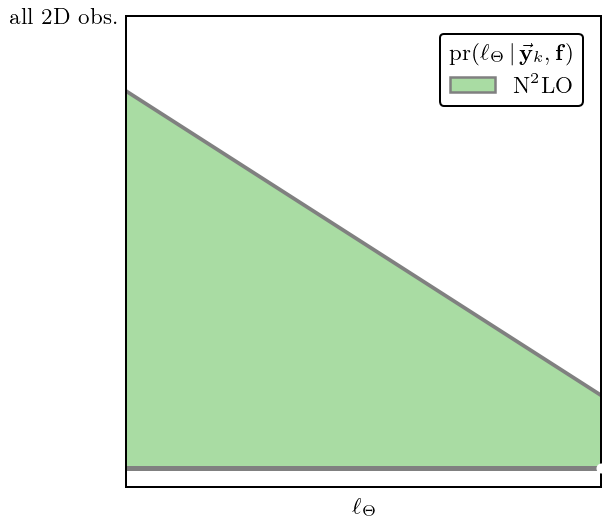

[0.22016686 0.22625472 0.01651596]


2024-06-25 12:16:46,369	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lsdeg: MAP value = 0.26020086
Observable all 2D obs., variable lsdeg: mean = 0.2598676132763615
Observable all 2D obs., variable lsdeg: std. dev. = 0.010559556751379384


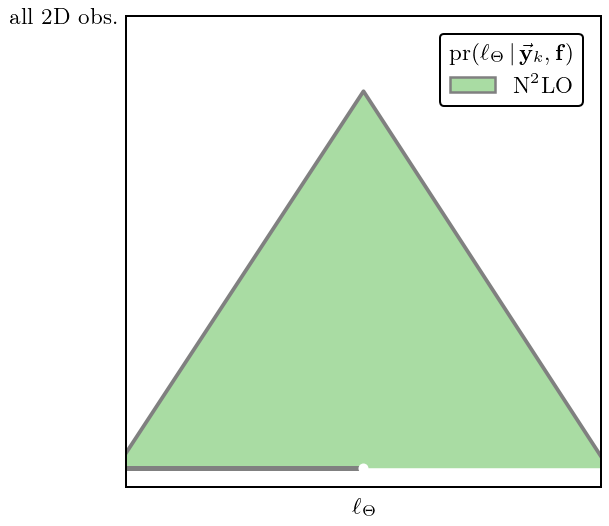

[0.26020086 0.25986761 0.01055956]
Total time elapsed: 184.10905861854553 seconds


In [27]:
ell_fit_pts = np.array([])
ell_fit_stddev = np.array([])
cbar_fit_pts = np.array([])
cbar_fit_stddev = np.array([])

orders_ell = 1
orders_cbar = orders_ell

# calculates posterior pdfs for the scattering-angle length scale and extracts values for 
# the MAP, mean, and variance
for elfp, pfp in zip(t_lab_slice_pts, E_to_p(t_lab_slice_pts, interaction = 'np')):
    ratio_fn=ratio_fn_new
    ratio_fn_kwargs={
        "p_param": p_type,
        "Q_param": Q_type,
        "p" : pfp,
        "mpi_var": mpi_eff_coeffs,
        "lambda_var": Lambda_b_coeffs,
        "single_expansion": False,
    }
    log_likelihood_fn=log_likelihood_new
    log_likelihood_fn_kwargs={
        "p_param": p_type,
        "Q_param": Q_type,
        "p" : pfp,
        "mpi_var": mpi_eff_coeffs,
        "lambda_var": Lambda_b_coeffs,
        "single_expansion": False,
    }
    
    stats_array, _ = generate_posteriors(
        scale_scheme_bunch_array=ScaleSchemeQ_list,
        Q_param_method_array=[Q_type],
        p_param_method_array=[p_type],
        input_space_deg=[degrees_name],
        input_space_tlab=[t_lab_name],
        Elab_slice = elfp,
        t_lab_train_pts=np.array([1, 12, 33, 65, 108, 161, 225, 300]),
        degrees_train_pts=degrees_slice_pts,
        orders_from_ho=orders_ell,
        orders_excluded=[],
        orders_names_dict=None,
        orders_labels_dict=None,
        length_scale_list=[NSKernelParam(0.2 * (np.max(degrees_input) - np.min(degrees_input)), 
                                        [0.05 * (np.max(degrees_input) - np.min(degrees_input)), 
                                        1 * (np.max(degrees_input) - np.min(degrees_input))])],
        length_scale_fixed = False,
        cbar_list = [NSKernelParam(1.0, [0.1, 10])],
        cbar_fixed = True,
        m_pi_eff=mpi_eff_coeffs,
        Lambdab=Lambda_b_coeffs,
        print_all_classes=False,
        savefile_type="png",

        plot_posterior_curvewise_bool=True,
        plot_marg_curvewise_bool=True,
        plot_corner_curvewise_bool=False,
        use_data_curvewise_bool=False,
        save_data_curvewise_bool=False,
        save_posterior_curvewise_bool=False,

        plot_obs_list = plot_obs_list,
        obs_name_grouped_list = obs_name_grouped_list,
        obs_labels_grouped_list = obs_labels_grouped_list,
        mesh_cart_grouped_list = mesh_cart_grouped_list,
        variables_array_curvewise = variables_array,
        
        ratio_fn_posterior = ratio_fn,
        ratio_fn_kwargs_posterior = ratio_fn_kwargs,
        log_likelihood_fn_posterior = log_likelihood_fn,
        log_likelihood_fn_kwargs_posterior = log_likelihood_fn_kwargs,
        
        cbar_fn = cbar_fn,
        cbar_fn_kwargs = cbar_fn_kwargs,
        scaling_fn = scaling_fn,
        scaling_fn_kwargs = scaling_fn_kwargs,

        plot_posterior_pointwise_bool=False,
        save_posterior_pointwise_bool=False,

        variables_array_pointwise = np.array([0]),

        filename_addendum="",
    )
    
    print(stats_array)
    ell_fit_pts = np.append(ell_fit_pts, stats_array[[i % 3 == 0 for i in range(np.shape(stats_array)[0])]])
    ell_fit_stddev = np.append(ell_fit_stddev, stats_array[[i % 3 == 2 for i in range(np.shape(stats_array)[0])]])
#     cbar_fit_pts = np.append(cbar_fit_pts, stats_array[[i % 3 == 0 for i in range(np.shape(stats_array)[0])]])
#     cbar_fit_stddev = np.append(cbar_fit_stddev, stats_array[[i % 3 == 2 for i in range(np.shape(stats_array)[0])]])
# ell_fit_stddev = np.zeros(np.shape(ell_fit_pts))

[ 21.65954334  48.43221129  75.03085916  99.25649711 124.42460409
 150.06171898 174.62482246 199.69112475 225.09258005 249.79004319
 274.82880024 300.12344279 324.89315826 349.92064163 375.15430749
 399.96915557]
[3.30278349 2.50210381 1.38115239 1.34111834 1.38115239 0.6205067
 0.54043871 0.54043871 0.46037075 0.42033678 0.34026882 0.30023482
 0.26020086 0.22016686 0.22016686 0.26020086]
[0.26664006 0.14921104 0.10828627 0.08901949 0.11654023 0.18430166
 0.02619299 0.02762646 0.02581075 0.01721998 0.02590604 0.00913412
 0.00883139 0.01676754 0.01651596 0.01055956]
[105.12180354  -1.01965644]
[[ 1.01465679e+03 -1.75557369e+00]
 [-1.75557369e+00  3.09013604e-03]]
N2LO: magnitude = 105.12180354039467 +/- 31.853677779886343
N2LO: power = -1.0196564436996844 +/- 0.05558899204133019

[4.56866582 3.20860167 2.60939311 2.25342038 2.01110505 1.83259258
 1.69408252 1.58259077 1.49035466 1.41241126 1.34542041 1.28704086
 1.23557648 1.18976441 1.14864249 1.11146308 1.07763529 1.0466851
 1.0182272

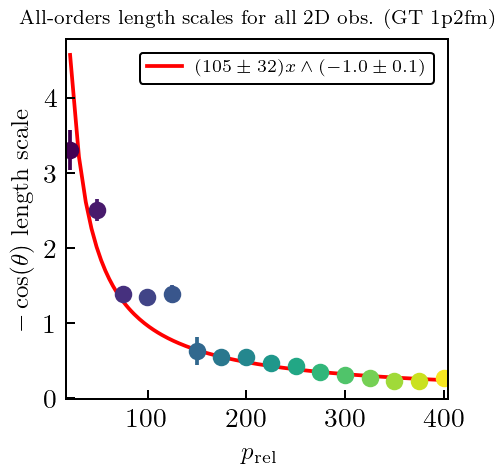

In [30]:
from sklearn.linear_model import LinearRegression

# dicts for orders
orders_labels_dict = {6: r'N$^{4}$LO+', 5: r'N$^{4}$LO',
                    4: r'N$^{3}$LO', 3: r'N$^{2}$LO', 2: r'NLO'}
orders_names_dict = {6: r'N4LO+', 5: r'N4LO', 4: r'N3LO', 3: r'N2LO', 2: r'NLO'}

# sets fitting functions
def power(x, a, b):
    return a * x**b

for ss_idx in range(len(ScaleSchemeQ_list)):
    # create figure with n_orders subplots
    fig_tlab_ls_all, axs_tlab_ls_all = plt.subplots(1, 1, sharex = True, sharey=True, 
                                                    figsize=(2.8, 2.8))
    
    axs_tlab_ls_all.set_xlabel(t_lab_label, size = 10)
    axs_tlab_ls_all.set_ylabel(degrees_label + ' length scale', size = 10)
    axs_tlab_ls_all.set_title('All-orders length scales for ' + obs_labels_grouped_list[0] \
                + " (" + ScaleScheme.potential_string +  " " + ScaleScheme.cutoff_string + ")"\
                , size = 8)
    # axs_tlab_ls_all.semilogx()
    # axs_tlab_ls_all.semilogy()

    for o_idx in range(orders_ell):
        idx_mask = [i % (orders_ell * len(ScaleSchemeQ_list)) == 
                 (o_idx + ss_idx * orders_ell) for i in range(len(ell_fit_pts))]

        # scatter-plots the means and (1-sigma) confidence intervals for the length scale
        axs_tlab_ls_all_array = ell_fit_pts[idx_mask]
        axs_tlab_ls_all_stddev_array = ell_fit_stddev[idx_mask]
        for t in t_lab_subset:
            axs_tlab_ls_all.errorbar(t, 
                        axs_tlab_ls_all_array[np.isin(t_lab_subset, t)], 
                        yerr = axs_tlab_ls_all_stddev_array[np.isin(t_lab_subset, t)],
                        c = mpl.cm.ScalarMappable(norm=norm_tlab, cmap=cmap_tlab).to_rgba(t), 
                        fmt = 'o', 
                       zorder = o_idx)
            
        # fits the points to a power law
        popt, pcov = curve_fit(power, t_lab_subset, 
                                            axs_tlab_ls_all_array, 
                                            sigma = axs_tlab_ls_all_stddev_array,
                                             )

        # plots the line of best fit
        axs_tlab_ls_all.plot(t_lab_input, 
                    power(t_lab_input, popt[0], popt[1]), 
                    color = "red", 
                    label = rf"$({popt[0]:2.0f} \pm {np.sqrt(pcov[0, 0]):2.0f}) x \wedge ({popt[1]:1.1f} \pm {np.sqrt(pcov[1, 1]):1.1f})$", 
                    zorder = o_idx)
        # prints the best fit values
        print(orders_names_dict[len(ScaleSchemeQ_list[ss_idx].orders_full) - orders_ell + o_idx + 1] + ": magnitude = " + str(popt[0]) + " +/- " + str(np.sqrt(pcov[0, 0])))
        print(orders_names_dict[len(ScaleSchemeQ_list[ss_idx].orders_full) - orders_ell + o_idx + 1] + ": power = " + str(popt[1]) + " +/- " + str(np.sqrt(pcov[1, 1])) + "\n")

    axs_tlab_ls_all.set_xlim(left = np.min(t_lab_subset) - 0.01 * (np.max(t_lab_subset) - np.min(t_lab_subset)), 
                         right = np.max(t_lab_subset) + 0.01 * (np.max(t_lab_subset) - np.min(t_lab_subset)))
    axs_tlab_ls_all.legend(fontsize = 7, loc = 'upper right')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    fig_tlab_ls_all.tight_layout()

    # saves figure
    fig_tlab_ls_all.savefig('figures2/' + 'ls' + '_' + 'tlab_slices' + '_' + 'allorders' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_name_grouped_list[0] + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)

## Plots of lab-energy length scale and variance by order

In [31]:
# choose colormap and fix to different energies
cmap_deg = mpl.cm.magma
norm_deg = mpl.colors.Normalize(vmin=np.min(degrees_input), vmax=np.max(degrees_input))

C:\Users\pjmil\AppData\Local\Temp\ipykernel_17812\2836432339.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  (axs_deg_ls.flat)[o - 1].scatter(d,
C:\Users\pjmil\AppData\Local\Temp\ipykernel_17812\2836432339.py:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  (axs_deg_var.flat)[o - 1].scatter(d,
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b term

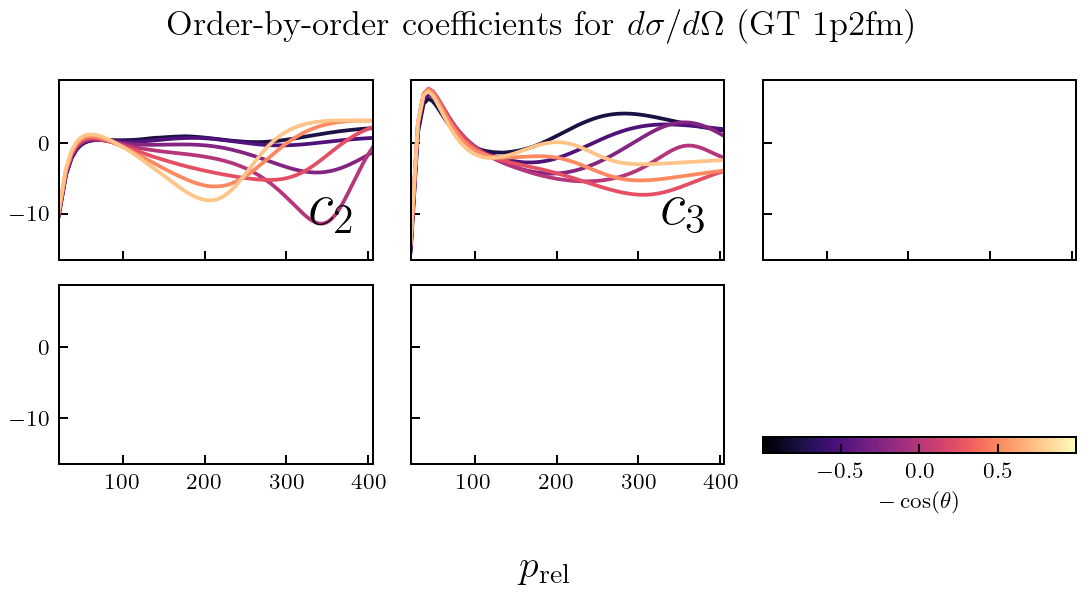

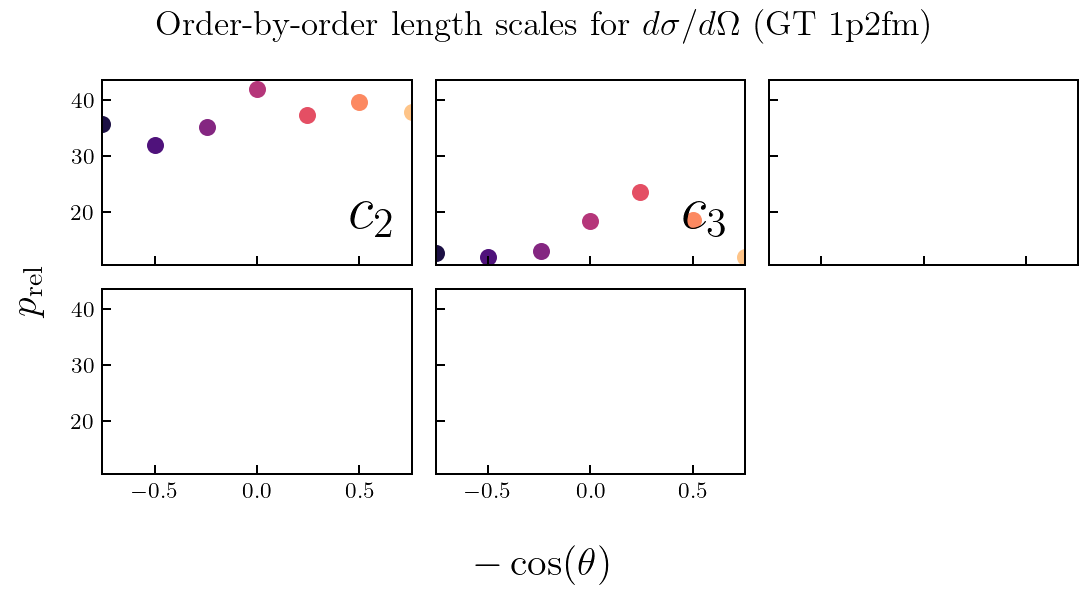

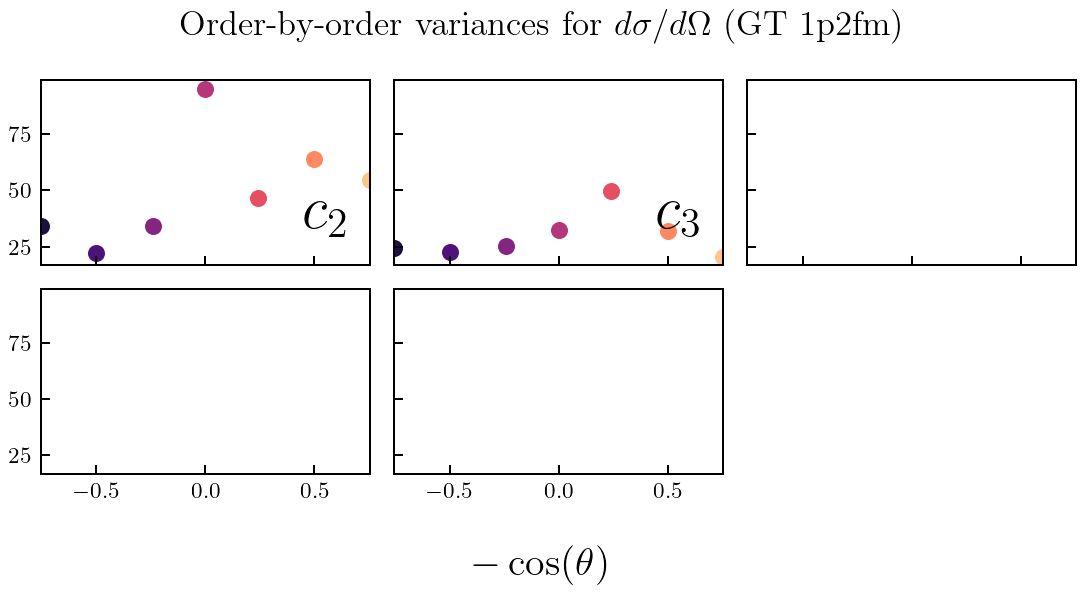

In [32]:
# create figure with n_orders subplots
fig_deg_coeffs, axs_deg_coeffs = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(6.2, 3.3))
fig_deg_coeffs.supxlabel(t_lab_label, size = 16)
fig_deg_coeffs.suptitle('Order-by-order coefficients for ' + obs_data_label + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 14)

# create figure with n_orders subplots
fig_deg_ls, axs_deg_ls = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(6.2, 3.3))
fig_deg_ls.supxlabel(degrees_label, size = 16)
fig_deg_ls.supylabel(t_lab_label, size = 16)
fig_deg_ls.suptitle('Order-by-order length scales for ' + obs_data_label + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 14)

# create figure with n_orders subplots
fig_deg_var, axs_deg_var = plt.subplots(2, 3, sharex = True, sharey=True, figsize=(6.2, 3.3))
fig_deg_var.supxlabel(degrees_label, size = 16)
fig_deg_var.suptitle('Order-by-order variances for ' + obs_data_label + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 14)

# plots at each angle in mesh
for o in range(1, np.shape(coeffs_surfaces)[0]):
    (axs_deg_coeffs.flat)[o - 1].text(0.8, 0.2, 
                       rf'$c_{{{ScaleScheme.orders_full[o]}}}$', 
                       transform=(axs_deg_coeffs.flat)[o - 1].transAxes, 
                       size = 24)
    (axs_deg_ls.flat)[o - 1].text(0.8, 0.2, 
                       rf'$c_{{{ScaleScheme.orders_full[o]}}}$', 
                       transform=(axs_deg_ls.flat)[o - 1].transAxes, 
                       size = 24)
    (axs_deg_var.flat)[o - 1].text(0.8, 0.2, 
                       rf'$c_{{{ScaleScheme.orders_full[o]}}}$', 
                       transform=(axs_deg_var.flat)[o - 1].transAxes, 
                       size = 24)
        
    for d in degrees_subset:
        # plots coefficients
        (axs_deg_coeffs.flat)[o - 1].plot(t_lab_input, 
                    coeffs_surfaces[o, :, np.isin(degrees_input, d)].T, 
                    c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d))
        
        gp = gm.ConjugateGaussianProcess(
            RBF(length_scale=60,
                      length_scale_bounds=(12, 300)) + \
                      WhiteKernel(1e-5, noise_level_bounds='fixed'), 
            center=0, 
            disp=0, 
            df=1,
            scale=1, 
            n_restarts_optimizer=100, 
            random_state=None,
            sd=None)
        # fits a GP to the coefficients at the training points
        gp.fit(X_train_tlab, 
               (coeffs_surfaces[o, :, np.isin(degrees_input, d)].T)[np.isin(t_lab_input, X_train_tlab)])
        # extracts the length scale from the GP
        ls_fit = np.exp(gp.kernel_.theta)
        (axs_deg_ls.flat)[o - 1].scatter(d, 
                    ls_fit, 
                    c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d))
        # extracts the variance from the GP
        pred, std = gp.predict(X_tlab, return_std=True)
        underlying_std = gp.cov_factor_
        (axs_deg_var.flat)[o - 1].scatter(d, 
                    underlying_std, 
                    c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d))

# deletes extraneous Axes objects
fig_deg_coeffs.delaxes(axs_deg_coeffs[-1, -1])        
fig_deg_coeffs.colorbar(mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg), 
            ax = axs_deg_coeffs[-1, -1],
             orientation='horizontal', label=degrees_label)

fig_deg_ls.delaxes(axs_deg_ls[-1, -1])
fig_deg_var.delaxes(axs_deg_var[-1, -1])

# saves figures
fig_deg_coeffs.tight_layout()
fig_deg_coeffs.savefig('figures2/' + 'coeffs' + '_' + 'deg_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)
fig_deg_ls.tight_layout()
fig_deg_ls.savefig('figures2/' + 'ls' + '_' + 'deg_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)
fig_deg_var.tight_layout()
fig_deg_var.savefig('figures2/' + 'var' + '_' + 'deg_slices' + '_' + 'orderbyorder' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_data_name + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)

## Plots of lab-energy length scale and variance over all orders

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.84875416e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 40, 'nit': 6, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6.71115403e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 35, 'nit': 6, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.99269807e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 37, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b te

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-6.50659739e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 35, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([9.48029377e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 36, 'nit': 4, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.000182]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 36, 'nit': 3, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminate

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.69428648e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 36, 'nit': 7, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([4.94789779e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 31, 'nit': 2, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([9.61716939e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 33, 'nit': 2, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b term

C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([8.39700752e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 40, 'nit': 7, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-1.65584132e-05]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 36, 'nit': 5, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminated abnormally with the "
C:\Users\pjmil\anaconda3\envs\modern-nn-potentials\lib\site-packages\gsum\models.py:897: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.000177]), 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 41, 'nit': 6, 'warnflag': 2}
  warnings.warn("fmin_l_bfgs_b terminate

[[11.68398808  9.75720883 14.42661462 29.41540128 25.76024201 20.14569231
  18.16561702]
 [ 1.14227027  1.72118159  1.48111404  1.6080582   2.52553088  2.03898539
   1.23288933]
 [ 1.74219177  0.55522602  1.30442685  1.62830579  2.63964276  1.8210641
   1.06261167]
 [ 4.39041761  5.6837846   6.07750258  5.16491009  4.91333835  2.96690263
   6.24848188]
 [ 0.73410577  0.68685122  1.56774095  3.41075248  2.55193516  1.99159628
   2.6809278 ]
 [ 3.18474515  6.01361295  6.92991632  6.59942696 10.08462165  4.58587275
   0.58670384]]


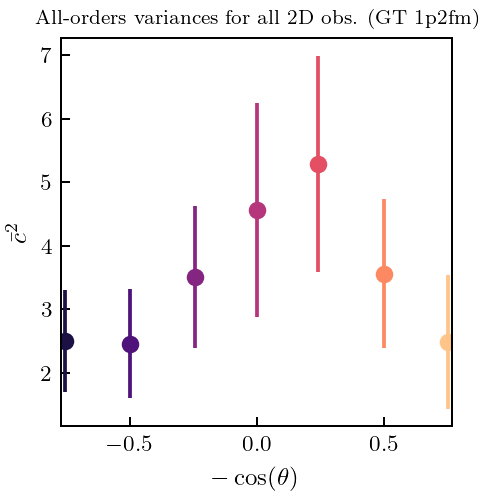

In [33]:
axs_deg_var_all_array = np.array([])
axs_deg_var_all_stddev_array = np.array([])

# obs_var_name_array_name = obs_data_name
# obs_var_name_array = [obs_var_name_array_name]
# obs_var_label_array = [obs_data_label]
obs_var_name_array_name = "ALLOBS"
obs_var_name_array = ["DSG", "D", "AXX", "AYY", "A", "AY"]
obs_var_label_array = ["all 2D obs."]

# create figure with n_orders subplots
fig_deg_var_all, axs_deg_var_all = plt.subplots(1, 1, sharex = True, sharey=True, 
                                                figsize=(2.8, 2.8))
axs_deg_var_all.set_xlabel(degrees_label, size = 10)
axs_deg_var_all.set_ylabel(r"$\bar{c}^{2}$", size = 10)
axs_deg_var_all.set_title('All-orders variances for ' + obs_var_label_array[0] + " (" + 
             ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 8)
# axs_deg_var_all.semilogx()
# axs_deg_var_all.semilogy()

for ovna_idx, ovna in enumerate(obs_var_name_array):
    # extracts data
    if ovna == "AY":
        ovna_data = ScaleScheme.get_data("PB")
    else:
        ovna_data = ScaleScheme.get_data(ovna)

    # sets reference scale
    if ovna == "DSG":
        ovna_yref = ovna_data[-1, :, :]
    else:
        ovna_yref = np.ones(np.shape(ovna_data)[1:])

    coeffs_flattened_ovna = gm.coefficients(
                np.reshape(ovna_data, (np.shape(ovna_data)[0], np.shape(ovna_data)[1] * np.shape(ovna_data)[2])).T, 
                ratio=np.reshape(ratio, np.shape(ratio)[0] * np.shape(ratio)[1]),
                ref=np.reshape(ovna_yref, np.shape(ovna_yref)[0] * np.shape(ovna_yref)[1]), 
                orders=ScaleScheme.orders_full)
    coeffs_surfaces_ovna = np.reshape(coeffs_flattened_ovna.T, np.shape(ovna_data))

    # plots at each angle in mesh
    for d in degrees_subset:
        gp = gm.ConjugateGaussianProcess(
            RBF(length_scale=60,
                      length_scale_bounds=(12, 300)) + \
                      WhiteKernel(1e-5, noise_level_bounds='fixed'), 
            center=0, 
            disp=0, 
            df=1,
            scale=1, 
            n_restarts_optimizer=100, 
            random_state=None,
            sd=None)
        # fits the GP
        gp.fit(X_train_tlab, 
               np.reshape(coeffs_surfaces_ovna[:, :, np.isin(degrees_input, d)].T, 
                         (len(t_lab), 
                         np.shape(coeffs_surfaces_ovna)[0]))[np.isin(t_lab_input, X_train_tlab), :])

        # extracts the variance and assesses its error bars as scaled-inverse-chi-squared-distributed
        pred, std = gp.predict(X_tlab, return_std=True)
        underlying_std = gp.cov_factor_
        stddev_underlying_std = underlying_std * np.sqrt(2 / (gp.df_ - 4))

        # appends variance values to an array
        axs_deg_var_all_array = np.append(axs_deg_var_all_array, underlying_std)
        axs_deg_var_all_stddev_array = np.append(axs_deg_var_all_stddev_array, stddev_underlying_std)

# reshapes the arrays for plotting
axs_deg_var_all_array = np.reshape(axs_deg_var_all_array, 
                                    (len(obs_var_name_array), len(degrees_subset)))
axs_deg_var_all_stddev_array = np.reshape(axs_deg_var_all_stddev_array, 
                                    (len(obs_var_name_array), len(degrees_subset)))

# plots variances with error bars
for d in degrees_subset:
    axs_deg_var_all.errorbar(d, 
                    (np.prod(axs_deg_var_all_array, axis = 0)**(1 / len(obs_var_name_array)))[np.isin(degrees_subset, d)], 
                    yerr = (np.sum(axs_deg_var_all_stddev_array, axis = 0) / len(obs_var_name_array))[np.isin(degrees_subset, d)],
                    c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d), 
                    fmt = 'o')

# sets x-axis limits
axs_deg_var_all.set_xlim(left = np.min(degrees_subset) - 0.01 * (np.max(degrees_subset) - np.min(degrees_subset)), 
                         right = np.max(degrees_subset) + 0.01 * (np.max(degrees_subset) - np.min(degrees_subset)))

# saves figures
fig_deg_var_all.tight_layout()
fig_deg_var_all.savefig('figures2/' + 'var' + '_' + 'deg_slices' + '_' + 'allorders' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_var_name_array_name + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)

In [34]:
ScaleSchemeQ_list = [ScaleScheme]

# sets random variables for Bayesian statistical calculations
ls_tlab_vals = np.linspace(1, 150, 
                          500, dtype=np.dtype('f4'))

mesh_cart_degslice = gm.cartesian(np.log(ls_tlab_vals))

LsTlabVariable = RandomVariable(var=ls_tlab_vals,
                            user_val=None,
                            name='lstlab',
                            label="\ell_{T}",
                            units="MeV",
                            ticks=[],
                            logprior=np.zeros(len(ls_tlab_vals)),
                            logprior_name="noprior",
                            marg_bool=True)
variables_array = np.array([LsTlabVariable])

# ALLOBS for angle input spaces
# plot_obs_list = [[obs_data_name]]
# obs_name_grouped_list = [obs_data_name]
# obs_labels_grouped_list = [obs_data_label]
# mesh_cart_grouped_list = [[mesh_cart_degslice]]
plot_obs_list = [["DSG", "D", "AXX", "AYY", "A", "AY"]]
obs_name_grouped_list = ["ALLOBS"]
obs_labels_grouped_list = ["all 2D obs."]
mesh_cart_grouped_list = [[mesh_cart_degslice, mesh_cart_degslice, mesh_cart_degslice, 
                          mesh_cart_degslice, mesh_cart_degslice, mesh_cart_degslice, ]]

ell_fit_pts = np.array([])
ell_fit_stddev = np.array([])

orders_ell = 1

# creates a new ratio and log_likelihood function
def ratio_fn_new(X, p_grid_train, p_param, p_shape, Q_param, mpi_var, p, lambda_var, 
                 single_expansion = False):
    """
    Function for interpolating between the input space and the ratio across that input space.

    Parameters
    ----------
    X (array) : array of input-space values. These are never called but must be passed here anyway due to GSUM.
    p_grid_train : array of momenta for evaluating ratio
    p_param (str) : type of p parametrization.
        Can be "Qofprel", "Qofqcm", or "Qofpq"
    p_shape (tuple) : shape for momentum before calculating ratio.
    Q_param (str) : type of Q parametrization.
        Can be "smoothmax", "max", or "sum".
    mpi_var (float) : value of the (effective) pion mass (in MeV) for calculating the ratio.
    lambda_var (float) : value of the breakdown scale (in MeV) for calculating the ratio.
    single_expansion (bool) : if True, then mpi_var is set to 0 within Q_approx
        Default : False
    """
    return Q_approx(p = p, 
                    Q_parametrization=Q_param, Lambda_b = lambda_var, 
                    m_pi = mpi_var, single_expansion=single_expansion)

@ray.remote
def log_likelihood_new(gp_fitted,
                   mesh_points,
                   log_likelihood_fn_kwargs
                   ):
    """
    Calculates the log-likelihood for a set of inputs.

    Parameters
    ----------
    gp_fitted (TruncationGP) : fitted Gaussian process object.
    mesh_points (float array) : array of tuples of random variables at which to evaluate the log-likelihood.
        Must be in the order (lambda_var, all length scales, mpi_var).
    log_likelihood_fn_kwargs (dict) : keyword arguments for log_likelihood.
    """
    return [gp_fitted.log_marginal_likelihood([pt[n] for n in range(len(pt))],
                                              **{**log_likelihood_fn_kwargs}

                                              ) for pt in mesh_points]

2024-06-25 12:17:56,997	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lstlab: MAP value = 46.983967
Observable all 2D obs., variable lstlab: mean = 62.15247517579485
Observable all 2D obs., variable lstlab: std. dev. = 20.746347300822794


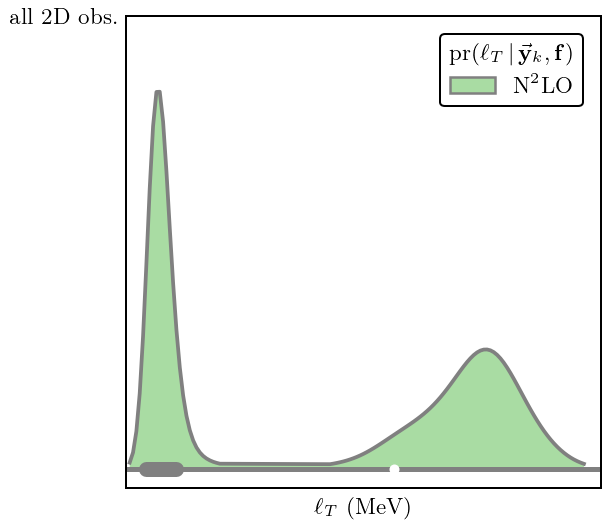

2024-06-25 12:18:08,308	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lstlab: MAP value = 78.93387
Observable all 2D obs., variable lstlab: mean = 80.82073423230159
Observable all 2D obs., variable lstlab: std. dev. = 4.460066183062631


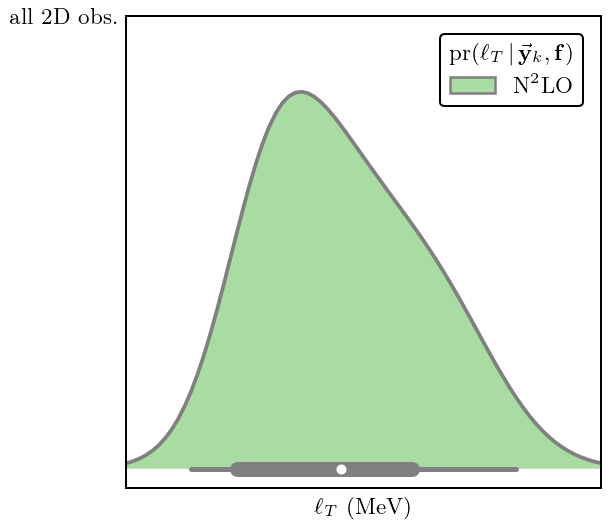

2024-06-25 12:18:19,501	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lstlab: MAP value = 50.86573
Observable all 2D obs., variable lstlab: mean = 51.773278668828844
Observable all 2D obs., variable lstlab: std. dev. = 3.2638339925463304


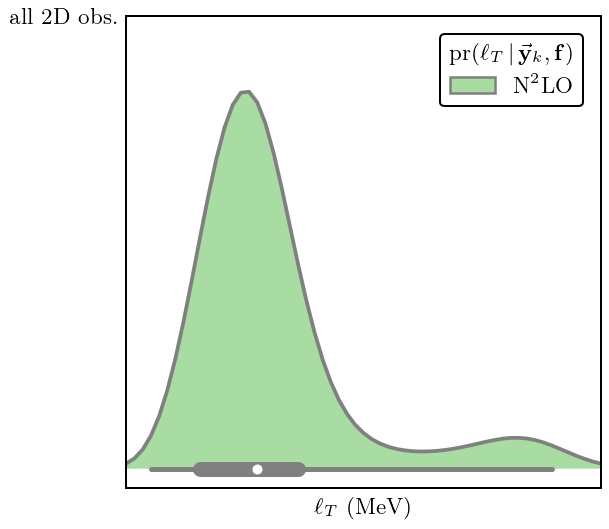

2024-06-25 12:18:30,784	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lstlab: MAP value = 47.58116
Observable all 2D obs., variable lstlab: mean = 47.65780371742969
Observable all 2D obs., variable lstlab: std. dev. = 1.0966466328440518


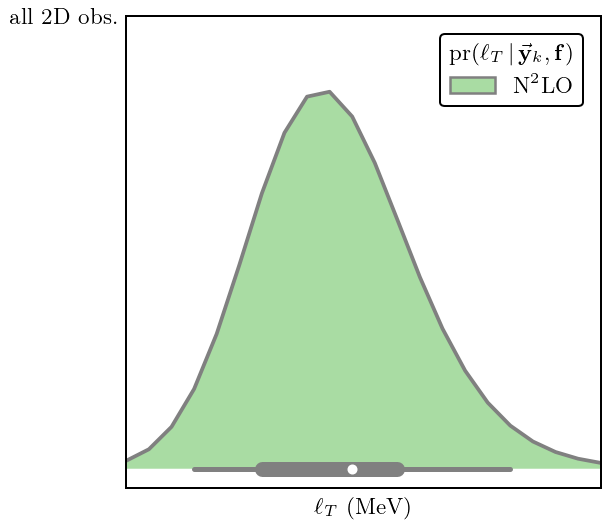

2024-06-25 12:18:42,369	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lstlab: MAP value = 61.913826
Observable all 2D obs., variable lstlab: mean = 61.94968112248687
Observable all 2D obs., variable lstlab: std. dev. = 2.6900809966779184


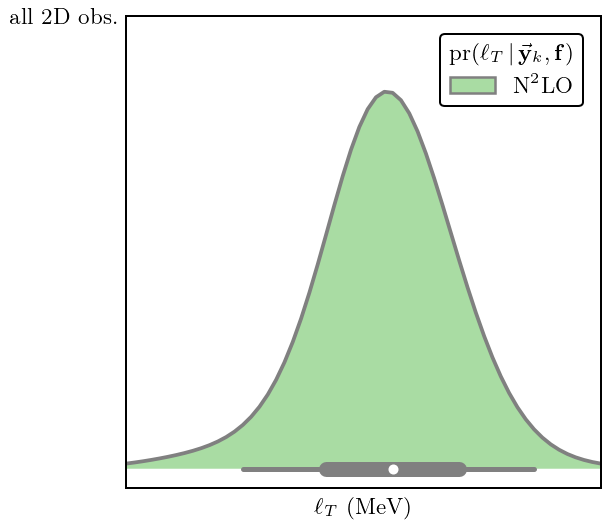

2024-06-25 12:18:54,388	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lstlab: MAP value = 48.178356
Observable all 2D obs., variable lstlab: mean = 48.4596439442296
Observable all 2D obs., variable lstlab: std. dev. = 1.5105244702144076


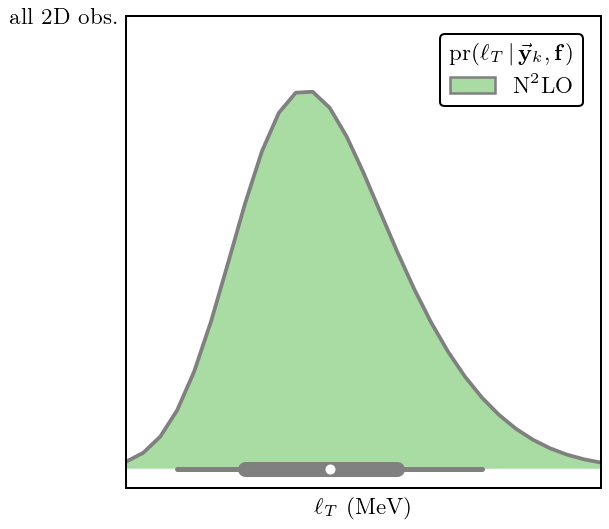

2024-06-25 12:19:06,559	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable all 2D obs., variable lstlab: MAP value = 45.192387
Observable all 2D obs., variable lstlab: mean = 45.10723364121604
Observable all 2D obs., variable lstlab: std. dev. = 0.7214956804909385


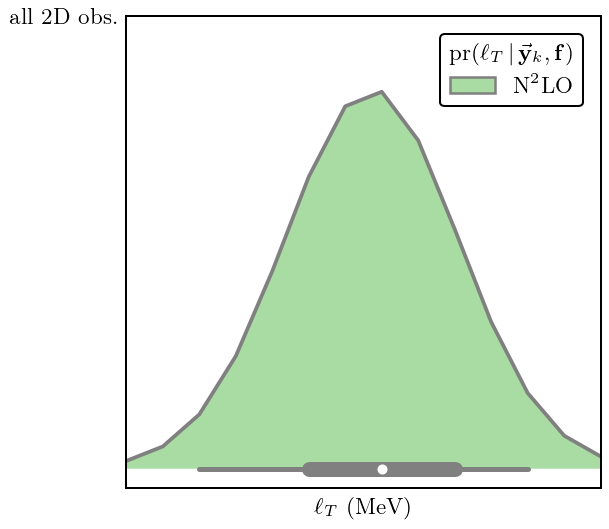

In [35]:
# calculates posterior pdfs for the lab-energy length scale and extracts values for 
# the MAP, mean, and variance
for degfp in degrees_slice_pts:
    ratio_fn=ratio_fn_new
    ratio_fn_kwargs={
        "p_param": p_type,
        "Q_param": Q_type,
        "p" : E_to_p(t_lab_slice_pts, interaction = 'np'),
        "mpi_var": mpi_eff_coeffs,
        "lambda_var": Lambda_b_coeffs,
        "single_expansion": False,
    }
    log_likelihood_fn=log_likelihood_new
    log_likelihood_fn_kwargs={
        "p_param": p_type,
        "Q_param": Q_type,
        "p" : E_to_p(t_lab_slice_pts, interaction = 'np'),
        "mpi_var": mpi_eff_coeffs,
        "lambda_var": Lambda_b_coeffs,
        "single_expansion": False,
    }
    
    stats_array, _ = generate_posteriors(
        scale_scheme_bunch_array=ScaleSchemeQ_list,
        Q_param_method_array=[Q_type],
        p_param_method_array=[p_type],
        input_space_deg=[degrees_name],
        input_space_tlab=[t_lab_name],
        deg_slice = degfp,
        t_lab_train_pts=t_lab_slice_pts,
        degrees_train_pts=np.array([41, 60, 76, 90, 104, 120, 139]),
        orders_from_ho=orders_ell,
        orders_excluded=[],
        orders_names_dict=None,
        orders_labels_dict=None,
        length_scale_list=[NSKernelParam(60, [10, 200])],
        length_scale_fixed = False,
        cbar_list = [NSKernelParam(1.0, [0.1, 10])],
        cbar_fixed = True,
        m_pi_eff=mpi_eff_coeffs,
        Lambdab=Lambda_b_coeffs,
        print_all_classes=False,
        savefile_type="png",

        plot_posterior_curvewise_bool=True,
        plot_marg_curvewise_bool=True,
        plot_corner_curvewise_bool=False,
        use_data_curvewise_bool=False,
        save_data_curvewise_bool=False,
        save_posterior_curvewise_bool=False,

        plot_obs_list = plot_obs_list,
        obs_name_grouped_list = obs_name_grouped_list,
        obs_labels_grouped_list = obs_labels_grouped_list,
        mesh_cart_grouped_list = mesh_cart_grouped_list,
        variables_array_curvewise = variables_array,
        
        ratio_fn_posterior = ratio_fn,
        ratio_fn_kwargs_posterior = ratio_fn_kwargs,
        log_likelihood_fn_posterior = log_likelihood_fn,
        log_likelihood_fn_kwargs_posterior = log_likelihood_fn_kwargs,
        
        cbar_fn = cbar_fn,
        cbar_fn_kwargs = cbar_fn_kwargs,
        scaling_fn = scaling_fn,
        scaling_fn_kwargs = scaling_fn_kwargs,

        plot_posterior_pointwise_bool=False,
        save_posterior_pointwise_bool=False,

        variables_array_pointwise = np.array([0]),

        filename_addendum="",
    )

    ell_fit_pts = np.append(ell_fit_pts, stats_array[[i % 3 == 0 for i in range(np.shape(stats_array)[0])]])
    ell_fit_stddev = np.append(ell_fit_stddev, stats_array[[i % 3 == 2 for i in range(np.shape(stats_array)[0])]])

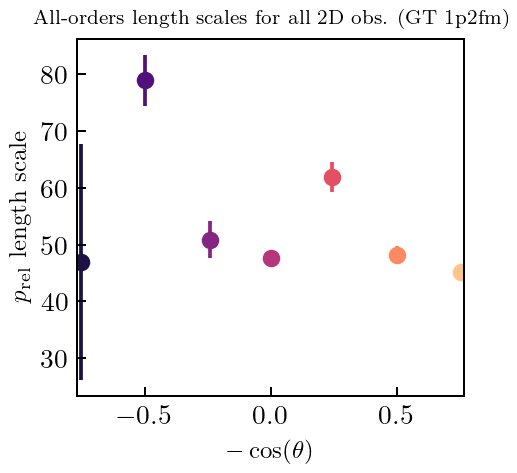

In [36]:
from sklearn.linear_model import LinearRegression

# dicts for orders
orders_labels_dict = {6: r'N$^{4}$LO+', 5: r'N$^{4}$LO',
                    4: r'N$^{3}$LO', 3: r'N$^{2}$LO', 2: r'NLO'}
orders_names_dict = {6: r'N4LO+', 5: r'N4LO', 4: r'N3LO', 3: r'N2LO', 2: r'NLO'}

for ss_idx in range(len(ScaleSchemeQ_list)):
    # create figure with n_orders subplots
    fig_deg_ls_all, axs_deg_ls_all = plt.subplots(1, 1, sharex = True, sharey=True, 
                                                  figsize=(2.8, 2.8))
    axs_deg_ls_all.set_xlabel(degrees_label, size = 10)
    axs_deg_ls_all.set_ylabel(t_lab_label + ' length scale', size = 10)
    axs_deg_ls_all.set_title('All-orders length scales for ' + obs_labels_grouped_list[0] + " (" + 
                 ScaleScheme.potential_string + " " + ScaleScheme.cutoff_string + ")", size = 8)
    # axs_deg_ls_all.semilogx()
    # axs_deg_ls_all.semilogy()

    for o_idx in range(orders_ell):
        idx_mask = [i % (orders_ell * len(ScaleSchemeQ_list)) == 
                 (o_idx + ss_idx * orders_ell) for i in range(len(ell_fit_pts))]

        for d in degrees_subset:
            # scatter-plots the means and (1-sigma) confidence intervals for the length scale
            axs_deg_ls_all.errorbar(d, 
                        ell_fit_pts[idx_mask][np.isin(degrees_subset, d)], 
                        yerr = ell_fit_stddev[idx_mask][np.isin(degrees_subset, d)],
                        c = mpl.cm.ScalarMappable(norm=norm_deg, cmap=cmap_deg).to_rgba(d),
                        fmt = 'o', 
                       zorder = o_idx)

    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    fig_deg_ls_all.tight_layout()
    
    axs_deg_ls_all.set_xlim(left = np.min(degrees_subset) - 0.01 * (np.max(degrees_subset) - np.min(degrees_subset)), 
                         right = np.max(degrees_subset) + 0.01 * (np.max(degrees_subset) - np.min(degrees_subset)))
    
    fig_deg_ls_all.tight_layout()
    # saves figure
    fig_deg_ls_all.savefig('figures2/' + 'ls' + '_' + 'deg_slices' + '_' + 'allorders' + '_' +
                    ScaleScheme.potential_string + ScaleScheme.cutoff_string + '_' +
                    obs_name_grouped_list[0] + '_Q' + Q_type + '_' + p_type + '_' + t_lab_name + '_' + 
                    degrees_name)

## Plots $Q$ as a constant at different slices in momentum and fits to linear curve

2024-06-25 14:31:35,645	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.07060606
Observable Obs., variable Q: mean = 0.07009401597272548
Observable Obs., variable Q: std. dev. = 0.006444254024444415


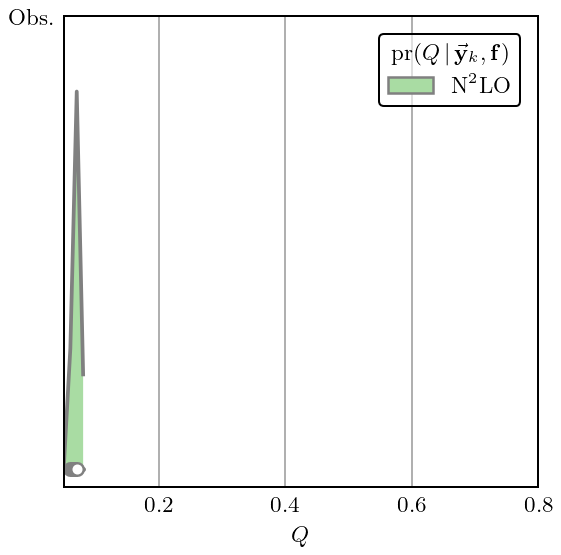

2024-06-25 14:31:57,713	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.13121212
Observable Obs., variable Q: mean = 0.1353623634511016
Observable Obs., variable Q: std. dev. = 0.012274620448579911


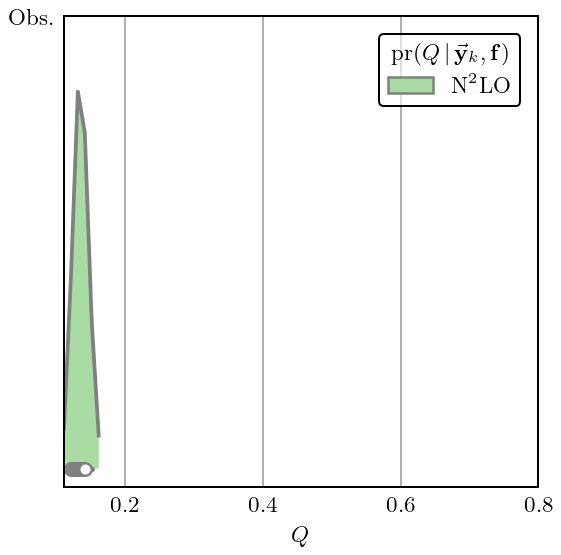

2024-06-25 14:32:22,415	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.15141414
Observable Obs., variable Q: mean = 0.15150478344559826
Observable Obs., variable Q: std. dev. = 0.016602681814536394


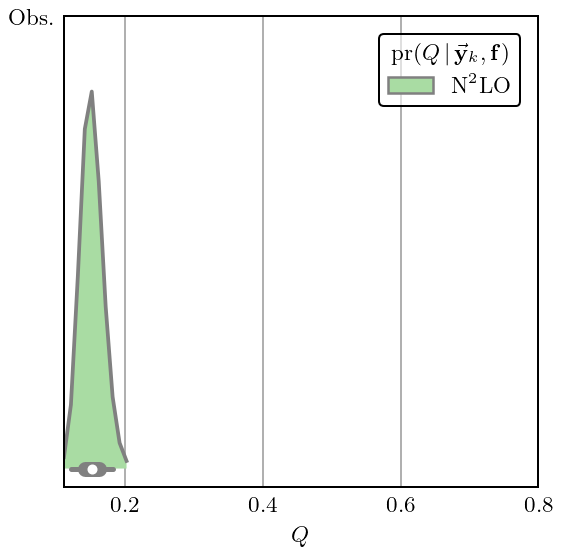

2024-06-25 14:32:47,841	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.16151515
Observable Obs., variable Q: mean = 0.15949863565812436
Observable Obs., variable Q: std. dev. = 0.01895413782389955


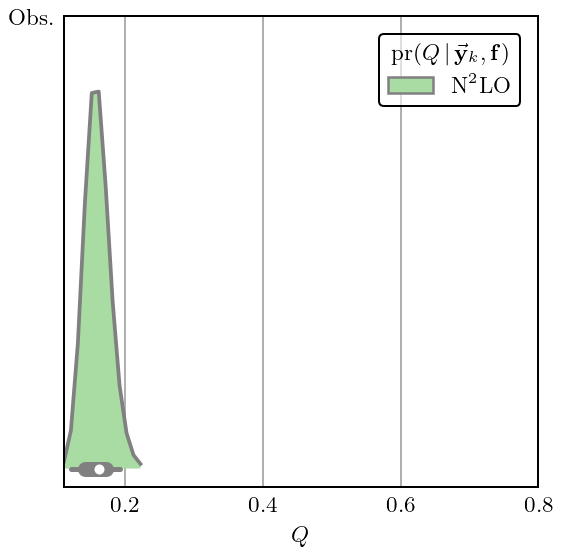

2024-06-25 14:33:14,388	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.13121212
Observable Obs., variable Q: mean = 0.1350157590421056
Observable Obs., variable Q: std. dev. = 0.023889732430642786


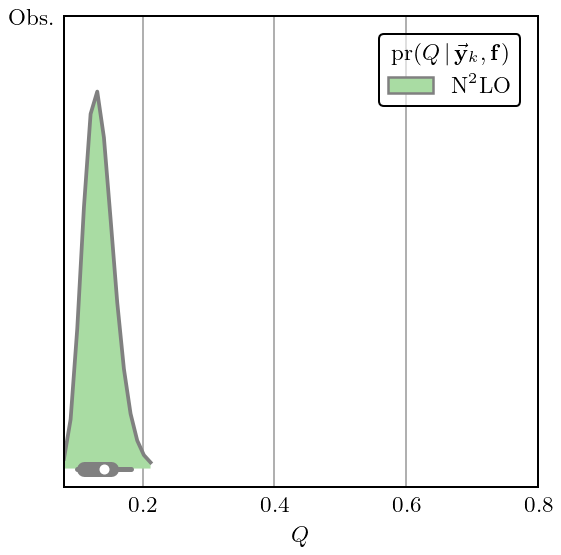

2024-06-25 14:33:41,259	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.17161617
Observable Obs., variable Q: mean = 0.19421038281810932
Observable Obs., variable Q: std. dev. = 0.05118639265841278


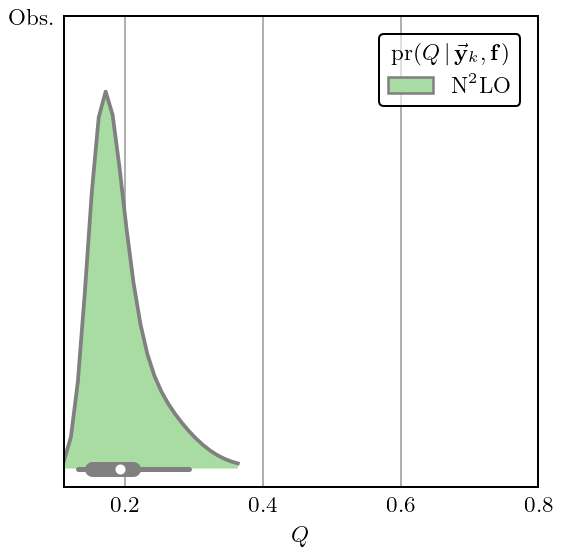

2024-06-25 14:34:07,717	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.2019192
Observable Obs., variable Q: mean = 0.20746982366366692
Observable Obs., variable Q: std. dev. = 0.027057530273509184


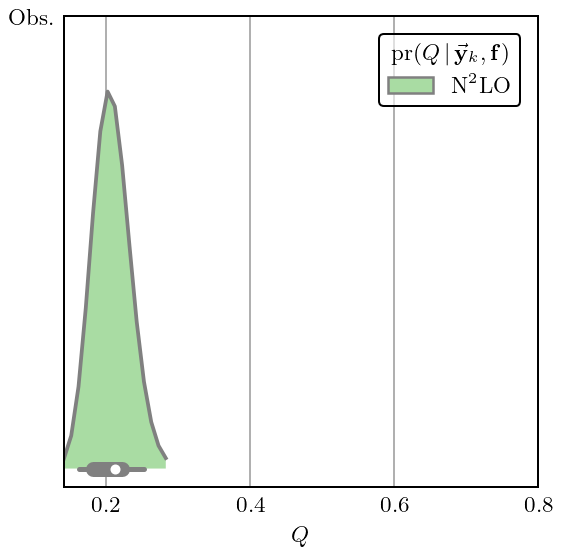

2024-06-25 14:34:34,607	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.27262625
Observable Obs., variable Q: mean = 0.27127295661095063
Observable Obs., variable Q: std. dev. = 0.03272561123633819


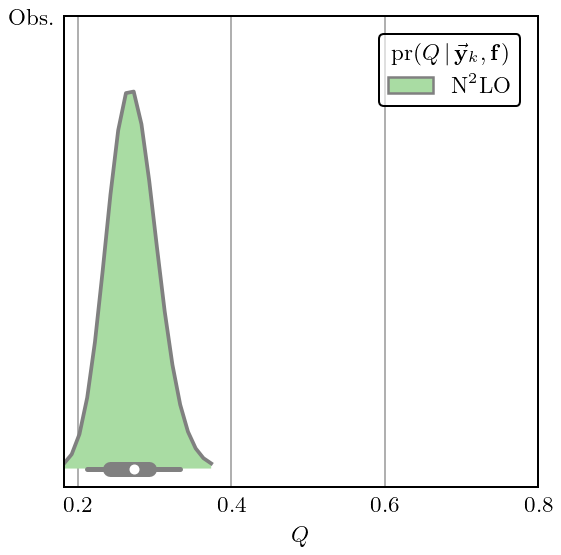

2024-06-25 14:35:01,335	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.3332323
Observable Obs., variable Q: mean = 0.33178108033716636
Observable Obs., variable Q: std. dev. = 0.03816877997953655


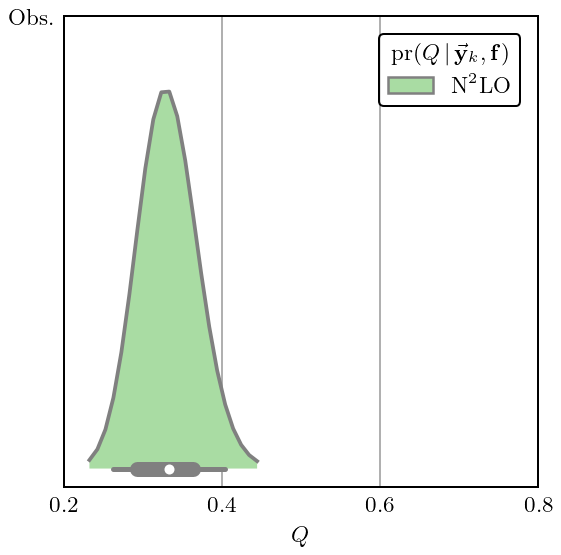

2024-06-25 14:35:28,313	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.36353534
Observable Obs., variable Q: mean = 0.37092696656163265
Observable Obs., variable Q: std. dev. = 0.041025079041326275


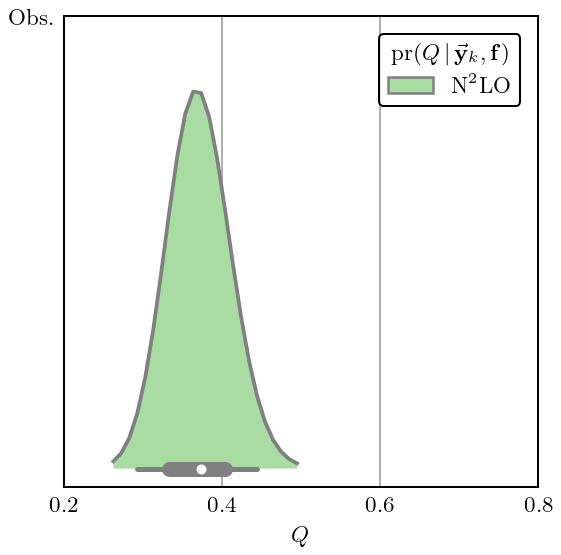

2024-06-25 14:35:55,341	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.36353534
Observable Obs., variable Q: mean = 0.36937985529483774
Observable Obs., variable Q: std. dev. = 0.04115233524639201


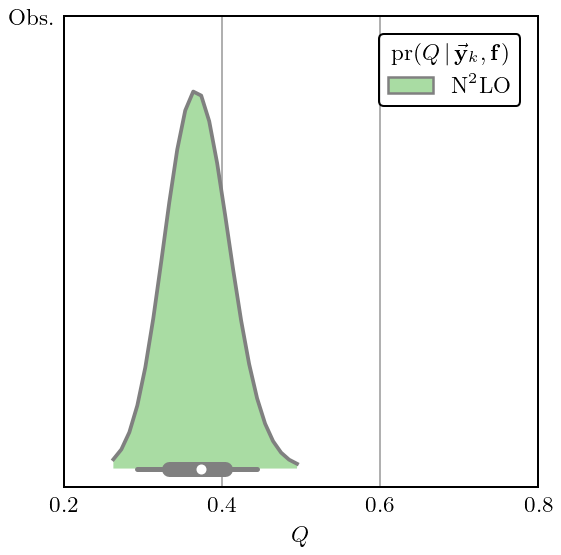

2024-06-25 14:36:22,217	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.34333333
Observable Obs., variable Q: mean = 0.3492361980013975
Observable Obs., variable Q: std. dev. = 0.04241239558486654


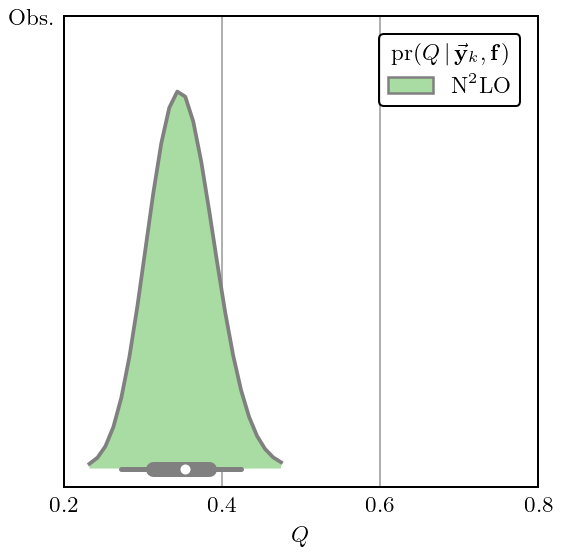

2024-06-25 14:36:48,975	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.36353534
Observable Obs., variable Q: mean = 0.3718890292044819
Observable Obs., variable Q: std. dev. = 0.04723102917331073


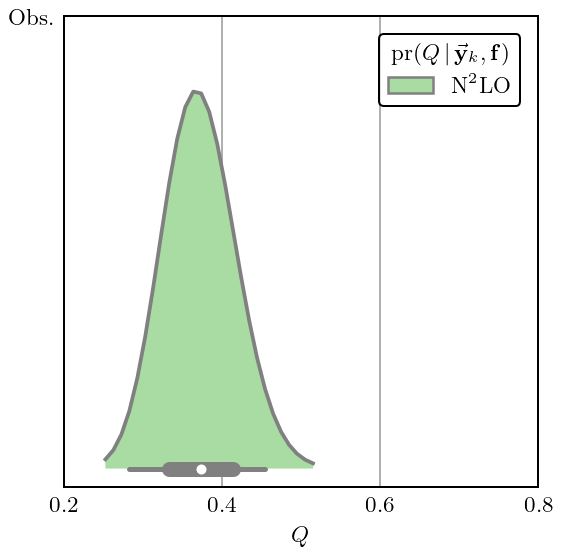

2024-06-25 14:37:15,662	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.39383838
Observable Obs., variable Q: mean = 0.3985396249566875
Observable Obs., variable Q: std. dev. = 0.05348172834633248


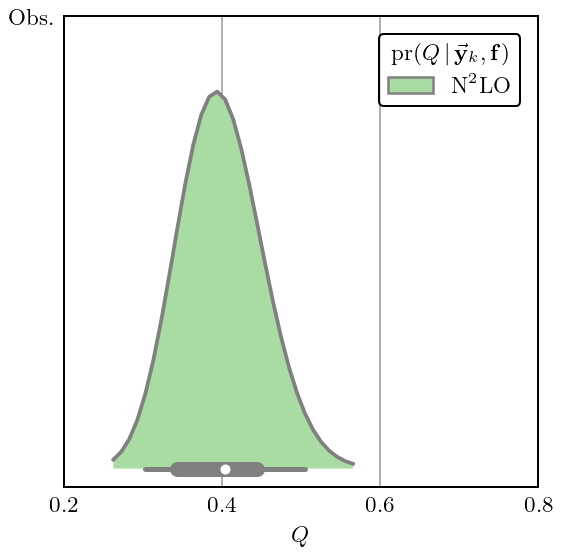

2024-06-25 14:37:42,566	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.4039394
Observable Obs., variable Q: mean = 0.4128843307023555
Observable Obs., variable Q: std. dev. = 0.058539619408243586


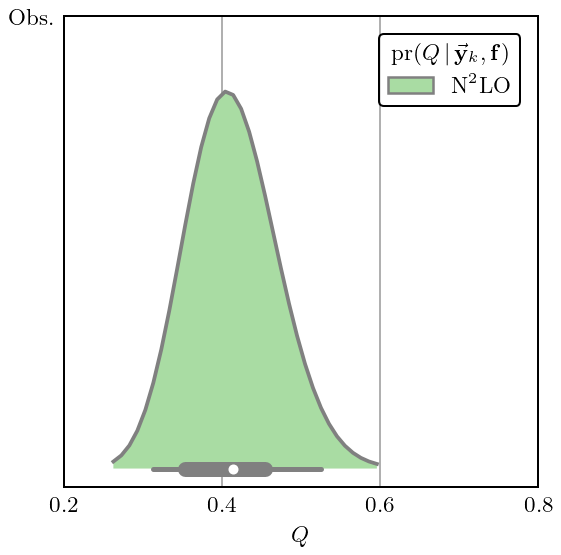

2024-06-25 14:38:09,403	INFO worker.py:1553 -- Started a local Ray instance.


There was no save data.
Observable Obs., variable Q: MAP value = 0.36353534
Observable Obs., variable Q: mean = 0.37007935389435775
Observable Obs., variable Q: std. dev. = 0.055802868558398735


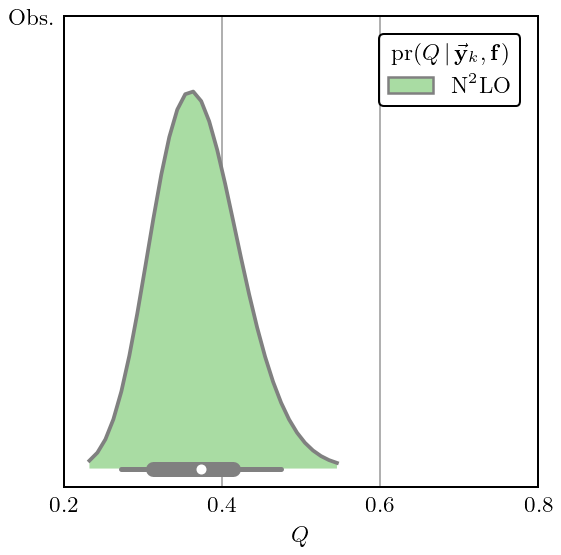

In [50]:
# ScaleSchemeQ_list = [EMN450MeV, EMN500MeV, EMN550MeV]
# ScaleSchemeQ_list = [EKM0p8fm, EKM0p9fm, EKM1p0fm, EKM1p1fm, EKM1p2fm]
ScaleSchemeQ_list = [GT1p2fm, GT1p1fm, GT1p0fm, GT0p9fm]
# ScaleSchemeQ_list = [RKE550MeV, RKE500MeV, RKE450MeV, RKE400MeV]

# fixed values of relative momentum where fitting will take place
Elab_fit_pts = np.array([1, 5, 12, 21, 
                         33, 48, 65, 85, 
                         108, 133, 161, 192, 
                         225, 261, 300, 341])
prel_fit_pts = E_to_p(E_lab = Elab_fit_pts, interaction = "np")

ls_deg_vals = np.linspace(0.01, 4, 100, dtype=np.dtype('f4'))
q_vals = np.linspace(0.01, 1.01, 100, dtype=np.dtype('f4'))

mesh_cart_q = gm.cartesian(q_vals, np.log(ls_deg_vals))

QVariable = RandomVariable(var=q_vals,
                                user_val=0.3,
                                name='Q',
                                label="Q",
                                units="",
                                ticks=[0.2, 0.4, 0.6, 0.8],
                                logprior=np.zeros(len(q_vals)),
                                logprior_name="noprior",
                                marg_bool=True)
LsDegVariable = RandomVariable(var=ls_deg_vals,
                               user_val=None,
                               name='lsdeg',
                               label="\ell_{\Theta}",
                               units="",
                               ticks=[],
                               logprior=np.zeros(len(ls_deg_vals)),
                               logprior_name="noprior",
                               marg_bool=False)
variables_array = np.array([QVariable, LsDegVariable])

# ALLOBS for angle input spaces
plot_obs_list = [["DSG", "D", "AXX", "AYY", "A", "AY"]]
obs_name_grouped_list = ["ALLOBS"]
obs_labels_grouped_list = [r'Obs.']
mesh_cart_grouped_list = [[mesh_cart_q, mesh_cart_q, mesh_cart_q, mesh_cart_q,
                           mesh_cart_q, mesh_cart_q]]

ratio_fn = ratio_fn_constant
ratio_fn_kwargs = {
                  "Q" : 0.3
}
log_likelihood_fn = log_likelihood_const
log_likelihood_fn_kwargs = {}

Q_fit_pts = np.array([])
Q_fit_stddev = np.array([])

orders_q = 1

for elfp in Elab_fit_pts:
    stats_array, _ = generate_posteriors(
#         nn_interaction="np",
        scale_scheme_bunch_array=ScaleSchemeQ_list,
        Q_param_method_array=["sum"],
        p_param_method_array=["pprel"],
        input_space_deg=["cos"],
        input_space_tlab=["prel"],
        Elab_slice = elfp,
        t_lab_train_pts=np.array([1, 12, 33, 65, 108, 161, 225, 300]),
        degrees_train_pts=np.array([41, 60, 76, 90, 104, 120, 139]),
        orders_from_ho=orders_q,
        orders_excluded=[],
        orders_names_dict=None,
        orders_labels_dict=None,
        length_scale_list=[NSKernelParam(0.4, [0.05, 4])],
        length_scale_fixed = False,
        cbar_list = [NSKernelParam(1.0, [0.1, 10])],
        cbar_fixed = True,
        m_pi_eff=141,
        Lambdab=480,
        print_all_classes=False,
        savefile_type="png",
        
        plot_posterior_curvewise_bool=True,
        plot_marg_curvewise_bool=True,
        plot_corner_curvewise_bool=False,
        use_data_curvewise_bool=False,
        save_data_curvewise_bool=False,
        save_posterior_curvewise_bool=False,

        plot_obs_list = plot_obs_list,
        obs_name_grouped_list = obs_name_grouped_list,
        obs_labels_grouped_list = obs_labels_grouped_list,
        mesh_cart_grouped_list = mesh_cart_grouped_list,
        variables_array_curvewise = variables_array,
        
        ratio_fn_posterior = ratio_fn,
        ratio_fn_kwargs_posterior = ratio_fn_kwargs,
        log_likelihood_fn_posterior = log_likelihood_fn,
        log_likelihood_fn_kwargs_posterior = log_likelihood_fn_kwargs,

        plot_posterior_pointwise_bool=False,
        save_posterior_pointwise_bool=False,

        variables_array_pointwise = np.array([0]),

        filename_addendum="",
    )

    Q_fit_pts = np.append(Q_fit_pts, stats_array[[i % 3 == 0 for i in range(np.shape(stats_array)[0])]])
    Q_fit_stddev = np.append(Q_fit_stddev, stats_array[[i % 3 == 2 for i in range(np.shape(stats_array)[0])]])

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
(16,)
(16,)
N2LO: Lambda_b = 954.9481439014007 +/- 63.15943345710598 MeV
N2LO: m_eff = 57.828848533582914 +/- 10.891735681002402 MeV



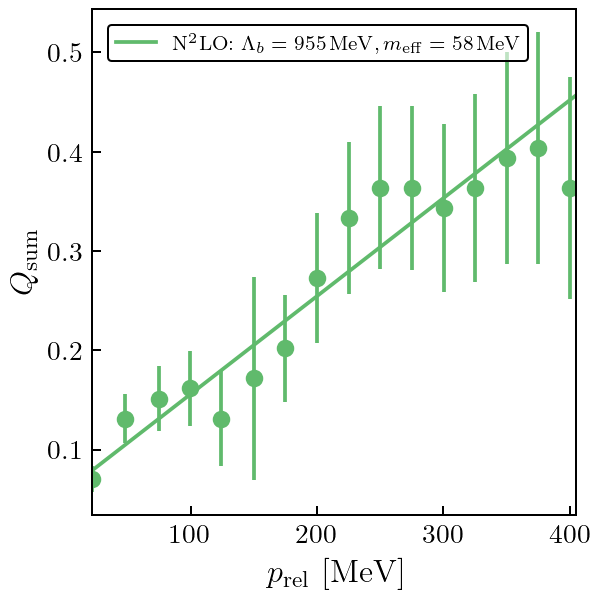

In [51]:
from sklearn.linear_model import LinearRegression

orders_labels_dict = {6: r'N$^{4}$LO+', 5: r'N$^{4}$LO',
                    4: r'N$^{3}$LO', 3: r'N$^{2}$LO', 2: r'NLO'}
orders_names_dict = {6: r'N4LO+', 5: r'N4LO', 4: r'N3LO', 3: r'N2LO', 2: r'NLO'}

def q_sum(x, lambda_b, m_pi):
        return (x + m_pi) / (m_pi + lambda_b)

for ss_idx in range(len(ScaleSchemeQ_list)):
    fig_fit, ax_fit = plt.subplots(figsize=(3.5,3.5))
    
    for o_idx in range(orders_q):
        idx_mask = [i % (orders_q * len(ScaleSchemeQ_list)) == 
                 (o_idx + ss_idx * orders_q) for i in range(len(Q_fit_pts))]

        # scatter-plots the means and 95% (2 sigma) confidence intervals for the N4LO+ Q posterior pdfs
        ax_fit.errorbar(prel_fit_pts, 
                        Q_fit_pts[idx_mask], 
                        yerr = 2 * Q_fit_stddev[idx_mask],
                        color = ScaleSchemeQ_list[ss_idx].cmaps[len(ScaleSchemeQ_list[ss_idx].orders_full) - orders_q + o_idx - 1](0.55), 
#                         label = r'$Q$', 
                        fmt = 'o', 
                       zorder = o_idx)
        # fits the points to a line
        popt, pcov = scipy.optimize.curve_fit(q_sum, prel_fit_pts, 
                                            Q_fit_pts[idx_mask], 
                                            sigma = Q_fit_stddev[idx_mask])
        # plots the line of best fit
        ax_fit.plot(E_to_p(E_lab = t_lab, interaction = 'np'), 
                    q_sum(E_to_p(E_lab = t_lab, interaction = 'np'), 
                          popt[0], popt[1]), 
                    color = ScaleSchemeQ_list[ss_idx].cmaps[len(ScaleSchemeQ_list[ss_idx].orders_full) - orders_q + o_idx - 1](0.55), 
                   label = orders_labels_dict[len(ScaleSchemeQ_list[ss_idx].orders_full) - orders_q + o_idx + 1] + 
                    rf": $\Lambda_{{b}} = {popt[0]:3.0f}\,\mathrm{{MeV}}, m_{{\mathrm{{eff}}}} = {popt[1]:3.0f}\,\mathrm{{MeV}}$", 
                   zorder = o_idx)
        # prints the best fit values
        print(orders_names_dict[len(ScaleSchemeQ_list[ss_idx].orders_full) - orders_q + o_idx + 1] + ": Lambda_b = " + str(popt[0]) + " +/- " + str(np.sqrt(pcov[0, 0])) + " MeV")
        print(orders_names_dict[len(ScaleSchemeQ_list[ss_idx].orders_full) - orders_q + o_idx + 1] + ": m_eff = " + str(popt[1]) + " +/- " + str(np.sqrt(pcov[1, 1])) + " MeV\n")

    # fig_fit.suptitle("MAP $Q$ values and lines of fit", fontsize = 20)
    ax_fit.set_xlabel("$p_{\mathrm{rel}}$ [MeV]", fontsize = 13)
    ax_fit.set_ylabel(r"$Q_{\mathrm{sum}}$", fontsize = 13)
    ax_fit.legend(fontsize = 8, loc = 'upper left')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    fig_fit.tight_layout()

    fig_fit.savefig('figures2/' + 'qvsp_linear_' + 
        ScaleSchemeQ_list[ss_idx].potential_string + 
        ScaleSchemeQ_list[ss_idx].cutoff_string)